In [4]:
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [9]:
flights = pd.read_csv(r'C:\Users\USER\Documents\DEVELOPING A FLIGHT DELAY PREDICTION\DATASET\flightdata (1).csv')
flights

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11226,2016,4,12,30,5,DL,N940DL,1715,11433,DTW,...,1223,1148.0,-35.0,0.0,0.0,0.0,138.0,105.0,594.0,NaN
11227,2016,4,12,30,5,DL,N836DN,1770,14747,SEA,...,2046,2100.0,14.0,0.0,0.0,0.0,201.0,181.0,1399.0,NaN
11228,2016,4,12,30,5,DL,N583NW,1823,11433,DTW,...,2210,2154.0,-16.0,0.0,0.0,0.0,311.0,295.0,1927.0,NaN
11229,2016,4,12,30,5,DL,N554NW,1901,10397,ATL,...,1806,1801.0,-5.0,0.0,0.0,0.0,336.0,332.0,2182.0,NaN


In [10]:
flights_needed_data = flights[0:100000]   


In [11]:
flights_needed_data


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11226,2016,4,12,30,5,DL,N940DL,1715,11433,DTW,...,1223,1148.0,-35.0,0.0,0.0,0.0,138.0,105.0,594.0,NaN
11227,2016,4,12,30,5,DL,N836DN,1770,14747,SEA,...,2046,2100.0,14.0,0.0,0.0,0.0,201.0,181.0,1399.0,NaN
11228,2016,4,12,30,5,DL,N583NW,1823,11433,DTW,...,2210,2154.0,-16.0,0.0,0.0,0.0,311.0,295.0,1927.0,NaN
11229,2016,4,12,30,5,DL,N554NW,1901,10397,ATL,...,1806,1801.0,-5.0,0.0,0.0,0.0,336.0,332.0,2182.0,NaN


In [12]:
flights_needed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [13]:
flights_needed_data.value_counts('DIVERTED') 

DIVERTED
0.0    11157
1.0       74
Name: count, dtype: int64

ValueError: Could not interpret value `SCHEDULED_ARRIVAL` for parameter `x`

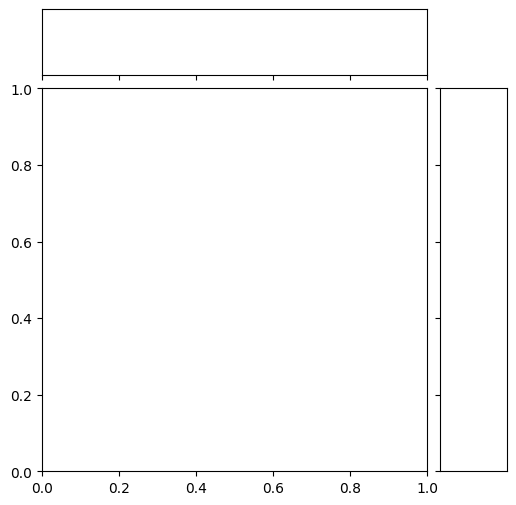

In [16]:
sb.jointplot(data=flights_needed_data, x="SCHEDULED_ARRIVAL", y="ARRIVAL_TIME")

In [17]:
corr = flights_needed_data.corr(method='pearson')

ValueError: could not convert string to float: 'DL'

In [18]:
sb.heatmap(corr)

NameError: name 'corr' is not defined

In [19]:
corr

NameError: name 'corr' is not defined

In [21]:
flights_needed_data=flights_needed_data.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT',
                                              'SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME',
                                              'AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON'],
                                             axis=1)

KeyError: "['FLIGHT_NUMBER', 'AIRLINE', 'TAIL_NUMBER', 'TAXI_OUT', 'SCHEDULED_TIME', 'DEPARTURE_TIME', 'WHEELS_OFF', 'ELAPSED_TIME', 'AIR_TIME', 'WHEELS_ON', 'TAXI_IN', 'CANCELLATION_REASON'] not found in axis"

In [20]:
flights_needed_data

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11226,2016,4,12,30,5,DL,N940DL,1715,11433,DTW,...,1223,1148.0,-35.0,0.0,0.0,0.0,138.0,105.0,594.0,NaN
11227,2016,4,12,30,5,DL,N836DN,1770,14747,SEA,...,2046,2100.0,14.0,0.0,0.0,0.0,201.0,181.0,1399.0,NaN
11228,2016,4,12,30,5,DL,N583NW,1823,11433,DTW,...,2210,2154.0,-16.0,0.0,0.0,0.0,311.0,295.0,1927.0,NaN
11229,2016,4,12,30,5,DL,N554NW,1901,10397,ATL,...,1806,1801.0,-5.0,0.0,0.0,0.0,336.0,332.0,2182.0,NaN


In [22]:
flights_needed_data=flights_needed_data.fillna(flights_needed_data.mean())

TypeError: Could not convert ['DLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDLDL'
 'N836DNN964DNN813DNN587NWN836DNN936DLN983DLN589NWN804DNN965DNN703TWN538USN699DLN582NWN920DEN960ATN3732JN592NWN833DNN988DLN824NWN930DLN591NWN837DNN681DAN536USN596NWN369NBN815DNN138DLN536USN337NWN633DLN3757DN827DNN964DLN965DNN848DNN948DNN923DLN1609N718TWN820DNN806DNN806DNN930DLN968ATN932DLN908DEN945DLN927ATN674DLN909DAN930DLN698DLN841DNN961ATN552NWN596NWN935DNN801DZN802DNN553NWN612DLN357NBN391DAN695DLN943DLN903DAN702TWN960ATN911DEN947DNN839DNN944DLN816DNN933DNN832DNN585NWN358NBN963DNN344NWN353NWN903DAN346NBN585NWN3734BN839DNN354NWN905DEN365NBN959DNN3743HN317USN309USN931DLN121DEN921ATN902DEN585NWN3743HN3730BN943DNN323USN354NWN973DLN913DNN343NBN375NCN839DNN382DAN931DNN3752N957DLN922DXN961ATN313USN377DAN838DNN317NBN3773DN809DNN978DLN592NWN3730BN617DLN925DNN907DAN931DNN3752N977DLN924DNN842DNN842DNN377DAN907DAN383DNN709TWN595NWN954DNN948ATN841DNN584NWN936DNN987DLN671DNN678DLN3748YN340NBN939DNN662DNN914DNN588NWN318NBN906DAN834DNN834DNN374DAN928DNN702TWN911DLN909DAN385DNN3736CN841DNN382DAN711ZXN824DNN983ATN951DNN905DAN1609N370NBN921ATN960DNN919DLN333NBN3743HN975ATN924DNN671DNN319NBN587NWN813DNN922DXN3751BN959DNN3732JN948DNN819DNN346NBN723TWN842DNN915DEN826DNN681DAN932DNN395DNN723TWN842DNN313USN914DEN125DLN340NBN3743HN820DNN546USN971ATN929DLN805DNN951DNN805DNN364NBN752ATN126DLN928DNN924ATN669DNN976DLN3749DN916DNN3752N3740CN812DNN373DAN946DLN915ATN722TWN302NBN302NBN536USN914DNN1612TN910ATN590NWN913DEN3753N3748YN952ATN976DLN717TWN899ATN317NBN943DNN387DAN583NWN369NWN3768N958DLN370NBN921DNN387DAN840DNN3748YN939DNN964DLN1609N37700N828DNN540USN908DAN704XN985ATN841DNN918DHN971ATN809DNN387DAN371NBN965ATN927DNN6715CN321NBN841DNN3768N121DEN595NWN353NBN809DNN900DEN361NBN750ATN906DAN936DNN979ATN617DLN915DLN3747DN906DAN3753N961DLN3750DN965DNN3750DN385DNN805DNN538USN812DNN324NBN972DLN827DNN978DLN544USN926DHN835DNN397DAN910ATN586NWN397DAN316NBN808NWN330NWN387DAN3750DN806DNN555NWN812DNN1608N959ATN375NCN682DAN390DAN950ATN586NWN932DNN6703DN987ATN388DAN584NWN633DLN3758YN920DLN721TWN954DNN388DAN914DNN3753N925ATN664DNN752ATN3741SN914DLN390DAN3731TN963DNN664DNN341NBN913DEN342NBN3750DN665DNN750ATN946DNN996ATN335NWN16065N590NWN3752N717JLN819DNN934DNN818NWN843DNN961DNN955DNN979ATN594NWN318NBN945DNN927DNN925DNN841DNN355NWN584NWN595NWN352NWN335NWN603ATN750ATN942DNN347NBN3731TN322USN365NBN924DLN807DNN926ATN823DNN596NWN387DAN3741SN963DNN388DAN3753N997ATN664DNN617DLN721TWN983DLN826DNN3752N3766N930DNN752ATN812DNN681DAN918DHN544USN806DNN694DLN806DNN1603N998ATN971ATN834DNN1609N944ATN811DZN675DLN583NWN3753N387DAN934DNN3753N962DNN3752N335NBN540USN128DLN348NWN191DNN819DNN583NWN316USN347NBN946DNN841DNN988ATN3761RN930DNN972DLN538USN836DNN325USN588NWN593NWN369NWN326USN3767N952DNN664DNN844DNN935DNN546USN834DNN694DLN834DNN3748YN6716CN804DNN1610DN948ATN928ATN822DNN385DNN899ATN908DLN955ATN360NBN712TWN962DNN3737CN948DNN3766N909DEN588NWN902DEN713TWN387DAN373NWN3760CN960ATN828DNN689DLN590NWN964DNN3763DN3744FN849DNN752ATN940DNN972ATN905DAN389DAN377DAN329NWN979ATN911DAN668DNN321NBN948ATN712TWN812DNN940ATN940DLN398DAN975ATN849DNN596NWN918DLN3763DN944DLN913DNN3766N962DLN388DAN3768N712TWN3748YN355NWN540USN986ATN6713YN3759N824DNN823DNN940DLN1610DN980ATN3759N3764DN594NWN811DZN916DEN387DAN825DNN830DNN318NBN750ATN321NBN951DNN3757DN6715CN836DNN3754AN940ATN591NWN595NWN584NWN349NBN348NWN3758YN933DNN849DNN381DNN381DNN608ATN935DNN672DLN920DLN301NBN319NBN698DLN712TWN382DAN3753N841DNN953DNN3744FN592NWN366NWN905DLN952DNN952DLN547USN947DNN3754AN583NWN538USN121DEN348NWN389DAN906DAN915DLN971ATN324NBN336NBN967ATN839DNN389DAN694DLN587NWN319NBN914DNN957DNN582NWN752ATN965DNN951DLN3755DN633DLN339NWN593NWN358NWN353NBN960DNN832DNN968ATN3742CN961DNN381DNN705TWN953DLN301NBN829DNN589NWN555NWN842DNN1611BN972ATN345NWN980ATN3760CN927ATN592NWN3746HN382DAN824DNN360NBN382DAN813DNN823DNN913DNN547USN808DNN695DLN808DNN1612TN939ATN816DNN1610DN986ATN835DNN810DNN367NWN392DAN341NBN3738BN902DEN828DNN3755DN144DAN594NWN591NWN371DAN915ATN349NBN713TWN950DNN671DNN961DNN671DNN935DNN936DNN316USN323USN3754AN925DNN966DLN1607BN752ATN941DNN802DNN923ATN360NBN3769LN399DAN344NWN843DNN337NBN337NBN323NBN555NWN935ATN345NBN934DNN926DHN808DNN824DNN3745BN957DNN3746HN721TWN835DNN899ATN1607BN981ATN840DNN848DNN926ATN694DLN587NWN320NBN316USN3760CN813DNN921DLN1610DN1608N945DNN3742CN918DHN750ATN364NBN960DLN709TWN301NBN176DZN587NWN703TWN3756N812DNN178DZN1609N399DAN3730BN828DNN585NWN585NWN127DLN3753N3756N372DAN703TWN3750DN817DNN915DLN3739PN914DLN914DNN3750DN846DNN912DNN751ATN844DNN664DNN844DNN373DAN802DNN809DNN348NBN302NBN903DAN822DNN921DNN942DNN915ATN392DAN669DNN917DEN3758YN907DAN827DNN993DLN336NWN916DNN683DAN339NWN1611BN722TWN348NBN3743HN329NWN584NWN138DLN595NWN855NWN338NBN365NBN915DNN373DAN591NWN317NBN666DNN583NWN381DNN3768N927DNN387DAN964ATN6708DN721TWN3743HN3753N923ATN538USN911DAN972DLN386DAN366NBN3768N373NWN540USN359NBN918DHN837DNN581NWN371NWN938DNN950DNN941DNN849DNN386DAN926DLN3760CN374DAN590NWN672DLN3760CN705TWN709TWN319USN3759N323USN751ATN317NBN939DNN837DNN355NWN318USN896ATN964DNN904DAN369NBN6706QN670DNN618DLN923DLN989ATN962DLN833DNN618DLN386DAN915DLN846DNN552NWN633DLN384DAN361NBN818DAN805DNN923DLN916DEN618DLN3741SN910DNN128DLN596NWN812DNN822DNN831DNN3760CN327NWN593NWN583NWN710TWN3747DN371DAN589NWN949ATN633DLN618DLN709TWN320NBN318USN3756N375NCN544USN361NBN957DNN836DNN372NWN347NWN584NWN340NBN942DNN961DNN6713YN838DNN383DNN833DNN1611BN988ATN848DNN1608N928ATN837DNN3768N355NWN963ATN751ATN6706QN973DLN826DNN3747DN130DLN962DNN989ATN956DLN961ATN343NBN904DLN315USN909DEN594NWN6706QN846DNN3757DN393DAN847DNN950DNN723TWN3771KN3736CN338NWN928ATN3764DN143DAN704XN673DLN928DNN128DLN3746HN932DNN6706QN806DNN965ATN584NWN806DNN317USN805DNN964DNN3767N387DAN824DNN3767N717TWN826DNN338NWN915DEN586NWN6710EN957DNN824DNN3764DN139DLN128DLN360NBN826DNN983DLN751ATN139DLN354NWN839DNN932DNN824DNN930ATN389DAN316NBN377DAN704XN668DNN589NWN336NWN127DLN923DNN824DNN6707AN819DNN914DEN596NWN925DNN375NCN942DLN980DLN659DLN965ATN989ATN1613BN952ATN694DLN929DNN3754AN750ATN930ATN121DEN940ATN382DAN6700N805DNN950ATN997ATN319NBN942DLN814DNN384DAN143DAN914DNN339NBN153DLN915DNN6714QN826DNN3742CN903DAN371NBN908DAN812DNN940ATN372DAN963DNN381DNN718TWN822DNN954DNN547USN849DNN675DLN121DEN354NWN319NBN931DLN319NBN964DNN385DNN587NWN324NBN678DLN940DLN750ATN820DNN348NWN710TWN955DLN320USN3764DN803DNN801DZN376NWN846DNN687DLN550NWN950ATN6714QN932DNN385DNN901DAN995ATN385DNN813DNN385DNN548USN385DNN588NWN378DAN704XN904DAN396DAN718TWN813DNN315NBN3736CN826DNN973DLN312USN377NWN709TWN3747DN3744FN850DNN850DNN326NBN195DNN389DAN934DLN924DNN969DLN945DNN381DNN3735DN327NBN589NWN826DNN845MHN824DNN3735DN138DLN342NWN815DNN912DNN969ATN901DAN945DNN394DAN687DLN3757DN376DAN816NWN322NBN982ATN924ATN623DLN688DLN844DNN6716CN377DAN362NBN948DLN980DLN6716CN956DNN899ATN945DNN3740CN635DLN830DNN927DAN374NWN595NWN542USN843DNN801DZN129DLN927DAN595NWN948DLN939DLN938DNN667DNN997ATN841DNN365NBN922DLN909DEN945DNN3749DN922DXN934DLN816DNN3731TN540USN918DHN954DNN349NWN674DLN721TWN833DNN801DZN812NWN917DLN934DLN364NWN804DNN910ATN343NWN357NWN633DLN830DNN851DNN924DNN801NWN690DLN971DLN353NBN931DNN3752N321NBN540USN921DNN904DAN6700N676DLN923DLN3772HN356NWN813DNN841DNN592NWN813NWN326NBN915DNN974DLN975DLN923ATN835DNN617DLN334NWN542USN607ATN935DLN963DNN727TWN397DAN980DLN396DAN832DNN837DNN914DLN554NWN608ATN908DAN939DNN705TWN378DAN391DAN815DNN752ATN594NWN803DNN3758YN963DLN546USN635DLN3748YN929DNN902DAN727TWN3742CN6708DN948DNN908DAN705TWN3741SN138DLN397DAN802NWN3735DN685DAN325NBN915ATN916DNN813NWN705TWN617DLN831DNN6705YN340NWN810DNN929ATN394DAN752ATN950DNN922DXN312USN592NWN932ATN549USN948DNN933DNN317USN585NWN3756N826DNN827DNN335NWN592NWN672DLN1608N347NBN391DAN812NWN910DEN323NBN922DXN804DNN6704ZN342NWN990ATN972DLN812DNN6715CN3749DN381DNN337NBN953DLN807DNN3768N382DAN954DNN988DLN584NWN382DAN807DNN333NBN990ATN381DNN847DNN847DNN323NBN138DLN3735DN936DLN954DNN950DLN936DNN904DLN970DLN6713YN377NWN368NWN679DAN551NWN377NWN804DNN945DNN694DLN387DAN972DLN324NBN953DLN913DNN3753N3753N359NBN818DAN6708DN679DAN932ATN3758YN983ATN909DEN690DLN955DNN362NWN1612TN666DNN908DAN3750DN542USN582NWN834DNN913DNN909DEN844DNN557NWN687DLN542USN585NWN844DNN1607BN381DNN6702N812DNN821NWN3735DN685DAN370NBN937DLN988DLN970DLN955DLN752ATN913DNN338NBN982DLN808DNN6708DN593NWN550NWN581NWN934ATN921ATN752ATN139DLN3741SN946DNN3751BN977DLN939DNN917DEN917DNN3764DN321USN3758YN349NWN387DAN387DAN343NBN329NWN322USN3747DN6706QN335NBN995ATN992DLN953DLN942DNN904DAN721TWN949ATN377DAN822DNN750ATN594NWN937DLN6700N723TWN6707AN587NWN679DAN377DAN960DLN915ATN927DNN385DNN845DNN371NBN128DLN942DNN721TWN396DAN6711MN319USN821DNN6707AN338NBN915ATN909DAN816NWN721TWN664DNN582NWN591NWN891ATN350NAN375DAN707TWN717JLN379DAN723TWN723TWN332NBN6706QN360NBN949ATN951DNN3741SN830DNN939DNN688DLN908DAN6712BN1610DN693DLN803NWN378NWN339NWN812DNN809DNN848DNN937ATN921DLN926DHN909DAN326USN590NWN3761RN836DNN831DNN318NBN926DHN813NWN973DLN6700N556NWN378NWN822DNN939DNN694DLN905DAN548USN320NBN828DNN592NWN360NWN593NWN3766N814NWN957ATN990ATN750ATN125DLN379DAN921DNN915DNN1612TN544USN582NWN320NBN3767N326NBN973DLN968DLN382DAN903DAN750ATN594NWN814DNN975ATN718TWN804DNN688DLN6708DN6700N961ATN3745BN947DLN959DLN690DLN941DNN949DNN922DLN953DNN833DNN367NWN587NWN963DNN334NWN672DLN557NWN974DLN802NWN365NBN941DNN921DNN6710EN928DNN804DNN678DLN370NWN549USN608ATN809DNN557NWN674USN595NWN960DNN176DNN596NWN808DNN3763DN692DLN826DNN336NWN592NWN321USN328NWN672DLN833DNN804DNN953DNN842MHN682DAN1612TN932DLN968DLN967DLN750ATN916DNN396DAN3765N333NBN983DLN998ATN3747DN835DNN835DNN317NBN139DLN3736CN824DNN340NBN3736CN3763DN812DNN3757DN816DNN663DNN1402AN3757DN3752N376NWN3747DN814DNN913DNN544USN848DNN695DLN908DEN314NBN938DLN392DAN540USN931DNN942DNN983DLN904DAN995DLN673DLN371DAN624AGN347NBN906DAN3730BN144DAN547USN917DNN585NWN3730BN924ATN341NBN913DEN978ATN825DNN3773DN3747DN940DNN544USN965DNN326NBN910DNN850DNN924ATN382DAN3773DN581NWN675DLN121DEN3739PN3730BN938DNN3739PN3750DN901DAN320USN366NWN909DEN584NWN603ATN931DNN608ATN667DNN982DLN680DAN949DNN377DAN3752N354NWN839MHN914DLN347NBN907DLN960DNN947ATN3753N139DLN589NWN981DLN937DNN67171N829MHN990ATN316NBN861DAN723TWN371DAN845DNN960DNN908DAN828DNN192DNN317NBN809DNN139DLN938DNN838DNN332NWN584NWN354NWN319USN682DAN557NWN961DLN595NWN383DNN342NBN966DLN806DNN806NWN6703DN949DNN174DZN830DNN845DNN947DNN853DNN821DNN3750DN681DAN846DNN815DNN993DLN953DLN383DNN821DNN947DNN587NWN334NWN917DNN970ATN850DNN964DLN311USN823DNN139DLN3752N390DAN964DNN847DNN866DAN964DLN3747DN927DAN958DLN718TWN675DLN932DLN914DEN6716CN811DZN395DNN939DLN987DLN6707AN752ATN581NWN670DNN812DNN839DNN547USN584NWN804DNN668DNN942ATN718TWN377DAN918DEN991ATN324USN959ATN3766N812DNN925DLN1611BN943ATN681DAN390DAN623DLN676DLN805DNN985DLN812DNN811DZN806NWN361NBN939DNN704XN3750DN818DAN916DLN591NWN37700N361NBN985DLN3773DN901DAN1611BN810DNN836DNN342NBN803DNN939DNN961DLN688DLN722TWN377DAN359NWN948ATN918DHN948DNN803DNN682DAN323NBN940DLN904DAN371DAN848DNN172DZN831DNN936DNN851DNN820NWN925ATN398DAN937DNN945DLN555NWN928DNN362NBN3751BN3751BN855NWN914DEN333NBN937DNN382DAN705TWN185DNN341NBN682DAN324USN920DLN818DAN723TWN319NBN918DHN841DNN820NWN3730BN976DLN956DLN315NBN391DAN939DLN962DNN827DNN596NWN835DNN826DNN3734BN3741SN617DLN907DAN943DLN544USN830DNN317NBN1607BN385DNN830DNN802DNN824DNN946DNN918DEN371DAN979DLN941DLN809DNN836DNN398DAN175DZN922DXN846DNN852DNN368NBN964DNN703TWN803DNN942DNN594NWN675DLN933DNN933ATN3754AN904DLN555NWN703TWN395DNN957DLN374DAN807DNN815DNN172DNN918DHN801DZN692DLN1607BN971DLN3755DN3755DN627DLN583NWN947DNN1612TN807DNN824DNN3757DN919DEN919DEN624AGN805DNN954DNN933DNN825DNN824DNN319NBN817DNN693DLN843DNN810DNN997DLN3749DN920DNN845DNN3762YN910DLN818DAN590NWN904DAN1608N952ATN3749DN3749DN591NWN959DNN1610DN892ATN389DAN389DAN675DLN930DLN929DNN806DNN823DNN542USN812DNN801DZN593NWN907DAN806DNN6716CN848DNN845DNN915DLN978ATN3752N838DNN329NBN381DNN721TWN971ATN833DNN905DEN596NWN829DNN329NBN963DLN834DNN302NBN917DEN589NWN949ATN322USN998DLN821DNN668DNN972DLN805DNN827DNN318NBN954DNN852DNN999DNN377NWN915DEN672DLN623DLN316NBN998ATN3772HN910DEN326USN583NWN325USN998DLN346NBN945DLN987DLN317NBN717JLN851DNN955DLN3742CN824DNN826DNN958DNN908DLN690DLN911DAN703TWN384DAN991ATN3773DN814DNN352NBN926DLN697DLN991ATN317NBN706TWN815DNN921DNN690DLN689DLN810DNN828DNN943DNN697DLN6711MN706TWN3773DN588NWN672DLN814DNN947DNN833DNN6703DN1609N360NWN939ATN913DNN839DNN823NWN928ATN385DNN992ATN807DNN932DLN977DLN942ATN317USN952DLN335NBN675DLN967DLN373NWN907DAN3739PN975DLN3773DN176DNN371NBN936DLN3751BN967DLN178DNN823DNN324NBN951DLN316NBN3744FN986DLN806DNN6707AN822DNN851DNN815DNN908DAN171DZN6713YN915ATN704XN713TWN841DNN919DLN902DAN958DNN850DNN807DNN912DLN823DNN985DLN990DLN318NBN1613BN3758YN384DAN932DLN389DAN345NBN3762YN931DNN927DNN802DNN819DNN371NBN802NWN965DNN988DLN581NWN713TWN156DLN810DNN827DNN594NWN901DEN692DLN819DXN817DNN813DNN581NWN922DXN931DNN913DNN929DNN988DLN178DNN814DNN316NBN984DLN1602N693DLN986ATN682DAN388DAN817DNN965DLN587NWN852DNN962DNN1612TN395DNN667DNN839DNN6709N549USN320NBN848DNN981DLN828DNN891ATN940ATN706TWN3761RN909DEN928ATN331NWN933ATN809DNN852DNN6716CN985DLN585NWN718TWN933DNN849DNN810DNN317NBN958DNN913DNN693DLN6705YN538USN836DNN845DNN1608N899ATN823DNN906DEN361NBN3748YN989ATN343NBN928ATN827DNN320NBN948DLN808DNN704XN949DLN852DNN950DNN847DNN818DAN3771KN390DAN930DNN814DNN933DLN343NBN3773DN6716CN931DLN908DLN961ATN810DNN811NWN923ATN3747DN923DLN949DLN818DAN934DNN850DNN6711MN966DLN824DNN810DNN360NWN583NWN906DAN705TWN387DAN592NWN678DLN839DNN906DLN834DNN6706QN841DNN845DNN589NWN368NBN382DAN913DEN3762YN679DAN959DNN940DLN950ATN335NWN924DLN834DNN820DNN3732JN3747DN672DLN922DXN991DLN943ATN329NWN926DLN352NBN684DAN908DEN912DNN380DAN3760CN929DNN849DNN911DLN816DNN703TWN343NBN964DNN329NBN928DLN6706QN807DNN319NBN377DAN302NBN3764DN947DNN944DLN990ATN802DNN939DLN589NWN6709N950DNN982ATN343NBN906DEN335NBN635DLN954DLN589NWN624AGN3773DN928ATN3760CN810DNN6711MN382DAN314NBN969DLN836DNN325NBN906DEN331NWN941DNN1612TN919ATN956DLN913DLN854DNN841DNN836DNN337NWN310NWN951DNN1200KN973DLN3762YN3763DN664DNN590NWN915DNN923DNN810DNN912DEN633DLN6713YN959ATN710DNN3767N823DNN962DLN998DLN959ATN949DNN851DNN695DLN813DNN842DNN914DLN174DZN3735DN682DAN835DNN919ATN329NBN940DNN941DNN3754AN838DNN936ATN718TWN937DNN917DEN688DLN920ATN627DLN991ATN6707AN965DLN980DLN958DNN845DNN801DZN315NBN911DAN934DNN835DNN822DNN815DNN318USN594NWN396DAN683DAN981ATN923ATN3737CN823DXN966DLN174DZN581NWN823DNN854DNN853DNN965DLN954DLN752ATN608ATN848DNN912DEN934DNN956DLN3742CN913DLN825NWN810DNN841DNN179DNN6708DN842DNN712TWN914DNN811DZN942DNN1612TN924DLN981DLN371DAN919DLN845DNN804DNN845DNN682DAN891ATN317USN906DLN336NBN680DAN987DLN591NWN960DNN1607BN608ATN3759N972DLN550NWN379DAN382DAN695DLN951DLN348NBN822DNN821DNN727TWN831DNN817DNN906DEN3749DN355NBN375DAN914DLN923ATN361NWN945DLN336NBN627DLN924DNN355NWN893ATN816DNN987DLN931DNN826DNN325USN968DLN832DNN919DEN950DNN985DLN832DNN918DEN919DNN698DLN951ATN351NWN138DLN340NBN942DNN912DNN6706QN713TWN3752N998DLN911DEN698DLN752ATN807DNN833DNN592NWN810DNN921DLN336NBN912DNN378DAN813DNN831DNN829DNN990DLN380DAN336NBN3762YN915DNN371DAN865DAN349NBN955DNN6711MN987DLN586NWN906DAN912DNN934DNN3746HN1613BN320NBN835DNN963DLN893ATN667DNN917DNN588NWN953ATN363NWN912DEN387DAN627DLN983DLN915DNN710TWN384DAN812DNN920ATN591NWN946DNN975DLN839DNN721TWN360NBN944DNN360NBN982DLN6709N583NWN924DNN947DNN916DNN940DNN538USN809DNN817DNN935DLN125DLN908DAN3772HN3740CN916DEN831DNN806DNN339NBN3735DN710TWN948DNN906DLN915DNN958DNN823DNN635DLN338NBN913DLN903DAN379DAN67171N1612TN915DLN3773DN693DLN947DNN583NWN703TWN911DAN3769LN913DNN912DEN697DLN976DLN1611BN991DLN378DAN703TWN811DZN841DNN936DNN396DAN335NBN825DNN932DNN395DNN850DNN983DLN922DXN555NWN835DNN854DNN593NWN381DNN956DNN594NWN702TWN555NWN6704ZN635DLN584NWN395DNN588NWN906DLN596NWN346NBN930DNN717TWN827DNN851DNN381DNN973DLN3732JN904DLN593NWN3769LN3764DN548USN681DAN3746HN942DNN722TWN841DNN835DNN812DNN903DEN347NBN3744FN603ATN919ATN3763DN832DNN948ATN847DNN805DNN752ATN808DNN946DLN694DLN3761RN993DLN592NWN371DAN6716CN549USN681DAN592NWN3736CN935DNN3750DN961DNN912DLN584NWN703TWN956DNN595NWN1609N822DNN627DLN828DNN932DNN178DNN365NWN718TWN3736CN993DLN921DNN960DNN845DNN962DLN1609N968DLN375DAN949ATN818DAN844DNN536USN316USN973DLN326NBN807DNN907DAN960DNN591NWN1612TN3746HN1613BN931DLN816DNN988DLN3739PN957ATN845DNN547USN906DAN909DEN920DNN838DNN951ATN707TWN816DNN931DNN955DLN915DNN947DLN587NWN595NWN816DNN978DLN922DXN826DNN981ATN828DNN347NBN974DLN548USN681DAN547USN924DNN969DLN319NBN547USN67171N588NWN674DLN624AGN854DNN330NBN592NWN704XN913DLN310NWN914DNN845DNN335NBN841DNN336NBN3746HN905DAN593NWN954DLN688DLN977DLN582NWN3772HN381DNN6706QN940ATN824DNN809DNN959DNN722TWN923DNN941DLN707TWN914DNN808DNN951DLN623DLN344NWN717TWN707TWN848DNN595NWN1610DN692DLN914DLN341NBN3772HN974ATN966ATN391DAN3757DN940DLN904DAN910DNN549USN914DLN588NWN3758YN3752N540USN991DLN588NWN3755DN3735DN556NWN955DNN941DNN594NWN680DAN583NWN392DAN946DNN590NWN990DLN674DLN814DNN706TWN945DNN905DEN844DNN841MHN1610DN905DLN556NWN596NWN3768N942DNN591NWN707TWN940DNN3740CN924DNN806DNN589NWN955DNN378DAN678DLN991DLN845DNN944DNN172DZN340NWN624AGN935DNN965DLN939DNN945DNN831DNN662DNN336NBN592NWN941DNN937DNN925DLN369NBN830DNN961ATN851DNN850DNN822DNN369NBN835DNN913DNN814DNN917DNN815DNN994DLN682DAN710TWN823DNN540USN958DNN935DLN342NBN828DNN806DNN827DNN361NBN596NWN827DNN592NWN920DNN918DHN581NWN709TWN854DNN951DNN692DLN831DNN713TWN855DNN177DNN330NWN706TWN935DNN3743HN940DNN907DLN588NWN713TWN808DNN694DLN806DNN670DNN847DNN674DLN1613BN961DLN670DNN340NWN710TWN831DNN956DNN674DLN993DLN826DNN332NWN336NWN713TWN543USN934DNN851DNN908DAN320USN850DNN831DNN824DNN852DNN342NBN907DLN587NWN723TWN808DNN550NWN845DNN581NWN3767N935DNN845DNN678DLN316NBN583NWN705TWN624AGN923DNN540USN394DAN964DLN587NWN3754AN67171N542USN941DNN830DNN954DLN831DNN833DNN364NBN974DLN1612TN950DLN177DNN965DNN624AGN952DNN931DNN844DNN937DNN814DNN925DLN178DZN721TWN852DNN542USN904DAN974DLN336NBN939DNN816DNN967DLN623DLN323USN702TWN925DNN957DLN127DLN717TWN339NWN37700N588NWN342NBN942DNN705TWN807DNN831DNN833DNN583NWN752ATN542USN914DNN831DNN957DLN920DLN594NWN674DLN596NWN366NBN913DNN704XN813DNN829DNN901DAN682DAN371NBN980DLN591NWN586NWN839DNN947DLN343NBN948DNN845DNN945DLN314USN3751BN594NWN346NBN3760CN989DLN922DXN906DAN829DNN833DNN358NBN596NWN702TWN803DNN394DAN536USN394DAN966DLN590NWN389DAN550NWN538USN934DNN852DNN950DLN908DEN1602N721TWN6707AN924DNN589NWN1607BN936DNN682DAN825DNN976DLN180DNN702TWN848DNN918DHN541USN3745BN816DNN581NWN926DHN353NWN920DNN178DNN702TWN803DNN549USN934DNN394DAN334NWN381DNN301NBN921DNN988DLN857NWN581NWN802DNN916DLN366NBN923DLN543USN963DLN360NWN3765N587NWN325NBN914DNN709TWN909DAN974DLN850DNN905DAN805NWN855DNN317NBN3763DN939ATN979ATN624AGN851DNN543USN6712BN949DNN592NWN3736CN685DAN536USN67171N828DNN950DLN937DNN583NWN702TWN345NWN950DNN914DLN928DNN671DNN979ATN595NWN317NBN848DNN940DNN914DLN393DAN835DNN814DNN344NBN920DNN585NWN855DNN954DLN900DEN3732JN939DLN586NWN3753N698DLN174DNN624AGN853DNN815DNN548USN830DNN964ATN3731TN336NBN826DNN960DNN922DXN3731TN856DNN826DNN376DAN349NBN965ATN851DNN955DNN846DNN904DAN1607BN962DLN752ATN6705YN946DNN928DLN833DNN916DLN819DNN816DNN911DAN1200KN853DNN3764DN3734BN914DEN924DNN915DNN856DNN924DNN820DNN853DNN946DNN983DLN596NWN3731TN828DNN960DNN804DNN3766N974ATN896ATN3736CN3730BN944DLN948DNN958DNN806DNN825DNN822DNN958DLN545USN915DNN829DNN918DHN399DAN856DNN902DAN822DNN330NBN904DEN340NWN930DLN587NWN3760CN690DLN557NWN917DNN936DNN1607BN313USN712TWN3740CN952DLN960DNN948DNN822DNN803DNN366NBN594NWN803DNN803DNN315NBN851NWN851NWN346NBN921DNN709TWN808DNN806DNN925DNN855DNN320NBN381DNN914DNN712TWN944DNN934DLN848DNN335NBN934DLN596NWN702TWN856DNN3733ZN922DXN912DLN586NWN3742CN347NBN823DNN906DAN951DNN388DAN856DNN908DAN823DNN324NBN398DAN947DNN315NBN853DNN586NWN818DAN582NWN944DNN929ATN593NWN727TWN944DNN854DNN832DNN938DNN177DZN709TWN822DNN908DAN541USN3734BN586NWN1608N902DAN853DNN850DNN6703DN176DNN942DLN710TWN990DLN3746HN3746HN535USN696DLN834DNN852DNN3751BN678DLN832DNN366NBN848DNN914DNN935DNN718TWN834DNN547USN1608N909DAN835DNN317NBN395DNN991ATN971ATN3766N827DNN545USN804DNN991ATN911DEN590NWN379DAN678DLN547USN752ATN590NWN3735DN910DNN846DNN969DLN851DNN852DNN854DNN911DAN830DNN590NWN828DNN910DEN908DAN352NBN848DNN581NWN635DLN592NWN954DLN928DNN589NWN702TWN595NWN545USN854DNN3756N966DLN907DLN592NWN722TWN848DNN6702N347NBN982DLN940ATN347NBN935DLN335NBN956DNN935DNN555NWN301NBN940DNN333NBN3752N329NBN6701N934DNN806DNN940DNN919DLN974DLN931DLN3747DN717TWN320USN970ATN810DNN977ATN3730BN707TWN918DHN1609N919DLN914DLN536USN838DNN364NBN3754AN582NWN934DNN590NWN324NBN956DNN3751BN918DHN545USN939ATN815DNN905DLN3732JN920DNN177DNN851DNN806DNN932DNN67171N811DZN824DNN843DNN593NWN912DNN838DNN944ATN336NBN143DAN993ATN3733ZN912DEN669DNN970ATN822DNN938DNN826DNN661DNN594NWN899ATN945DLN556NWN318USN852DNN584NWN838DNN709TWN935DLN849DNN805DNN820DNN583NWN396DAN582NWN339NWN717TWN587NWN805DNN594NWN121DEN834DNN853DNN581NWN938DNN6703DN854DNN590NWN820DNN387DAN853DNN901DEN956DLN353NBN121DEN711ZXN817DNN941DNN825DNN130DLN969ATN130DLN585NWN378NWN590NWN858DZN121DEN326USN357NBN3750DN591NWN376NWN710TWN924DLN820DNN121DEN333NWN317USN906DAN153DLN710TWN850DNN960DNN6706QN3760CN857DZN6708DN850DNN960ATN845DNN595NWN709TWN396DAN721TWN919DNN338NWN396DAN854DNN584NWN908DAN6714QN807DNN344NWN326USN821DNN581NWN121DEN807DNN854DNN584NWN928DNN350NAN852DNN589NWN838DNN713TWN932DLN1610DN373DAN6715CN689DLN589NWN816DNN990ATN3734BN820DNN127DLN929ATN127DLN582NWN955DNN3768N846DNN703TWN1608N3732JN682DAN987ATN711ZXN676DLN349NBN904DEN891ATN6715CN6710EN591NWN316USN702TWN684DAN357NWN910DEN948DNN689DLN67171N838DNN954DLN828DNN853DNN596NWN828DNN722TWN933DLN837DNN802DNN348NWN67171N589NWN139DLN710TWN396DAN588NWN709TWN684DAN357NWN930DLN956DNN6714QN6705YN588NWN371NWN685DAN702TWN985DLN838DNN849DNN361NWN696DLN823DNN138DLN319USN1609N381DNN596NWN908DEN707TWN901DAN582NWN863DAN591NWN927DAN375NCN918DEN985DLN960DLN823DNN699DLN986ATN549USN861DAN336NBN706TWN919DNN372DAN588NWN905DEN855DNN994ATN695DLN386DAN352NWN551NWN3743HN377DAN6716CN836DNN363NWN927DNN815DNN3765N3732JN962DNN926DLN1612TN920DEN386DAN373NWN855DNN837DNN910DEN977ATN943DNN349NWN824NWN916DNN184DNN723TWN821DNN912DEN944DNN836DNN129DLN351NBN917DNN377NWN850DNN585NWN318NBN960ATN121DEN585NWN938ATN850DNN382DAN588NWN684DAN667DNN539USN924DLN984DLN544USN808NWN991DLN685DAN834DNN951DLN814DNN852DNN991ATN925DNN586NWN815DNN594NWN121DEN834DNN857DZN581NWN929DNN311USN684DAN363NWN920DEN941DNN6705YN6706QN587NWN321USN553NWN926DHN373DAN693DLN824DNN939DLN846DNN843DNN831DNN957DLN922DXN594NWN332NBN932DLN937DLN323NBN353NBN584NWN802DNN924DLN962DNN174DZN855DNN694DLN908DAN810DNN1609N983DLN311USN1201PN3749DN835DNN920DNN6716CN350NAN952DNN581NWN971ATN317USN926DHN169DZN707TWN6715CN589NWN327NWN6710EN931DNN3732JN6716CN852DNN345NWN925DNN835DNN909DAN348NWN6707AN855DNN587NWN823DNN3749DN959ATN127DLN937DLN681DAN320NBN583NWN594NWN837DNN693DLN982ATN1610DN846DNN861NWN360NBN557NWN144DAN906DLN920DNN836DNN709TWN974DLN830DNN810DNN365NWN549USN586NWN954ATN906DAN699DLN583NWN711ZXN583NWN818DAN581NWN139DLN822DNN856DNN589NWN955DNN924DNN186DNN3758YN813DNN932DNN547USN343NWN6716CN674DLN584NWN330NWN693DLN957DNN3741SN813DNN557NWN980ATN865DAN908DLN981ATN712TWN909DAN371DAN586NWN965DLN535USN361NBN327NWN556NWN684DAN374DAN583NWN661DNN670DNN536USN917DLN933DLN803DNN627DLN902DAN346NBN138DLN981ATN941DNN944ATN1610DN3739PN682DAN921ATN592NWN815DNN127DLN366NWN1612TN3742CN593NWN723TWN675DLN333NBN910DEN845DNN837DNN353NWN671DNN583NWN316NBN582NWN591NWN850DNN820DNN940ATN954DNN667DNN3759N590NWN661DNN684DAN547USN955DLN927DAN693DLN844DNN952DLN351NWN855DNN583NWN850DNN713TWN920DEN849DNN583NWN836DNN595NWN136DLN846DNN834DNN857DZN330NBN3734BN582NWN592NWN828DNN920DNN6714QN327NWN6707AN6713YN372DAN593NWN661DNN372DAN702TWN588NWN802DNN129DLN317NBN595NWN361NBN554NWN946DNN662DNN319NBN817DNN987ATN130DLN594NWN855DNN1608N3747DN595NWN842DNN3771KN857DZN944DLN959DLN361NBN355NBN331NWN6714QN671DNN374DAN594NWN661DNN676DLN548USN364NWN853DNN971ATN829DNN702TWN954DNN317USN802DNN853DNN593NWN6714QN832DNN992DLN1610DN321NBN584NWN590NWN806DNN6707AN805DNN588NWN322NBN843DNN557NWN920ATN1607BN3741SN694DLN926ATN711ZXN592NWN829DNN582NWN352NWN67171N931DLN904DEN6700N804DNN125DLN590NWN317USN1611BN3771KN831MHN706TWN826DNN941DNN6712BN334NWN696DLN672DLN831MHN854DNN985DLN672DLN721TWN3764DN591NWN930DLN924ATN948DNN6710EN583NWN369NWN690DLN593NWN581NWN3737CN659DLN928ATN1612TN976DLN954DNN828DNN833DNN593NWN824DNN596NWN350NAN858DZN696DLN581NWN328NWN696DLN819DNN820DNN904DEN6704ZN954DLN836DNN596NWN723TWN3759N928DNN3732JN6712BN829DNN326USN921DNN827DNN822DNN925ATN922DXN3741SN136DLN707TWN843DNN136DLN174DNN704XN918DLN544USN341NBN369NWN854DNN986ATN920DNN317NBN840DNN590NWN369NBN67171N946DNN334NWN856DNN3744FN682DAN590NWN831DNN373DAN853DNN803DNN813DNN374NWN684DAN332NBN894ATN128DLN585NWN344NWN1610DN915DLN961DNN185DNN6700N320USN904DEN6706QN844DNN980ATN928DNN3752N839DNN539USN806DNN947ATN376DAN586NWN343NBN839DNN593NWN6716CN581NWN940DNN369NWN857DZN593NWN856DNN581NWN127DLN850DNN858DZN595NWN952DNN317USN853DNN582NWN830DNN703TWN908DEN905DEN974DLN347NBN857DZN588NWN396DAN718TWN929DLN810DNN821DNN1607BN959DLN928DNN175DNN6716CN356NWN963DLN942DNN138DLN816DNN3753N376DAN582NWN127DLN309USN1607BN911DLN332NWN172DNN713TWN591NWN828DNN584NWN130DLN804DNN854DNN329NWN6716CN854DNN593NWN842DNN3733ZN855DNN950DLN956DNN842DNN584NWN371NBN554NWN905DAN801DZN339NWN309USN951DNN1201PN553NWN820DNN956DLN594NWN667USN554NWN937DNN348NWN555NWN586NWN821DNN675DLN856DNN954DNN718TWN940DNN362NBN855DNN712TWN828DNN802DNN590NWN818DAN856DNN556NWN969DLN930DLN667DNN711ZXN913DEN548USN360NBN338NWN858DZN840DNN3743HN586NWN556NWN681DAN542USN950DLN982DLN673DLN825DNN673DLN6713YN139DLN333NWN535USN3768N169DZN3749DN671DNN943DNN375NCN591NWN930DNN846DNN3748YN318NBN830DNN125DLN351NWN353NBN3765N843DNN358NBN671DNN545USN840DNN554NWN369NWN591NWN908DAN693DLN543USN856DNN709TWN362NWN854DNN851DNN676DLN909DAN839DNN999DNN926DHN3758YN830DNN3764DN1607BN963DLN952DNN1200KN809DNN592NWN848DNN6715CN608ATN948ATN317USN917DNN178DZN810DNN919DLN536USN340NBN334NWN854DNN960ATN6704ZN810DNN697DLN979ATN553NWN840DNN948DNN333NWN920DNN856DNN713TWN958DLN826DNN920DNN322NBN825DNN608ATN128DLN840DNN139DLN964DNN332NBN669DNN825DNN317USN910DNN820DNN553NWN833DNN965DNN3732JN333NBN584NWN952DNN946DNN394DAN856DNN710TWN355NWN857DZN360NWN854DNN592NWN807DNN706TWN976DLN818DAN822DNN390DAN589NWN667DNN6711MN368NWN1501PN373DAN592NWN549USN6706QN333NWN964DLN959DNN6714QN676DLN389DAN585NWN3761RN828DNN710TWN910DEN819DNN848DNN366NWN930DNN3737CN680DAN919DEN178DNN825DNN37700N856DNN912DLN327NBN581NWN587NWN827DNN841DNN910DEN968DLN944DNN804DNN127DLN950ATN127DLN585NWN859DNN1612TN329NWN964DLN927DNN6713YN337NWN541USN3766N3732JN591NWN671DNN956DNN6710EN803DNN969DLN543USN343NBN582NWN326NBN348NWN6705YN588NWN383DNN624AGN711ZXN367NWN903DAN812DNN933DNN911DAN581NWN351NWN948DNN3766N384DAN584NWN852DNN854DNN909DEN682DAN935DNN817DNN336NWN1607BN963DNN943DNN624AGN996ATN392DAN679DAN950ATN895ATN174DZN3756N704XN671DNN917DNN317USN954DNN556NWN316USN362NBN912DLN963DNN1611BN671DNN372DAN584NWN6711MN673DLN539USN393DAN323NBN917DNN6702N970ATN956ATN1610DN329NWN950DNN174DZN721TWN539USN987DNN923DNN963DNN536USN3739PN581NWN669DNN671DNN384DAN549USN593NWN834DNN396DAN965DNN362NWN6715CN827DNN624AGN971DLN384DAN348NBN128DLN317USN1612TN367NWN912DNN154DLN624AGN940DLN923DNN914DEN935ATN697DLN695DLN371DAN595NWN814DNN981ATN659DLN396DAN832DNN584NWN910DEN827DNN819DNN979ATN670DNN3750DN854DNN3760CN128DLN953DNN1200KN704XN976DLN854DNN374NWN589NWN832DNN858DZN554NWN833DNN697DLN821DNN810DNN329NWN935DNN802DNN6716CN827DNN951ATN901DAN985DLN815DNN930DNN325USN594NWN846DNN125DLN6708DN6704ZN595NWN6702N943DNN359NWN858DZN596NWN848DNN350NAN958DNN939DLN155DLN136DLN178DNN584NWN713TWN136DLN893ATN954ATN1605N983DLN858DZN301NBN718TWN842DNN368NWN849DNN910DNN931DNN585NWN358NWN974DLN678DLN377NWN6701N551NWN995ATN3767N329NWN689DLN681DAN848DNN136DLN988ATN583NWN662DNN6707AN6707AN6715CN595NWN594NWN925DNN540USN316USN903DEN3735DN6715CN1603N848DNN592NWN373NWN1609N827DNN946DNN178DNN541USN545USN366NWN692DLN556NWN822DXN846DNN582NWN315USN549USN538USN6716CN681DAN351NBN695DLN588NWN541USN594NWN385DNN948ATN948ATN853DNN3767N833DNN951DNN958DNN583NWN377NWN927DAN673DLN961DNN6701N6707AN198DNN944DLN705TWN844DNN191DNN129DLN856DNN6716CN319USN958DNN948DLN316USN806DNN582NWN313USN822DNN956DLN932DLN3748YN717TWN699DLN690DLN696DLN919DNN585NWN935ATN317NBN688DLN176DZN832MHN855DNN175DZN831DNN943DLN810DNN549USN923DNN138DLN686DAN325USN315USN955DNN377NWN594NWN3744FN584NWN3744FN856DNN301NBN6716CN540USN585NWN935DNN377NWN557NWN6705YN717TWN587NWN911DEN372DAN705TWN557NWN544USN538USN585NWN376NWN594NWN686DAN979DLN590NWN903DEN915DEN375NCN183DNN585NWN3739PN944DLN930ATN375NCN594NWN328NWN855DNN912DNN920DLN944DLN6707AN945DNN694DLN680DAN816DNN834DNN3732JN858DZN910DNN6714QN855DNN926DLN594NWN546USN535USN581NWN590NWN338NWN856DNN717TWN704XN826DNN683DAN836DNN334NWN856DNN909DAN949DNN980DLN6716CN376NWN6705YN353NWN858DZN954DNN915DLN937DLN6700N316USN67171N984DLN3743HN596NWN981ATN926DHN6716CN1602N943DLN376NWN545USN543USN900PCN951ATN682DAN332NBN1612TN583NWN945DNN37700N937DLN3731TN840DNN546USN853DNN917DNN694DLN3739PN595NWN332NBN918DLN635DLN3732JN121DEN840DNN332NBN858DZN341NBN582NWN541USN951ATN324USN319NBN1610DN587NWN583NWN848DNN6700N583NWN376NWN822DXN6708DN904DAN592NWN850DNN350NAN582NWN541USN3739PN581NWN845DNN371NWN546USN551NWN819DNN901DAN809DNN969DLN924ATN678DLN179DNN850DNN951DLN858DZN592NWN320USN831DNN806DNN312USN357NBN589NWN3731TN552NWN813DNN915DLN311USN802DNN929DNN915DNN591NWN355NWN931DLN550NWN964DNN127DLN3767N934DLN371NWN391DAN3736CN557NWN856DNN556NWN324USN914DLN945DLN310NWN835DNN588NWN926DHN552NWN694DLN538USN539USN818DAN704XN6708DN6716CN675DLN6705YN718TWN979DLN3751BN555NWN919DEN596NWN587NWN6713YN6710EN583NWN357NBN822DXN594NWN954DNN687DLN912DEN6715CN585NWN345NWN590NWN543USN583NWN986ATN595NWN927ATN946DLN324USN316USN186DNN892ATN399DAN856DNN545USN951DNN127DLN551NWN366NWN892ATN368NWN339NBN1608N582NWN924DNN3757DN359NWN909DEN848DNN340NWN846DNN547USN951DNN828DNN588NWN310NWN554NWN911DAN927ATN687DLN687DLN594NWN552NWN588NWN679DAN838DNN348NBN596NWN922DLN3763DN717JLN6714QN6714QN595NWN6711MN582NWN1609N953DNN608ATN1611BN917DLN704XN588NWN853DNN347NBN670DNN540USN590NWN940DNN635DLN3758YN706TWN690DLN680DAN399DAN853DNN925DNN362NBN687DLN900PCN589NWN332NWN3743HN371NWN892ATN809DNN537USN950DNN130DLN828DNN324NBN914DLN996DLN901DEN718TWN6711MN6711MN588NWN585NWN815DNN860NWN6715CN3737CN907DLN856DNN174DZN310NWN394DAN944DNN821DNN936DNN953DNN582NWN332NWN929DLN920DEN922DXN127DLN591NWN588NWN536USN6700N581NWN842DNN6704ZN822DXN592NWN902DAN627DLN6708DN6708DN837MHN584NWN3754AN706TWN818DAN989DLN540USN139DLN948DNN717JLN309USN325NBN1612TN679DAN581NWN3766N905DAN706DNN844DNN336NWN987DLN962DLN370NWN706DNN582NWN3745BN585NWN950DLN596NWN551NWN540USN584NWN852DNN854DNN301NBN594NWN545USN536USN589NWN695DLN837DNN535USN535USN696DLN635DLN6704ZN6704ZN177DZN582NWN682DAN1201PN802DNN596NWN3743HN823DNN359NBN957ATN348NBN892ATN820DNN545USN903DAN136DLN553NWN333NWN908DEN945DLN992DLN721TWN369NWN582NWN6716CN989DLN818DAN594NWN332NWN822DXN585NWN930ATN585NWN986ATN174DNN918DEN856DNN184DNN892ATN853DNN943DNN822DXN721TWN391DAN310NWN812DNN582NWN965DNN841DNN365NBN856DNN964DNN938DNN362NWN581NWN687DLN932DNN136DLN935DLN892ATN334NWN6711MN698DLN323USN927ATN3735DN964DNN847DNN941DNN905DAN139DLN363NWN962DLN679DAN3767N136DLN831DNN365NBN856DNN686DAN659DLN830DNN693DLN3760CN581NWN817DNN367NWN581NWN6713YN915DEN6704ZN904DAN892ATN6706QN6706QN596NWN668DNN588NWN814DNN335NBN858DZN6716CN936DLN914DLN337NWN329NWN590NWN351NBN542USN581NWN830DNN6715CN591NWN801DZN595NWN833DNN3744FN722TWN707TWN370NWN962DLN838DNN901DAN957DNN6709N363NWN320USN635DLN377DAN1608N583NWN907DAN372DAN713TWN704XN840DNN328NWN802DNN922DXN906DAN584NWN347NWN910DLN911DLN676DLN136DLN722TWN591NWN909DEN859DNN922DLN858DZN932DNN693DLN929DNN930DLN3735DN704XN591NWN535USN373NWN588NWN900PCN980DLN585NWN927ATN362NBN859DNN172DNN957ATN957ATN855DNN582NWN956ATN828DNN841MHN369NWN382DAN694DLN3759N827DNN591NWN853DNN345NBN674DLN541USN595NWN905DAN314USN552NWN551NWN589NWN6709N6709N586NWN6706QN583NWN697DLN343NWN595NWN816DNN855DNN955DLN127DLN540USN542USN589NWN819DNN845DNN541USN964ATN910DNN843DNN815DNN6708DN816DNN624AGN389DAN595NWN993DLN3749DN854DNN952DNN6709N595NWN819DNN373DAN856DNN913DNN900PCN941DNN591NWN951DNN826DNN723TWN176DNN694DLN591NWN828DNN893ATN841DNN990DLN535USN972ATN909DEN1609N584NWN919DEN171DNN819DNN900PCN954ATN355NBN591NWN857DZN3740CN801DZN350NAN855DNN684DAN328NWN6706QN686DAN582NWN6714QN943DLN379DAN808DNN958DLN802DNN6710EN822DXN963DNN998DLN924ATN370NBN6704ZN900PCN6709N374NWN805DNN322NBN6704ZN6704ZN320NBN6716CN933DLN956DLN314NBN970DLN377NWN6714QN917DNN968DLN585NWN853DNN959DLN535USN959ATN595NWN840DNN713TWN557NWN582NWN593NWN683DAN695DLN6701N825DNN854DNN843DNN347NWN590NWN904DAN848DNN6702N595NWN933DLN373NWN712TWN171DNN351NWN547USN596NWN974DLN974DLN900PCN6701N920DNN595NWN316USN594NWN975ATN855DNN973DLN586NWN6702N596NWN855DNN129DLN947DNN582NWN314USN920DEN372NWN590NWN801DZN828DNN585NWN360NBN321NBN351NWN706TWN852DNN827DNN986ATN934DNN301NBN922DXN584NWN919DLN592NWN550NWN586NWN924DNN375DAN3731TN355NWN684DAN633DLN593NWN822DXN554NWN6709N817DNN593NWN586NWN918DEN893ATN342NBN581NWN854DNN596NWN581NWN964DNN718TWN1201PN987DLN806NWN581NWN822DNN817DNN326USN940DLN698DLN950DNN997ATN854DNN912DEN594NWN557NWN591NWN541USN998DLN584NWN843DNN3736CN983DLN595NWN859DNN911DLN6716CN314USN554NWN6711MN584NWN808DNN989DLN6716CN6707AN912DEN356NWN3747DN916DLN3767N592NWN856NWN841DNN589NWN916DLN940DLN596NWN331NWN711ZXN6701N6709N684DAN6711MN67171N943DLN584NWN697DLN689DLN542USN952DNN832DNN535USN590NWN581NWN991DLN352NWN359NBN538USN857DZN914DEN585NWN6708DN554NWN364NWN950DNN594NWN959DLN582NWN685DAN584NWN960DNN385DNN397DAN963DLN6713YN594NWN811DZN951ATN343NBN6711MN351NBN594NWN6714QN380DAN947DLN190DNN3745BN711ZXN537USN585NWN936DLN694DLN925ATN820DNN946DNN594NWN953DLN330NBN585NWN712TWN955DNN1607BN996DLN820DNN688DLN539USN689DLN942DNN717TWN1602N723TWN547USN588NWN859DNN3771KN6702N831DNN1612TN535USN940DLN990ATN584NWN375DAN853DNN545USN557NWN587NWN550NWN586NWN899ATN550NWN947DLN991ATN332NBN582NWN6710EN696DLN3773DN812DNN535USN588NWN186DNN586NWN697DLN592NWN551NWN688DLN684DAN541USN856DNN547USN926DHN593NWN861NWN832DNN950DLN896ATN345NBN592NWN6704ZN690DLN861NWN818DAN553NWN861NWN555NWN594NWN689DLN947DLN970DLN702TWN372DAN906DLN548USN6705YN837DNN590NWN6715CN848DNN346NBN589NWN953DLN947DNN591NWN953DLN906DAN838DNN705TWN975DLN544USN587NWN582NWN937DLN344NWN673DLN540USN963DNN139DLN861NWN582NWN809DNN328NWN952DLN925ATN911DEN327NWN6701N947DNN325NBN541USN853DNN951DLN585NWN828DNN697DLN544USN861NWN6705YN589NWN591NWN818DAN986DLN891ATN322NBN861NWN856DNN586NWN961DLN899ATN348NBN581NWN172DZN354NWN67171N939DLN922DLN624AGN3746HN913DLN900DEN861NWN857DZN3766N6709N351NBN684DAN856DNN816DNN322NBN6711MN361NWN587NWN858DZN959ATN927DAN354NWN705TWN967ATN380DAN585NWN837DNN835DNN358NWN955DLN551NWN938DNN906ATN581NWN991ATN856DNN922DLN582NWN554NWN583NWN826DNN987ATN357NBN585NWN855DNN588NWN584NWN67171N822DNN1610DN684DAN6716CN840DNN697DLN594NWN847DNN1609N546USN722TWN916DEN584NWN839DNN967ATN907DEN943DLN355NWN711ZXN940ATN372DAN586NWN842DNN838DNN344NWN966DLN592NWN998DLN981ATN585NWN967ATN690DLN852DNN704XN990ATN588NWN905DLN935DLN6712BN919ATN823NWN392DAN706TWN596NWN696DLN838DNN364NBN696DLN67171N547USN555NWN6711MN595NWN6709N833DNN357NBN6709N332NBN582NWN694DLN3739PN685DAN548USN550NWN824DNN6705YN937ATN854DNN920DEN584NWN698DLN547USN544USN934DNN942ATN950DLN555NWN378NWN172DZN6707AN686DAN557NWN581NWN841DNN929DLN176DZN302DNN315USN176DZN549USN833DNN696DLN67171N917DLN550NWN623DLN905DAN594NWN592NWN186DNN813DNN942DLN545USN988ATN67171N594NWN823DNN954DLN981ATN704XN544USN541USN821DNN989DLN352NWN958DNN976DLN591NWN310NWN718TWN6704ZN717TWN3732JN938DLN962DLN591NWN856DNN3739PN6700N349NBN543USN857DZN904DLN594NWN555NWN857DZN958DLN692DLN688DLN588NWN801DZN6700N588NWN688DLN584NWN839DNN918DEN546USN689DLN6712BN591NWN6713YN801DZN360NBN588NWN948DLN926DHN585NWN948DLN902DAN589NWN917DEN345NWN914DNN914DEN582NWN332NWN709TWN690DLN965DLN699DLN910DEN687DLN905DAN590NWN997DLN588NWN688DLN581NWN932DNN3757DN721TWN358NWN543USN591NWN584NWN834DNN930DLN964ATN955DLN538USN582NWN557NWN829DNN322NBN557NWN313USN584NWN858DZN895ATN936DLN328NWN709TWN713TWN376DAN588NWN837DNN849DNN378NWN591NWN323USN713TWN698DLN6703DN967DLN538USN964ATN921DLN935DLN594NWN378NWN713TWN554NWN900PCN3733ZN711ZXN971DLN581NWN805DNN915DNN581NWN351NWN595NWN594NWN695DLN827DNN301NBN695DLN316USN953DNN585NWN936DLN915DNN345NWN704XN956ATN373DAN596NWN831DNN827DNN310NWN933DLN6709N961DNN693DLN596NWN694DLN582NWN835DNN956DLN988DNN347NBN581NWN535USN807DNN349NBN685DAN369NBN6709N551NWN394DAN956DLN721TWN3769LN723TWN537USN853DNN713TWN955ATN900DEN857DZN816DNN835DNN813DNN925DNN326NBN582NWN378NWN727TWN6712BN687DLN3736CN349NBN588NWN859DNN590NWN951DLN684DAN6703DN547USN841DNN906DAN314NBN818DAN699DLN981DLN685DAN955DLN395DNN717TWN547USN592NWN856DNN393DAN551NWN813DNN938DLN588NWN6703DN546USN540USN548USN857DZN544USN367NWN920DNN596NWN910DEN936DNN370NWN3759N3771KN987DLN395DNN590NWN808DNN851DNN339NWN904DEN67171N955DNN953ATN583NWN858DZN536USN313USN584NWN6702N593NWN961ATN905DAN948DLN546USN967ATN6713YN585NWN806DNN808DNN696DLN538USN3762YN6714QN537USN698DLN955DLN694DLN936DNN583NWN331NWN587NWN553NWN678DLN541USN856DNN967ATN904DEN317USN997ATN942DLN541USN553NWN807DNN859DNN595NWN959DLN955ATN904DEN327NWN6713YN964DNN997ATN918DLN6704ZN712TWN171DZN3749DN585NWN6701N841DNN318USN925DLN6700N906DLN961ATN583NWN547USN551NWN699DLN589NWN693DLN6702N584NWN6700N941DLN6707AN694DLN816DNN949DNN592NWN907DLN1200KN585NWN556NWN603ATN853DNN545USN906DAN359NWN975DLN689DLN988DLN171DNN920DEN3730BN586NWN833DNN805DNN342NWN910DLN685DAN913DNN961ATN584NWN989ATN858DZN919DEN544USN547USN539USN586NWN943DNN586NWN853DNN595NWN813DNN928ATN855DNN536USN928DNN582NWN856DNN961ATN962DLN695DLN324USN16065N375DAN908DLN6711MN679DAN548USN925DNN589NWN588NWN990DLN360NBN712TWN693DLN6711MN825DNN832DNN843DNN947DLN364NBN962DLN313USN553NWN935DNN992DLN549USN920ATN857DZN827DNN807DNN834DNN590NWN911DLN692DLN825DNN717TWN911DLN727TWN535USN583NWN825DNN723TWN608ATN946DLN927ATN343NBN585NWN689DLN6714QN3742CN814DNN320NBN586NWN1604RN583NWN698DLN592NWN916DNN703TWN905DLN981ATN320NBN585NWN690DLN919DEN3736CN690DLN121DEN6716CN593NWN984DLN352NWN919DEN995ATN919ATN861DNN6713YN926DHN977ATN542USN903DEN536USN540USN940DNN848DNN592NWN313USN6716CN659DLN842DNN341NBN688DLN591NWN551NWN904DEN699DLN916DLN593NWN814DNN6715CN384DAN830DNN686DAN685DAN584NWN806DNN909DAN344NBN587NWN327NWN3737CN6711MN686DAN3731TN946DLN355NWN934DNN961DLN590NWN326USN393DAN694DLN692DLN3764DN705TWN6715CN590NWN6711MN693DLN546USN851DNN924DNN323NBN840DNN6712BN948DLN6709N354NWN917DLN624AGN936DNN585NWN826DNN314USN920DEN553NWN919DNN321NBN583NWN981ATN6710EN581NWN694DLN591NWN546USN676DLN951ATN969DLN1609N931DLN831DNN961ATN685DAN590NWN813DNN967DLN951ATN362NBN378NWN910DLN844DNN970DLN354NWN695DLN903DAN994DLN542USN990ATN685DAN591NWN338NWN704XN695DLN591NWN3760CN555NWN917DEN1604RN538USN900PCN138DLN590NWN177DZN909DAN542USN959DNN947DNN581NWN332NWN595NWN694DLN908DAN915DEN990ATN591NWN354NWN591NWN933DNN589NWN907DLN928DNN989ATN3766N3739PN388DAN581NWN820DNN819DNN328NWN595NWN555NWN805DNN319NBN555NWN327NWN582NWN861DNN981ATN943DLN3739PN704XN982DLN538USN536USN816DNN810DNN586NWN995DLN923ATN943DLN982DLN687DLN698DLN992DLN545USN954ATN696DLN900PCN823DNN914DEN685DAN3754AN6707AN843DNN967ATN364NWN624AGN627DLN822DNN858DZN3743HN585NWN833DNN378DAN345NBN539USN1612TN550NWN594NWN6705YN973DLN556NWN551NWN815DNN930DNN588NWN3743HN537USN550NWN6714QN588NWN6709N6710EN6708DN815DNN544USN545USN962DNN946DNN907DEN965DLN721TWN3741SN914DEN540USN586NWN581NWN940DLN334NWN994DLN945DLN588NWN378NWN707TWN685DAN6714QN911DEN908DLN624AGN3761RN952DLN537USN590NWN588NWN933DLN318USN922DXN931DLN584NWN327NWN727TWN965DLN591NWN6702N548USN544USN933DNN930DNN6702N318NBN583NWN860DNN589NWN842DNN987ATN858DZN548USN834DNN314NBN586NWN943DLN6707AN328NWN723TWN971DLN717TWN543USN541USN923DNN939DLN581NWN310NWN803DNN320NBN687DLN324USN928DNN596NWN962DLN964DLN931DNN587NWN964DLN928DNN825DNN3766N917DEN538USN546USN596NWN968DLN347NWN682DAN337NBN583NWN378NWN705TWN6703DN549USN67171N689DLN854DNN583NWN837DNN920DEN553NWN669DNN912DEN540USN971ATN699DLN587NWN805DNN971DLN988DNN3761RN712TWN175DNN923DLN313USN539USN974DLN685DAN591NWN592NWN954ATN904DEN811DZN585NWN917DNN360NWN310NWN809DNN375DAN860DNN547USN918DLN688DLN394DAN555NWN689DLN974DLN546USN586NWN540USN546USN674DLN538USN699DLN592NWN596NWN948DNN587NWN855DNN920ATN914DLN585NWN947DLN975DLN970DLN596NWN6715CN687DLN923DLN596NWN675DLN67171N955ATN857DZN546USN909DEN373NWN948DNN858DZN929ATN952DLN949DNN3763DN721TWN3765N67171N322USN595NWN1612TN587NWN936DLN904DAN946DLN682DAN948DNN920DEN857DZN339NWN905DLN586NWN920ATN941DNN693DLN857DZN1608N6705YN551NWN687DLN535USN947DLN948DNN920ATN591NWN951DNN814DNN971ATN695DLN537USN596NWN592NWN592NWN860DNN397DAN690DLN352NBN547USN582NWN968ATN904DAN929ATN853DNN935DLN682DAN991ATN912DNN592NWN900PCN633DLN623DLN928DNN121DEN582NWN929DNN593NWN858DZN981ATN983DLN954DLN344NWN710TWN910DLN3763DN591NWN6710EN697DLN859DNN583NWN552NWN127DLN6707AN933DNN543USN935DNN936DLN949DNN900PCN943DNN690DLN344NWN183DNN988DNN538USN906DEN991ATN585NWN981ATN856DNN936DLN592NWN555NWN543USN859DNN999DNN593NWN862DNN1611BN684DAN680DAN542USN845DNN906DEN929ATN346NBN591NWN859DNN587NWN804DNN324USN690DLN393DAN904DAN588NWN914DLN962DNN369NWN704XN950DLN3743HN587NWN838DNN553NWN548USN841DNN850DNN849DNN949DLN952ATN585NWN928DNN949DNN981ATN585NWN358NWN584NWN548USN670DNN624AGN6706QN553NWN3757DN690DLN970DLN1613BN907DEN589NWN592NWN545USN541USN941DNN907DEN589NWN358NWN844DNN3743HN697DLN361NBN535USN856DNN919DEN834DNN6702N536USN6701N900PCN581NWN6710EN832DNN934DNN321NBN348NWN6705YN924DNN678DLN3737CN6701N302NBN582NWN1604RN586NWN802DNN596NWN917DNN175DNN1605N690DLN557NWN582NWN859DNN385DNN6707AN6708DN545USN542USN588NWN581NWN171DNN857DZN3768N999DNN6701N914DLN3746HN690DLN592NWN910DEN819DNN584NWN933DNN357NWN348NWN833DNN3768N854DNN541USN937DLN952ATN860DNN932DLN586NWN690DLN672DLN593NWN810DNN911DEN548USN920ATN553NWN581NWN847DNN860DNN934DNN589NWN331NWN588NWN542USN633DLN541USN553NWN591NWN585NWN169DZN593NWN928DLN593NWN587NWN542USN548USN339NBN348NWN6716CN556NWN592NWN692DLN586NWN906DLN929DNN3745BN981ATN325USN546USN585NWN590NWN937DLN377NWN336NBN538USN854DNN920DLN581NWN372NWN669DNN822DNN325USN856DNN544USN919DNN581NWN858DZN933ATN817NWN6716CN325USN855DNN718TWN376DAN593NWN365NWN817DNN374NWN978DLN998ATN914DEN331NWN6700N933DNN593NWN801DZN812DNN318USN914DEN891ATN908DEN376NWN557NWN553NWN595NWN697DLN948DLN552NWN900PCN815DNN918DHN595NWN863DNN589NWN311USN593NWN953DNN3765N706TWN331NWN859DNN590NWN804DNN955ATN854DNN545USN916DNN932DLN915DNN940ATN377NWN946DLN956ATN909DEN378NWN6712BN904DAN919DLN544USN930ATN589NWN847DNN550NWN906DLN1612TN920DEN834DNN695DLN595NWN6703DN998DLN585NWN344NWN702TWN913DNN375DAN3767N376NWN545USN543USN540USN837DNN1610DN998DLN818DAN374DAN536USN688DLN557NWN6702N582NWN848DNN591NWN6715CN852DNN302NBN6715CN325USN962DNN587NWN973DLN964DNN313USN713TWN913DLN377DAN589NWN361NWN825DNN327NWN932DLN546USN6716CN587NWN586NWN186DNN858DZN852DNN6706QN354NWN624AGN917DEN379DAN543USN591NWN954DLN554NWN582NWN6713YN913DLN6711MN857DZN581NWN847DNN330NBN855DNN694DLN586NWN184DNN596NWN834DNN582NWN952DNN707TWN964ATN809DNN543USN591NWN853DNN3738BN556NWN6712BN699DLN3741SN695DLN981DLN1607BN537USN857DZN940DLN591NWN372NWN1607BN679DAN590NWN946DNN928DLN536USN981ATN538USN954DLN6702N125DLN847DNN995DLN693DLN539USN6703DN336NWN595NWN913DNN368NWN378NWN369NBN3733ZN854DNN936DLN949ATN345NBN582NWN859DNN695DLN584NWN686DAN587NWN910DLN965DNN376DAN980ATN944DLN6716CN592NWN685DAN910DLN6715CN962DLN907DAN863DAN592NWN910DNN727TWN176DNN555NWN544USN590NWN589NWN916DEN344NWN914DNN906DEN585NWN900PCN718TWN550NWN548USN938ATN6702N556NWN955DLN590NWN863DNN3762YN6715CN550NWN926DHN924ATN592NWN921ATN856DNN328NBN583NWN862DNN588NWN828DNN920ATN858DZN537USN945DNN592NWN859DNN980ATN314NBN590NWN588NWN591NWN177DNN958DNN688DLN954DLN972DLN707TWN16065N907DLN695DLN591NWN588NWN902DEN342NWN334NBN544USN859DNN916DLN586NWN542USN585NWN6713YN916DEN341NWN341NBN543USN862DNN957DLN592NWN1611BN537USN693DLN554NWN6702N592NWN857DZN593NWN821DNN998ATN863DNN540USN962DNN954DLN935DNN694DLN947DLN687DLN717TWN958DLN333NWN545USN956DNN923ATN846DNN685DAN6701N596NWN823DNN582NWN333NWN584NWN374NWN983DLN584NWN856DNN842DNN6708DN595NWN812DNN557NWN595NWN6710EN958DLN844DNN918DEN6702N6710EN927DNN607ATN581NWN980ATN857DZN908DLN596NWN900PCN692DLN858DZN911DLN583NWN357NWN1613BN549USN554NWN690DLN3759N586NWN687DLN817DNN330NWN687DLN331NWN989ATN596NWN973DLN918DHN378NWN934ATN963DLN863DNN582NWN349NWN813DNN309USN984DLN332NBN347NWN938DNN581NWN940ATN967DLN694DLN712TWN172DZN556NWN960DLN962DNN937DNN945DNN545USN6711MN353NBN833DNN587NWN392DAN979DLN855DNN860DNN339NBN854DNN594NWN932DLN582NWN332NWN589NWN540USN684DAN594NWN682DAN961DNN810DNN980DLN591NWN692DLN581NWN388DAN3766N993ATN707TWN348NWN674DLN856DNN851DNN857DZN970DLN3771KN345NBN846DNN702TWN326NBN711ZXN910DEN961DLN1609N589NWN365NBN539USN557NWN922DXN581NWN698DLN589NWN831DNN553NWN857DZN583NWN949ATN857DZN546USN947DNN977DLN907DAN693DLN6707AN544USN945DNN856DNN353NBN344NBN918DEN861DNN943DNN981ATN954DNN858DZN908DAN592NWN6701N815DNN979ATN681DAN326NBN860DNN596NWN855DNN698DLN922DXN840DNN659DLN582NWN551NWN858DZN3735DN357NBN369NWN6701N833DNN956ATN682DAN3756N718TWN926ATN854DNN672DLN813DNN335NWN682DAN831DNN314NBN901DAN803DNN978DLN696DLN993ATN633DLN370NBN936DLN960DLN320NBN693DLN586NWN936DNN669DNN6700N961DNN1613BN678DLN591NWN322NBN545USN690DLN828DNN586NWN547USN858DZN535USN659DLN593NWN3733ZN861DNN359NWN816DNN858DZN693DLN581NWN842DNN6704ZN829DNN845DNN320NBN918DHN541USN807DNN366NWN681DAN917DLN304DNN859DNN128DLN1610DN858DZN968DLN595NWN856DNN838DNN1611BN972DLN918DHN956DNN670DNN6715CN903DAN853DNN6704ZN852DNN6711MN855DNN922DXN813DNN360NBN588NWN933ATN980DLN588NWN822DNN981ATN553NWN721TWN910DEN721TWN359NWN6705YN836DNN956DNN670DNN3767N820DNN927ATN590NWN911DAN820DNN538USN352NBN908DEN982DLN352NBN585NWN6700N357NWN587NWN803DNN852DNN902DAN369NBN859DNN856DNN908DLN6700N3767N962DLN942ATN703TWN6701N324NBN864DNN3738BN547USN914DLN367NWN694DLN833DNN3772HN538USN860DNN582NWN855DNN838DNN698DLN320NBN349NWN536USN981DLN378DAN388DAN857DZN377DAN67171N932DNN545USN811DZN1612TN633DLN815DNN6702N810DNN979DLN855DNN853DNN1611BN607ATN694DLN825DNN813DNN827DNN6714QN591NWN685DAN912DEN3747DN349NBN896ATN392DAN803DNN811DZN659DLN853DNN590NWN802DNN712TWN583NWN319NBN857DZN351NWN981DLN921DNN912DEN839DNN828DNN551NWN857DZN670DNN596NWN554NWN861DNN553NWN825DNN3747DN923DNN858DZN844DNN317USN703TWN591NWN669DNN834DNN692DLN586NWN926DHN814DNN983ATN6704ZN592NWN860DNN996ATN381DNN685DAN966DLN850DNN594NWN966DLN357NWN336NBN906DLN970DLN6714QN802DNN982ATN932DNN687DLN3760CN935DNN594NWN862DNN583NWN805DNN826DNN862DNN963ATN951DNN860DNN337NWN857DZN370NBN593NWN924DLN908DAN554NWN1612TN543USN717TWN346NBN556NWN315USN828DNN839DNN3741SN539USN859DNN596NWN813DNN536USN332NBN364NBN856DNN861DNN591NWN959ATN906DLN397DAN554NWN812DNN386DAN623DLN302NBN937DLN1605N301NBN554NWN849DNN3755DN536USN862DNN959DNN835DNN817DNN996ATN324NBN930DLN322USN678DLN367NWN856DNN556NWN175DZN808DNN678DLN550NWN859DNN586NWN820DNN6710EN1608N554NWN676DLN583NWN966DLN838DNN854DNN823DNN934DNN1610DN862DNN584NWN821DNN685DAN859DNN536USN178DZN349NWN582NWN832DNN669DNN845DNN635DLN945DNN948DNN340NWN922DXN552NWN984DLN195DNN3731TN711ZXN6708DN935DNN546USN1612TN689DLN668DNN6715CN855DNN853DNN937DNN808DNN3744FN857DZN6708DN3740CN584NWN825DNN635DLN833DNN953DNN844DNN1611BN853DNN592NWN851DNN840DNN953ATN853DNN933ATN589NWN809DNN821DNN959ATN955DLN3758YN704XN535USN6705YN857DZN311USN675DLN939DLN348NWN535USN554NWN686DAN535USN836DNN946DNN346NBN855DNN839DNN984DLN817DNN548USN1613BN827DNN322NBN67171N859DNN3760CN535USN854DNN586NWN832DNN171DNN684DAN6708DN337NWN546USN840DNN903DAN345NBN853DNN947DNN826DNN858DZN854DNN696DLN910DLN816DNN854DNN855DNN6709N955ATN329NBN553NWN373NWN556NWN914DNN594NWN903DAN857DZN928ATN6713YN3755DN918DEN706TWN136DLN543USN699DLN801DZN348NWN627DLN964DNN357NWN543USN557NWN817DNN67171N854DNN583NWN699DLN348NWN927DAN859DNN909DAN544USN1607BN853DNN591NWN959ATN941DNN556NWN302NBN727TWN712TWN556NWN679DAN582NWN854DNN6707AN963ATN914DNN838DNN846DNN861DNN588NWN855DNN948ATN595NWN829DNN985ATN545USN910DLN387DAN545USN542USN552NWN860DNN362NWN678DLN919DEN370NWN6701N803DNN357NWN684DAN924DLN850DNN543USN550NWN931DNN317NBN855DNN807DNN669DNN6710EN828DNN861DNN861DNN589NWN816DNN833DNN859DNN938DNN590NWN550NWN858DZN668USN544USN624AGN624AGN993ATN707TWN967DLN814DNN857DZN544USN327NWN936ATN596NWN912DNN671DNN915DLN926DLN3747DN3744FN993ATN357NBN956DNN814DNN1611BN856DNN682DAN590NWN592NWN687DLN864DNN699DLN983ATN859DNN687DLN553NWN67171N924DLN855DNN909DAN847DNN136DLN858DZN672DLN594NWN699DLN944DNN1610DN692DLN344NWN596NWN916DLN987DLN903DAN924DNN858DZN839DNN902DEN585NWN864DNN984DLN853DNN354NBN551NWN378DAN727TWN855DNN551NWN959DNN633DLN555NWN381DNN831DNN712TWN802DNN370NWN667DNN992DLN361NWN542USN864DNN864DNN692DLN856DNN687DLN582NWN346NBN339NBN857DZN891ATN594NWN939DNN857DZN544USN907DLN989DLN718TWN361NWN557NWN817DNN903DAN859DNN914DNN861DNN964DLN585NWN950DNN858DZN687DLN331NWN972ATN851DNN351NBN846DNN6701N947ATN346NBN6710EN331NWN695DLN999DNN978ATN699DLN1607BN557NWN683DAN825DNN671DNN6710EN831DNN964DLN837DNN806NWN854DNN364NBN6705YN310NWN693DLN827DNN721TWN346NBN935DLN989ATN817DNN671DNN582NWN859DNN692DLN928DLN932ATN857DZN985ATN594NWN918DHN974ATN6707AN3732JN950DLN346NBN922DLN945ATN542USN694DLN832DNN369NWN674DLN965DNN360NWN595NWN542USN6706QN539USN363NWN842DNN855DNN592NWN833DNN6710EN590NWN540USN698DLN862DNN363NWN557NWN900DEN364NWN540USN624AGN590NWN698DLN855DNN935DNN861DNN364NBN585NWN916DNN557NWN136DLN918DLN136DLN974ATN331NBN817DNN944DNN861DNN919DNN587NWN6706QN863DNN942ATN816DNN3748YN706TWN3748YN929ATN846DNN683DAN592NWN856DNN540USN906DLN920DEN953DNN960DLN960ATN859DNN860DNN552NWN950DLN858DZN952DNN824DNN1607BN856DNN681DAN587NWN550NWN814DNN843DNN683DAN686DAN830DNN125DLN821DNN697DLN336NWN859DNN966DLN584NWN853DNN855DNN321NBN993DLN905DEN702TWN350NAN684DAN832DNN553NWN548USN6707AN683DAN591NWN963DLN858DZN857DZN685DAN945ATN587NWN556NWN309USN555NWN686DAN595NWN922DLN857DZN855DNN310NWN323NBN860DNN855DNN6715CN933ATN826DNN860DNN858DZN375NCN975DLN845DNN865DNN954DLN919DNN858DZN958DNN540USN839DNN935DNN855DNN908DAN154DLN6712BN688DLN940ATN816DNN718TWN315NBN922ATN703TWN366NWN6712BN805DNN3740CN541USN858DZN596NWN947DNN311USN581NWN804DNN983ATN806DNN727TWN3742CN549USN908DLN825DNN321NBN554NWN348NWN675DLN997DLN361NWN540USN843DNN952DNN349NBN859DNN583NWN988DLN891ATN863DNN861DNN692DLN964DLN904DAN814DNN858DZN854DNN6712BN904DEN821DNN854DNN858DZN946DNN860DNN910ATN596NWN853DNN860DNN136DLN964DLN136DLN918DLN540USN6705YN857DZN815DNN703TWN588NWN6708DN359NWN844DNN301NBN803DNN978DLN549USN687DLN811DZN361NWN682DAN934DNN362NWN549USN552NWN1611BN953DLN853DNN905DAN623DLN6709N964DNN549USN552NWN956DNN320NBN681DAN595NWN929DLN940DNN978DLN988DNN913DEN811DZN854DNN555NWN863DNN966ATN584NWN937DNN675DLN318NBN553NWN690DLN721TWN860DNN6701N848DNN316USN865DNN681DAN581NWN855DNN915DNN863DNN301NBN360NWN552NWN857DZN891ATN854DNN838MHN958DLN940ATN930ATN893ATN547USN844DNN945DNN347NBN859DNN863DNN861DNN938DNN544USN929ATN953DLN692DLN344NWN919DEN856DNN861DNN914DLN908DAN967DLN995ATN863DNN854DNN6701N862DNN686DAN589NWN594NWN340NBN361NWN584NWN816DNN923ATN851DNN624AGN908DEN348NBN955ATN938DLN672DLN676DLN538USN858DZN998DLN926DHN352NWN827DNN370NWN861DNN965DLN588NWN931DNN859DNN535USN964DLN3751BN535USN548USN695DLN863DNN366NWN913DEN931DLN337NWN548USN699DLN539USN859DNN921ATN6704ZN3744FN336NWN974ATN3733ZN717TWN696DLN586NWN863DNN6708DN706TWN549USN556NWN837DNN595NWN385DNN377DAN585NWN938DLN922DXN699DLN923ATN6714QN389DAN688DLN706TWN848DNN961DLN342NBN6708DN6714QN3743HN862DNN587NWN589NWN808DNN3744FN854DNN594NWN913DEN863DNN698DLN854DNN681DAN352NBN703TWN709TWN718TWN922DXN916DEN681DAN951DLN586NWN324USN674DLN829DNN861DNN853DNN362NWN1608N853DNN554NWN855DNN850DNN343NBN362NWN810DNN912DNN858DZN848DNN6713YN352NBN399DAN6714QN153DLN590NWN379DAN864DNN3752N933DNN853DNN318USN552NWN3733ZN900PCN939DNN812DNN865DNN1611BN3733ZN834DNN553NWN996ATN861DNN3730BN554NWN863DNN3769LN858DZN856DNN939ATN812DNN552NWN357NBN722TWN727TWN707TWN341NBN853DNN318USN997ATN836DNN944DNN189DNN947DNN596NWN668DNN864DNN843DNN324USN858DZN936ATN6703DN301NBN707TWN345NBN397DAN839DNN673DLN671DNN335NBN6709N308DNN921DLN707TWN862DNN864DNN861DNN804DNN855DNN581NWN583NWN927DAN317NBN6714QN67171N834DNN943DNN549USN952DNN587NWN319USN374DAN706TWN713TWN690DLN633DLN6707AN679DAN858DZN902DAN863DNN835DNN812DNN934DLN944DNN582NWN125DLN338NBN721TWN722TWN723TWN937DNN937DLN125DLN934DLN589NWN850DNN923DLN959ATN705TWN853DNN351NBN330NBN3737CN710TWN903DAN982DLN668DNN988DLN594NWN365NWN669DNN822DNN590NWN711ZXN174DZN382DAN3732JN857DZN836DNN865DNN6713YN960DNN835DNN864DNN1609N3773DN862DNN689DLN552NWN860DNN933DNN6703DN361NBN351NBN828DNN3753N856DNN862DNN1609N860DNN6705YN854DNN1607BN709TWN858DZN826DNN861DNN861DNN310NWN862DNN916DNN1200KN835DNN685DAN943ATN835DNN556NWN863DNN67171N590NWN301NBN712TWN717TWN723TWN706TWN673DLN694DLN692DLN923DNN818DAN839DNN1607BN376DAN856DNN592NWN586NWN929ATN907DAN368NWN361NWN840DNN836DNN954ATN856DNN940DNN183DNN955DNN585NWN681DAN330NBN718TWN713TWN6702N937DNN942DLN929DNN6707AN363NBN698DLN364NBN594NWN855DNN856DNN6712BN861DNN930DNN590NWN853DNN864DNN960DNN841MHN955DNN590NWN623DLN334NBN723TWN702TWN712TWN953DNN977DLN623DLN968DLN592NWN365NWN667DNN1613BN904DEN702TWN859DNN842DNN856DNN856DNN675DLN365NWN864DNN3735DN590NWN933DNN582NWN6704ZN807DNN317NBN355NBN375DAN853DNN862DNN688DLN555NWN865DNN557NWN596NWN707TWN554NWN703TWN541USN992ATN727TWN334NBN860DNN928DNN859DNN695DLN865DNN813DNN3740CN6704ZN863DNN169DZN722TWN705TWN859DNN368NWN6704ZN951DNN804DNN851DNN3772HN860DNN586NWN594NWN846DNN391DAN864DNN857DZN859DNN857DZN676DLN323NBN581NWN827DNN3742CN865DNN983ATN949ATN339NBN589NWN1201PN390DAN801DZN588NWN958DLN344NBN592NWN358NWN865DNN915DEN824DNN592NWN375NCN385DNN721TWN624AGN710TWN931DNN969DLN623DLN915DEN596NWN865DNN844DNN365NWN863DNN852DNN581NWN341NWN6715CN376DAN832DNN316NBN856DNN332NWN861DNN398DAN862DNN861DNN587NWN727TWN864DNN595NWN593NWN817DNN3738BN864DNN129DLN186DNN3753N395DNN855DNN864DNN860DNN687DLN933DNN822DNN842DNN1613BN3767N713TWN859DNN803DNN863DNN963ATN861DNN927DNN177DZN960DNN582NWN341NWN3737CN859DNN864DNN862DNN865DNN835DNN372NWN857DZN864DNN584NWN386DAN851DNN594NWN322USN679DAN852DNN999DNN351NBN6705YN67171N865DNN853DNN854DNN860DNN309USN859DNN589NWN386DAN830DNN595NWN911DEN710TWN862DNN856DNN861DNN857DZN583NWN923DNN581NWN859DNN1609N381DNN853DNN595NWN594NWN837DNN922DLN352NBN536USN900PCN358NWN1608N722TWN856DNN809DNN864DNN3749DN821DNN592NWN906DLN703TWN863DNN815DNN820DNN828DNN696DLN692DLN678DLN814DNN317NBN717TWN825DNN678DLN865DNN820DNN594NWN928DNN861DNN357NWN861DNN593NWN692DLN3769LN839DNN554NWN953ATN853DNN369NBN900PCN858DZN556NWN6712BN552NWN862DAN370NWN859DNN919DNN928DNN591NWN672DLN351NBN721TWN711ZXN705TWN863DNN344NWN555NWN939DNN813DNN865DNN1612TN371DAN860DNN949DNN823DNN863DNN1608N587NWN358NWN350NAN857DZN587NWN3758YN859DNN341NBN552NWN371DAN854DNN959DNN864DNN857DZN853DNN979ATN861DNN964DNN178DZN916DNN587NWN678DLN317NBN341NBN3740CN3755DN676DLN556NWN860DNN6708DN682DAN336NWN859DNN907DLN911DAN583NWN857DZN6706QN3740CN862DNN334NBN3756N347NWN921ATN963DNN337NWN312USN857DZN832DNN543USN819DNN840DNN370NWN864DNN668DNN989DLN342NBN584NWN857DZN856DNN1609N362NBN589NWN721TWN364NBN835DNN6710EN856DNN806DNN6713YN320NBN624AGN152DLN3738BN6706QN821DNN866DNN854DNN586NWN913DEN346NBN584NWN853DNN546USN842DNN928ATN6710EN387DAN692DLN722TWN584NWN828DNN333NWN553NWN593NWN711ZXN837DNN713TWN366NBN718TWN865DNN853DNN862DNN699DLN957DNN846DNN865DNN1611BN3750DN857DZN593NWN584NWN828DNN607ATN668DNN839DNN694DLN587NWN845DNN583NWN373NWN371DAN713TWN702TWN624AGN916DNN964DLN681DAN865DNN957DNN589NWN853DNN1609N583NWN803DNN822DNN3749DN994DLN803DNN589NWN370NBN3773DN712TWN723TWN727TWN939DNN959DLN676DLN814DNN946DNN850DNN931DLN963ATN914DNN698DLN554NWN860DNN705DNN3750DN681DAN840DNN6703DN346NBN589NWN860DNN857DZN928ATN853DNN903DAN857DZN396DAN555NWN6716CN3756N378DAN3756N858DZN699DLN679DAN916DNN592NWN997DLN894ATN3751BN863DNN857DZN1608N856DNN933DLN709TWN858DZN933DLN867DAN861DNN346NBN912DEN951DNN589NWN683DAN315NBN862DAN710TWN709TWN860DNN938ATN695DLN847DNN582NWN802DNN702TWN353NBN379DAN345NBN589NWN697DLN6709N3744FN857DZN917DNN979ATN961ATN320NBN864DNN684DAN818DAN965DNN853DNN718TWN903DAN3757DN587NWN817DNN850DNN3764DN588NWN958DNN698DLN353NBN862DNN385DNN856DNN345NWN855DNN833DNN6712BN833DNN978ATN814DNN581NWN681DAN6714QN865DNN369NWN668DNN991DLN860DNN805DNN590NWN916DNN342NBN929ATN840DNN390DAN834DNN862DNN1611BN863DNN374DAN853DNN863DNN582NWN704XN823DNN860DNN627DLN913DEN585NWN911DAN623DLN814DNN966DLN364NBN900PCN801DZN688DLN301NBN718TWN174DNN327NBN713TWN859DNN857DZN854DNN685DAN6708DN3730BN909DAN339NBN3730BN861DNN854DNN1610DN385DNN859DNN341NBN928DNN557NWN820DNN6700N581NWN550NWN808DNN712TWN371DAN372NWN950DNN983DLN659DLN372NWN587NWN391DAN855DNN943ATN189DNN704XN860DNN857DZN865DNN966ATN864DNN546USN717TWN838DNN953DLN727TWN672DLN554NWN672DLN554NWN934DNN859DNN820DNN176DNN802DNN844DNN915DEN831DNN583NWN363NWN3749DN176DNN727TWN336NBN859DNN336NWN854DNN372NWN855DNN854DNN585NWN710TWN865DNN590NWN806DNN553NWN727TWN855DNN822DNN859DNN856DNN363NWN854DNN912DNN863DNN6706QN587NWN366NBN337NBN380DAN814DNN723TWN902DAN330NBN683DAN832DNN812DNN904DLN864DNN395DNN856DNN864DNN594NWN718TWN377DAN546USN844DNN831DNN185DNN389DAN864DNN585NWN596NWN6713YN911DAN717TWN863DNN839DNN809DNN349NWN992DLN959DNN581NWN858DZN992DLN390DAN355NWN337NBN814DNN371NWN952DLN582NWN371DAN960ATN3735DN703TWN837DNN682DAN3760CN821DNN1402AN854DNN848DNN3747DN816DNN698DLN864DNN684DAN983DLN966DLN847DNN685DAN989DNN6713YN925DNN349NWN705TWN321NBN709TWN845DNN821DNN866DNN544USN861DNN345NWN6714QN822DNN854DNN923DLN833DNN861DNN940ATN539USN833DNN595NWN540USN968ATN702TWN823DNN707TWN833DNN987ATN845DNN594NWN915DLN624AGN362NBN688DLN722TWN821DNN846DNN592NWN370NWN542USN705TWN129DLN542USN540USN854DNN722TWN596NWN6709N826DNN861DNN957ATN693DLN587NWN801DZN355NWN814DNN581NWN835DNN362NWN937DNN695DLN978DLN3741SN6711MN866DNN843DNN327NBN987DNN703TWN3733ZN550NWN965DNN988DLN596NWN862DNN557NWN680DAN861DNN854DNN366NWN860DNN67171N689DLN3752N1612TN865DNN951DLN862DNN839DNN840DNN917DLN982DLN6709N802DNN830DNN847DNN6715CN818DAN848DNN815DNN998DLN950DLN689DLN819DNN862DNN6709N3730BN186DNN6700N843DNN391DAN3737CN921ATN841DNN584NWN548USN989DNN624AGN319NBN816DNN817NWN849DNN835DNN857DZN368NWN964DLN867DNN854DNN828DNN557NWN861DNN3757DN928ATN709DNN861DNN939DLN832DNN857DZN324USN584NWN949DNN329NBN843DNN3752N848DNN900PCN828DNN325USN593NWN803DNN865DNN347NWN864DNN710TWN906DLN339NBN961ATN312USN554NWN321USN709TWN928ATN704XN6715CN936DLN823DNN855DNN960DNN952DLN358NWN694DLN371NWN702TWN994ATN705DNN854DNN590NWN360NWN1611BN867DNN6709N836DNN867DNN907DEN680DAN849DNN856DNN861DNN957ATN957DLN6703DN831DNN848DNN329NWN864DNN6710EN6703DN3734BN1611BN833DNN991DLN936DLN694DLN680DAN556NWN994ATN962DNN927DNN535USN845DNN624AGN932DLN858DZN819DNN822DNN581NWN547USN727TWN980ATN900DEN867DNN950DLN823DNN6705YN840DNN863DNN594NWN805DNN548USN857DZN994DLN853DNN685DAN830DNN856DNN587NWN808DNN547USN710TWN964DLN711ZXN815DNN551NWN805DNN915DNN936DLN828DNN552NWN910DNN849DNN928ATN6703DN854DNN554NWN865DNN596NWN6712BN952DNN692DLN594NWN3745BN951ATN805DNN584NWN6709N323NBN832DNN861DNN814DNN815DNN962DNN537USN803DNN727TWN950DLN867DNN3753N698DLN858DZN550NWN864DNN942ATN994ATN603ATN964DLN692DLN689DLN945DNN986DLN823DXN960ATN974ATN938ATN3743HN721TWN820DNN6702N823DNN594NWN830DNN540USN718TWN988ATN955DLN823DNN857DZN866DNN862DNN940ATN680DAN861DNN322USN829DNN322USN584NWN913DNN323NBN398DAN853DNN3733ZN3743HN955DLN317USN722TWN970ATN707DNN816DNN867DNN829DNN867DNN836DNN845DNN957DNN914DNN549USN3733ZN709TWN919DEN865DNN930ATN718TWN949DNN3736CN718TWN905DLN804DNN905DLN819DNN6712BN819DNN3751BN587NWN843DNN854DNN587NWN363NWN589NWN339NWN693DLN925DNN920DEN343NBN955DNN932ATN820DXN838DNN685DAN345NBN848DNN867DNN818DAN834DNN822DNN949DLN967DLN858DZN948ATN590NWN545USN586NWN857DZN859DNN325USN831DNN585NWN712TWN829DNN1612TN960ATN394DAN996DLN816DNN552NWN915DNN692DLN584NWN6706QN6700N971ATN906DAN6714QN950DNN6706QN858DZN557NWN1607BN557NWN945DNN940DLN3742CN974ATN325USN551NWN712TWN948ATN3759N805DNN985DLN861DNN820DNN340NWN856DNN3760CN841DNN713TWN905DLN862DNN832DNN712TWN538USN555NWN970DLN822DNN852DNN6709N386DAN6700N823DNN998ATN326USN845DNN343NBN930ATN922DLN858DZN3737CN971ATN937DLN820DXN909DAN831DNN867DNN321USN855DNN587NWN915DNN940DLN549USN989DLN723TWN810DNN852DNN590NWN551NWN857DZN922DLN862DNN692DLN808DNN861DNN829DNN1612TN952ATN3756N916DEN805DNN810DNN960DLN331NWN592NWN962DNN358NBN860DNN857DZN3764DN3739PN592NWN924DNN380DAN849DNN702TWN1609N3771KN923DNN820DXN383DNN358NBN706DNN822DNN3759N1610DN67171N948DNN553NWN923DNN941DLN820DXN952ATN727TWN951ATN3758YN319NBN859DNN690DLN905DAN950DNN837DNN905DLN372NWN857DZN551NWN690DLN822DNN545USN843DNN805DNN847DNN809DNN712TWN855DNN583NWN857DZN818DAN1610DN6701N913DNN1607BN853DNN690DLN1610DN707TWN3756N822DNN823DNN844DNN582NWN549USN971DLN958ATN951ATN707DNN853DNN850DNN964ATN812DNN586NWN816DNN1610DN998ATN6706QN846DNN623DLN952DNN861DNN838DNN354NBN587NWN672DLN979ATN922ATN832DNN999DNN839DNN373DAN813NWN345NWN6704ZN853DNN702TWN325USN591NWN550NWN854DNN695DLN855DNN949ATN704XN822DNN926ATN826DNN684DAN857DZN825DNN987DNN723TWN809DNN825DNN343NBN964DLN553NWN867DNN338NWN861DAN866DNN359NWN810NWN907DAN323NBN377DAN858DZN3759N709TWN854DNN699DLN586NWN904DAN3755DN939ATN319USN900PCN624AGN930ATN3731TN956DLN839DNN6710EN807DNN859DNN865DNN923DNN321USN6711MN958DLN862DNN366NWN6712BN925DNN802NWN965DNN361NWN372DAN309USN3746HN3743HN3745BN321USN866DNN711ZXN372NWN674DLN536USN3734BN855DNN171DZN915DNN984DLN839DNN594NWN865DNN996ATN712TWN723TWN681DAN850DNN6710EN956DLN930DLN909DEN954DNN929DLN808DNN852DNN857DZN953DLN858DZN825DNN362NBN961DNN844DNN369NWN6708DN959DLN360NWN957DNN582NWN317USN699DLN694DLN3731TN859DNN916DNN378NWN684DAN3750DN862DNN854DNN314USN952ATN687DLN947DLN952DNN930DNN915DNN965ATN913DLN853DNN368NWN823DNN953DNN824DNN859DNN352NWN863DNN3756N585NWN848DNN861DNN542USN555NWN535USN952DNN540USN960DNN855DNN862DNN6704ZN853DNN857DZN952DNN858DZN989DNN6702N861DNN6709N3737CN591NWN848DNN892ATN914DLN6715CN339NBN865DNN867DNN826DNN3760CN6715CN958ATN861DAN713TWN814DNN557NWN808DNN535USN591NWN938ATN3734BN314NBN710TWN686DAN581NWN808DNN685DAN693DLN583NWN864DNN939DNN827DNN703TWN983ATN387DAN582NWN583NWN900PCN1611BN978ATN856DNN589NWN391DAN364NBN853DNN859DNN858DZN589NWN927DNN3738BN685DAN858DZN861DNN3736CN828DNN815DNN346NBN830DNN727TWN925DLN6712BN377NWN837DNN583NWN684DAN337NBN349NBN705TWN379DAN585NWN969DLN856DNN917DNN586NWN372NWN674DLN826DNN584NWN802DNN6700N623DLN861DNN319USN684DAN998DLN6705YN866DNN923DNN709TWN826DNN695DLN861DNN1612TN399DAN839DNN810DNN361NWN940DLN959DNN921DNN316NBN940DLN380DAN349NBN171DNN918DHN688DLN587NWN858DZN956DNN689DLN689DLN816DNN6716CN813DNN590NWN350NAN317USN958DNN360NWN905DAN900PCN1611BN915DLN364NWN840DNN669DNN908DEN338NBN902DEN3735DN697DLN964ATN334NBN913DLN3737CN369NWN6713YN681DAN939DLN334NBN902DEN982ATN835DNN830DNN3741SN964DNN864DNN958DNN364NWN3737CN909DAN813DNN369NWN930DNN588NWN364NWN696DLN6707AN821DNN858DZN588NWN930DLN588NWN861DNN864DNN377DAN6716CN6703DN866DNN3758YN861DNN866DNN328NWN943ATN6708DN1610DN948ATN543USN3762YN861DNN816DNN323USN835DNN370NBN336NWN1612TN956DNN804DNN865DNN535USN830DNN865DNN330NWN864DNN943DNN934ATN831DNN1610DN958DLN828DNN828DNN943DNN903DAN948ATN709DNN3745BN860DNN678DLN980DLN3755DN931DLN394DAN554NWN937ATN176DZN379DAN807DNN865DNN3762YN553NWN955DLN678DLN861DNN378DAN680DAN699DLN635DLN861DNN802DNN823DNN397DAN397DAN892ATN957DLN980DLN920DNN958DLN911DAN845DNN687DLN386DAN949DLN935DLN828DNN686DAN6702N993ATN364NBN916DEN393DAN865DNN6702N586NWN961DLN721TWN693DLN3761RN635DLN684DAN845DNN852DNN718TWN557NWN360NWN3766N963DNN815DNN698DLN3752N861DNN359NWN6705YN685DAN393DAN3769LN816DNN856DNN802DNN856DNN913DEN697DLN317NBN911DAN359NWN669DNN845DNN3732JN913DNN864DNN3764DN857DZN547USN587NWN818DAN317USN963DNN595NWN908DLN588NWN863DNN855DNN387DAN556NWN6716CN686DAN3735DN1611BN920DLN349NWN806DNN627DLN955DLN3768N956DLN3733ZN865DNN683DAN588NWN695DLN965DNN359NWN945ATN710DNN3748YN857DZN635DLN586NWN987DLN586NWN384DAN802DNN847DNN864DNN858DZN3764DN864DNN858DZN354NWN948ATN6701N3761RN935DNN842DNN378NWN842DNN848DNN379DAN67171N369NBN545USN826DNN802DNN929DNN596NWN3760CN990ATN991DLN913DLN973DLN975DLN923DNN937DNN951ATN702DNN860DNN367NWN850DNN902DAN863DNN939DNN675DLN806DNN581NWN698DLN723TWN3748YN320USN854DNN362NWN860DNN906DAN6705YN855DNN802DNN846DNN379DAN1612TN330NBN940DNN954ATN942DLN723TWN861DAN855DNN972DLN937DNN860DNN866DNN359NWN6704ZN680DAN838DNN838DNN923DLN6712BN867DNN1402AN988DNN838DNN818DAN359NWN849DNN659DLN983DLN386DAN923DLN3767N823DXN965ATN1613BN939DLN310NWN843DNN952DLN915DEN397DAN938DLN965ATN824DNN804DNN587NWN960DLN593NWN860DNN538USN840DNN376NWN931DNN587NWN372NWN140LLN680DAN857DZN814DNN867DNN976DLN6713YN348NBN552NWN867DNN396DAN862DNN1612TN659DLN3748YN544USN803DNN386DAN386DAN987DNN535USN6713YN857DZN805DNN835DNN723TWN990ATN555NWN911DAN818DAN361NWN847DNN627DLN976DLN3757DN943DLN3759N857DZN6706QN999DNN856DNN370NWN931DNN963DLN928DNN364NWN959ATN364NBN860DNN351NWN811DZN333NWN988DLN834DNN861DNN1608N922DXN924DNN866DNN921DNN803DNN3757DN969ATN3739PN338NWN847DNN389DAN858DZN852DNN857DZN914DLN6708DN859DNN387DAN900PCN6709N667DNN867DNN866DNN861DNN832DNN389DAN991ATN1608N966DLN813DNN688DLN37700N314DNN965ATN680DAN939DLN856DNN326USN6708DN3755DN592NWN988DLN830DNN995DLN831DNN693DLN915DLN701DNN988DLN849DNN6704ZN543USN1613BN593NWN811DZN690DLN713TWN860DNN859DNN697DLN591NWN3764DN838DNN946DNN823DNN860DNN706TWN934DNN840DNN944DNN836DNN964DNN995DLN913DNN987ATN544USN868DNN987ATN3735DN704DKN914DNN828DNN819DNN581NWN819DXN6703DN843DNN1611BN584NWN921DLN939DNN590NWN685DAN6705YN836DNN673DLN633DLN544USN905DLN950DNN587NWN587NWN6705YN802DNN929ATN849DNN6704ZN659DLN930DNN850DNN839DNN923DNN843DNN697DLN828DNN956DNN922ATN3746HN331NWN377NWN697DLN539USN707TWN937DNN583NWN859DNN302DNN823DNN830DNN985ATN3735DN586NWN988DLN586NWN922ATN539USN835DNN939ATN3754AN369NBN536USN850DNN6708DN331NWN951DLN828DNN6713YN823DNN1613BN596NWN959DLN906DAN593NWN593NWN375NCN369NBN927DAN913DLN590NWN553NWN679DAN707TWN937DNN317NBN551NWN317USN674DLN3739PN967DLN363NBN703TWN353NWN933DLN944DNN6707AN845DNN1612TN584NWN969DLN945DNN324USN901DAN590NWN911DAN989DNN317NBN3758YN586NWN685DAN659DLN709TWN387DAN357NBN552NWN366NBN817DNN694DLN834DNN1607BN809DNN821DNN555NWN549USN717TWN587NWN988DLN934DLN171DZN368NWN593NWN859DNN707TWN593NWN942DLN923DNN368NWN902DAN6709N817DNN965DNN947ATN815DNN825DNN854DNN808DNN804DNN152DLN705TWN368NWN362NBN315DNN6701N360NWN659DLN840DNN925ATN908DLN718TWN702DNN362NBN306DNN589NWN957DNN685DAN550NWN382DAN624AGN708DNN323NBN931DNN945DLN539USN824DNN3750DN839DNN841DNN923DNN867DNN942DNN314DNN860DNN960ATN868DNN687DLN697DLN838DNN586NWN851DNN694DLN366NBN596NWN582NWN925ATN3760CN331NWN339NWN825DNN546USN717TWN360NWN960DLN375DAN944DLN938DLN834DNN723TWN910DLN695DLN547USN808DNN928DNN359NWN957DLN836DNN596NWN834DNN624AGN6700N349NWN673DLN673DLN995DLN393DAN369NBN323USN978DLN845DNN321USN853DNN550NWN817DNN6716CN549USN989DLN3760CN335NWN963DLN582NWN862DNN832DNN537USN710TWN344NWN323NBN312DNN912DLN902DEN585NWN556NWN667DNN391DAN911DAN713TWN548USN817DNN905DAN955DLN973DLN829DNN583NWN913DEN668DNN711ZXN6716CN823DXN977DLN717TWN349NWN914DLN331NWN349NBN937DLN590NWN833DNN838DNN987ATN829DNN6712BN685DAN858DZN816DNN851DNN368NWN590NWN868DNN710TWN673DLN919ATN824DNN341NBN547USN341NBN807DNN1611BN6700N822DNN823DNN987ATN6711MN816DNN987ATN967DLN596NWN977DLN958DLN6708DN695DLN553NWN624AGN703TWN553NWN351NWN635DLN375DAN972ATN3734BN706TWN690DLN370NBN311DNN835DNN834MHN927ATN378DAN920DEN549USN829DNN301DNN805DNN834MHN6715CN823DXN924DLN722TWN377NWN844DNN6708DN867DNN588NWN858DZN811DZN302NBN910DLN814DNN596NWN552NWN6708DN957DNN851DNN853DNN965DNN590NWN1612TN328NWN673DLN809DNN382DAN1609N950DLN840DNN806DNN6701N922DXN3759N323NBN362NBN6708DN359NWN808DNN823DNN537USN350NAN987DLN952DNN935DLN947DLN540USN596NWN687DLN583NWN659DLN957ATN624AGN834DNN856DNN993DLN911DAN841DNN377NWN557NWN710TWN923ATN360NBN862DNN627DLN948DLN937ATN961ATN929DLN846DNN866DNN928DNN397DAN554NWN6714QN669DNN863DNN323USN669DNN541USN837DNN858DZN383DNN850DNN584NWN902DAN156DLN6716CN859DNN383DNN67171N697DLN589NWN918DHN810DNN323NBN586NWN942ATN536USN842DNN703TWN320USN810DNN940DLN836DNN583NWN554NWN843DN'
 'ATLDTWATLSEASEAMSPATLMSPMSPMSPATLATLATLDTWDTWMSPJFKDTWSEAATLATLATLMSPMSPATLSEAMSPDTWMSPSEAATLMSPDTWDTWSEAATLATLSEADTWMSPATLJFKMSPMSPSEADTWDTWDTWDTWDTWATLMSPDTWJFKJFKJFKATLDTWSEAATLJFKATLMSPMSPJFKJFKSEAMSPMSPATLDTWDTWMSPATLMSPSEAATLATLATLDTWDTWATLDTWMSPDTWSEADTWSEAMSPATLJFKATLMSPDTWMSPATLDTWJFKMSPATLMSPATLATLDTWDTWATLMSPJFKDTWJFKSEAMSPSEAATLDTWATLDTWATLSEADTWSEAMSPMSPATLMSPATLATLATLMSPSEAATLDTWSEAATLATLATLMSPSEAATLATLMSPSEADTWATLJFKDTWMSPDTWJFKATLMSPMSPATLMSPDTWSEAATLATLATLATLATLMSPATLSEASEAMSPSEASEAMSPMSPMSPATLJFKATLATLDTWJFKMSPDTWMSPDTWJFKJFKJFKMSPMSPMSPSEAMSPDTWJFKJFKJFKATLATLATLATLMSPSEASEAMSPATLDTWDTWSEAMSPSEAATLDTWSEADTWATLMSPSEAATLDTWATLATLDTWMSPATLSEASEADTWDTWATLMSPJFKJFKATLDTWMSPATLJFKDTWDTWSEAMSPJFKMSPJFKJFKATLMSPDTWATLDTWDTWJFKATLMSPDTWDTWSEAMSPMSPATLSEADTWSEAMSPMSPMSPATLATLMSPSEASEADTWJFKMSPDTWJFKJFKSEAATLATLMSPATLATLMSPSEAATLDTWATLATLDTWMSPATLSEADTWMSPATLSEASEADTWDTWATLJFKJFKATLDTWSEAMSPATLATLDTWATLSEADTWMSPDTWMSPSEADTWATLSEASEAJFKATLATLMSPJFKMSPMSPDTWMSPSEAATLMSPDTWJFKJFKATLMSPMSPSEADTWMSPATLMSPATLSEAMSPMSPDTWJFKJFKATLSEAMSPSEAMSPATLDTWATLSEADTWATLDTWATLDTWSEADTWMSPDTWATLMSPMSPDTWATLATLMSPATLATLDTWDTWJFKMSPDTWJFKJFKATLMSPATLMSPJFKATLATLMSPATLATLSEAMSPJFKMSPDTWJFKJFKJFKSEAMSPDTWDTWATLMSPDTWDTWATLATLSEASEAMSPJFKDTWSEAMSPSEAMSPATLMSPATLATLSEAATLMSPDTWDTWMSPMSPATLATLMSPDTWATLDTWSEADTWATLATLATLDTWMSPMSPATLATLDTWDTWSEAMSPMSPSEADTWDTWATLATLSEADTWATLSEASEAMSPJFKDTWMSPJFKATLMSPJFKJFKATLMSPMSPSEAATLATLATLSEASEADTWSEAATLATLMSPATLATLSEASEADTWSEAMSPMSPATLSEASEADTWJFKMSPDTWJFKJFKJFKJFKJFKJFKJFKATLJFKATLDTWSEAATLMSPMSPJFKATLSEASEASEAATLDTWATLMSPJFKSEADTWATLSEAMSPATLSEAATLDTWJFKJFKATLATLMSPSEAATLDTWATLATLATLATLDTWATLATLATLDTWDTWSEAMSPSEASEAMSPJFKMSPDTWJFKJFKJFKJFKJFKJFKJFKJFKMSPDTWMSPDTWMSPDTWATLDTWMSPMSPATLDTWMSPMSPMSPATLJFKJFKMSPJFKJFKJFKSEAATLATLMSPMSPDTWMSPMSPDTWJFKJFKATLATLMSPDTWATLDTWSEADTWATLATLMSPSEAMSPMSPSEADTWATLSEASEAMSPATLJFKMSPJFKATLSEADTWSEADTWSEAMSPSEADTWDTWATLATLSEASEAMSPSEASEAMSPSEADTWDTWMSPDTWDTWJFKJFKSEAATLATLDTWMSPMSPJFKJFKATLMSPMSPSEAATLDTWDTWDTWSEAMSPMSPATLSEAMSPMSPMSPJFKMSPATLATLDTWATLATLDTWATLDTWMSPMSPDTWATLATLATLATLMSPSEASEAJFKSEAMSPSEADTWJFKDTWATLDTWDTWSEAMSPMSPATLSEAATLSEAATLMSPJFKJFKATLDTWATLSEASEADTWSEADTWATLMSPATLSEAATLMSPDTWMSPMSPSEAJFKJFKATLDTWSEAATLATLSEASEADTWDTWATLMSPSEAJFKATLATLMSPMSPDTWSEADTWMSPDTWATLATLDTWMSPATLATLMSPDTWATLMSPMSPSEAATLMSPATLATLSEADTWMSPDTWJFKATLMSPDTWATLMSPMSPATLMSPATLATLSEAJFKDTWATLSEAMSPJFKMSPDTWJFKJFKATLMSPMSPSEAATLDTWATLMSPDTWMSPDTWATLATLATLATLSEASEADTWMSPDTWJFKJFKATLMSPMSPSEAATLDTWSEADTWMSPDTWMSPATLMSPDTWATLMSPJFKMSPJFKJFKMSPATLMSPDTWMSPMSPJFKATLDTWATLATLMSPSEASEAATLATLSEAMSPATLDTWSEAMSPATLSEAATLSEAMSPDTWJFKMSPDTWJFKJFKATLMSPMSPSEAATLDTWSEADTWMSPATLMSPMSPDTWATLATLATLSEASEAMSPSEASEAMSPSEASEADTWJFKMSPDTWJFKJFKSEAATLATLJFKATLMSPJFKJFKMSPATLDTWATLSEAMSPATLATLATLATLSEASEADTWJFKMSPSEAJFKJFKATLMSPSEAMSPATLATLDTWATLSEADTWATLATLSEASEADTWMSPSEASEAMSPATLDTWATLATLJFKSEAATLATLMSPATLATLDTWMSPMSPATLATLSEAMSPDTWDTWDTWJFKJFKATLDTWATLATLATLATLATLATLATLDTWDTWATLMSPATLJFKMSPSEAJFKDTWATLSEAMSPJFKMSPMSPDTWMSPSEAJFKMSPJFKJFKJFKSEAATLATLMSPMSPDTWATLATLATLATLATLDTWSEADTWATLATLMSPSEASEADTWDTWATLMSPATLMSPJFKJFKATLMSPDTWATLMSPATLATLDTWMSPMSPJFKJFKATLMSPATLMSPDTWMSPMSPATLJFKDTWATLSEAATLJFKMSPSEASEADTWMSPATLMSPSEAATLMSPSEASEADTWSEAMSPMSPDTWMSPJFKJFKSEAMSPATLMSPATLDTWATLDTWATLATLMSPSEADTWSEASEAATLSEAMSPATLATLDTWATLJFKMSPDTWATLDTWMSPSEAATLATLMSPJFKATLDTWATLJFKDTWJFKJFKATLATLMSPATLATLDTWATLATLMSPDTWATLDTWJFKJFKDTWATLATLDTWATLDTWMSPDTWDTWJFKJFKJFKMSPDTWMSPATLMSPMSPATLATLMSPATLMSPSEAMSPSEASEAJFKJFKMSPSEAJFKDTWATLSEASEASEAMSPSEADTWJFKATLMSPDTWMSPSEAATLDTWATLATLDTWATLDTWMSPSEAMSPSEAMSPDTWJFKATLATLATLDTWSEAATLJFKMSPDTWJFKJFKATLMSPATLATLATLATLJFKMSPDTWJFKJFKSEAMSPDTWATLATLSEAATLDTWMSPMSPATLDTWSEASEADTWATLDTWSEASEADTWSEAATLSEADTWATLMSPATLMSPATLATLATLDTWSEAATLJFKMSPATLATLMSPATLATLDTWATLATLMSPATLSEAATLDTWMSPATLSEAMSPATLDTWSEAATLMSPMSPATLATLDTWSEAMSPDTWATLDTWMSPDTWJFKJFKJFKSEADTWMSPATLDTWMSPDTWJFKJFKSEAMSPATLMSPATLDTWATLDTWATLATLATLATLATLDTWATLSEADTWMSPSEADTWATLMSPATLDTWATLATLMSPSEADTWSEAATLJFKJFKDTWJFKATLATLMSPMSPATLATLDTWSEAATLMSPDTWDTWJFKJFKATLMSPMSPATLDTWATLSEASEASEASEASEADTWATLMSPDTWJFKMSPSEADTWJFKJFKJFKATLMSPMSPATLDTWATLDTWMSPMSPATLDTWATLDTWATLATLMSPATLSEADTWMSPSEADTWDTWMSPSEADTWATLMSPDTWJFKMSPDTWJFKJFKSEAMSPDTWATLJFKJFKATLATLDTWJFKDTWJFKJFKMSPDTWMSPMSPATLDTWSEASEADTWMSPSEADTWATLMSPATLMSPATLATLDTWDTWJFKDTWDTWJFKJFKSEAMSPATLMSPDTWATLMSPATLMSPSEADTWATLATLATLSEASEASEADTWATLSEASEAATLATLATLATLMSPATLSEAATLDTWMSPDTWATLMSPATLSEADTWMSPSEADTWATLATLATLDTWMSPSEAATLSEADTWATLDTWATLDTWMSPMSPATLATLSEASEADTWDTWDTWJFKJFKATLMSPMSPDTWATLATLATLJFKJFKATLATLJFKJFKDTWJFKATLATLMSPATLATLATLATLDTWATLDTWATLSEADTWMSPATLATLATLDTWATLATLATLDTWSEAATLJFKDTWSEASEADTWMSPDTWATLATLSEAATLATLDTWATLDTWATLSEASEASEAMSPSEAMSPATLJFKJFKMSPSEADTWMSPDTWJFKJFKJFKSEAMSPATLMSPATLDTWSEADTWSEASEADTWSEAMSPMSPATLMSPATLATLDTWSEADTWDTWATLATLMSPMSPDTWMSPATLATLDTWATLATLATLMSPDTWJFKJFKMSPDTWMSPSEAATLDTWMSPMSPJFKJFKJFKJFKSEAMSPMSPSEAATLATLDTWSEADTWATLMSPATLMSPATLMSPATLATLSEAMSPDTWDTWMSPATLDTWMSPDTWATLATLDTWMSPATLSEASEAMSPATLMSPMSPMSPDTWJFKJFKMSPMSPATLDTWDTWATLJFKMSPDTWJFKJFKMSPATLMSPATLATLMSPATLSEAATLATLDTWATLDTWATLSEADTWATLMSPSEADTWDTWATLATLATLMSPDTWSEASEAATLATLSEAATLJFKMSPSEAJFKJFKJFKMSPATLATLATLATLATLATLMSPSEASEADTWATLMSPATLATLATLJFKDTWJFKATLJFKMSPATLDTWDTWMSPATLATLDTWDTWSEADTWSEASEAMSPSEADTWMSPDTWJFKJFKATLMSPMSPMSPATLATLSEADTWATLDTWSEASEAMSPMSPMSPATLSEAATLSEAMSPDTWJFKJFKMSPATLMSPSEADTWDTWMSPMSPSEAATLSEADTWSEAATLJFKMSPSEASEADTWMSPATLATLSEAMSPMSPMSPDTWATLSEAATLMSPMSPATLATLATLATLATLDTWDTWMSPMSPSEASEAMSPMSPMSPDTWSEAATLATLMSPDTWDTWDTWATLATLDTWMSPATLSEADTWJFKATLMSPATLATLMSPATLSEAMSPSEAJFKJFKSEADTWATLSEAATLMSPSEADTWMSPATLSEAATLJFKDTWJFKATLATLSEAATLSEAMSPATLDTWMSPATLJFKATLATLATLATLATLATLATLATLMSPSEAATLATLMSPSEAATLSEAATLSEAATLATLDTWSEASEAMSPMSPATLSEASEASEADTWJFKATLJFKATLMSPMSPATLDTWMSPSEAATLSEADTWATLMSPATLATLATLJFKDTWMSPMSPATLDTWSEASEAMSPMSPATLDTWSEASEAMSPMSPMSPDTWATLSEAATLATLSEADTWSEAATLSEADTWATLATLATLSEAMSPDTWJFKJFKMSPATLMSPSEADTWDTWATLMSPDTWMSPMSPMSPATLATLMSPATLSEASEADTWMSPATLJFKMSPJFKJFKSEADTWATLSEAATLDTWSEAMSPMSPMSPDTWMSPMSPJFKDTWATLMSPATLSEAATLJFKDTWDTWJFKJFKMSPATLMSPJFKJFKDTWJFKJFKJFKATLATLMSPDTWMSPSEAATLMSPDTWSEASEADTWSEASEADTWSEAATLATLDTWMSPMSPATLATLATLATLJFKMSPATLATLMSPMSPATLDTWMSPDTWDTWMSPATLATLDTWATLMSPDTWSEAATLATLMSPDTWJFKDTWDTWJFKSEAATLSEAATLSEAATLSEADTWJFKJFKJFKATLATLMSPMSPATLDTWDTWSEADTWMSPMSPSEADTWDTWJFKJFKMSPATLMSPMSPATLDTWMSPATLATLATLMSPSEASEAATLATLSEADTWDTWSEAATLATLSEAATLATLMSPATLATLATLMSPJFKJFKJFKDTWJFKJFKJFKMSPATLMSPMSPMSPATLMSPSEASEAMSPMSPJFKATLJFKMSPDTWJFKJFKATLMSPMSPMSPATLATLSEAMSPATLMSPSEAMSPATLDTWMSPATLATLMSPDTWSEAATLATLSEAATLATLJFKDTWDTWJFKJFKJFKSEAMSPDTWATLATLATLSEAATLMSPSEADTWMSPATLATLJFKJFKJFKSEADTWATLMSPATLATLATLATLATLDTWMSPATLSEAATLDTWMSPSEADTWSEADTWSEASEADTWSEASEADTWSEAATLSEADTWMSPDTWDTWJFKJFKSEADTWATLMSPMSPJFKMSPSEAJFKJFKSEADTWATLMSPMSPATLDTWMSPATLMSPDTWMSPATLATLDTWATLATLDTWMSPDTWJFKDTWSEAJFKJFKMSPATLDTWATLMSPMSPATLATLATLATLATLATLATLDTWMSPATLMSPSEASEADTWSEASEAATLSEADTWDTWATLMSPDTWDTWMSPATLDTWATLDTWMSPMSPSEADTWDTWMSPATLDTWSEASEAMSPMSPATLMSPSEAJFKJFKDTWJFKJFKJFKMSPATLATLMSPDTWSEAATLSEADTWATLATLMSPSEASEADTWMSPMSPDTWATLSEADTWSEAATLJFKDTWJFKJFKJFKSEADTWATLMSPATLDTWMSPATLATLMSPMSPSEADTWSEASEAMSPDTWJFKJFKATLMSPATLATLDTWATLSEADTWATLSEAMSPDTWDTWMSPDTWSEAATLATLMSPATLSEADTWATLATLATLATLATLSEAJFKATLJFKJFKMSPATLATLJFKMSPMSPDTWDTWMSPATLMSPMSPATLDTWSEADTWDTWSEASEAMSPMSPMSPSEAATLSEAMSPSEAJFKJFKMSPATLATLMSPMSPATLMSPMSPMSPDTWMSPDTWDTWMSPSEADTWMSPDTWDTWMSPJFKDTWATLATLATLMSPMSPATLMSPATLATLMSPSEASEAATLDTWDTWSEAATLATLMSPDTWATLDTWMSPATLSEAMSPSEAJFKJFKMSPATLATLDTWATLDTWMSPDTWJFKSEAATLMSPDTWATLSEADTWSEAJFKJFKSEADTWMSPMSPMSPDTWDTWMSPATLDTWSEASEASEAATLSEADTWDTWATLATLDTWMSPDTWJFKDTWSEAATLATLMSPATLDTWSEASEAATLATLATLATLATLMSPATLDTWMSPATLJFKDTWATLMSPDTWMSPATLDTWATLATLSEADTWSEAJFKATLJFKMSPDTWSEAMSPMSPATLATLDTWATLSEAJFKATLJFKJFKMSPATLDTWMSPATLATLSEASEAATLATLSEASEASEAMSPATLMSPDTWSEAATLMSPDTWMSPATLSEADTWATLJFKDTWSEASEASEAATLATLSEAMSPDTWATLATLMSPDTWMSPDTWSEASEASEAJFKJFKDTWDTWJFKJFKJFKMSPATLSEASEASEASEAATLATLSEAMSPDTWATLATLMSPDTWMSPATLMSPMSPATLATLMSPATLATLMSPATLJFKJFKMSPMSPJFKATLJFKATLATLMSPDTWDTWATLSEAJFKJFKJFKJFKMSPDTWMSPATLMSPATLATLATLMSPATLMSPATLMSPATLJFKATLJFKJFKSEAATLATLMSPATLATLSEASEAATLATLDTWDTWMSPSEAMSPATLMSPDTWMSPDTWMSPDTWSEAATLSEAATLATLMSPMSPDTWDTWSEASEAMSPDTWMSPSEAMSPMSPATLSEADTWMSPDTWSEAMSPDTWMSPSEADTWSEAMSPDTWATLATLSEASEAATLSEAATLMSPATLDTWDTWDTWDTWJFKJFKATLSEAMSPATLJFKJFKDTWDTWJFKJFKJFKATLATLMSPDTWSEADTWSEAMSPDTWSEADTWSEAMSPDTWATLATLMSPATLDTWMSPATLMSPDTWMSPDTWMSPATLATLMSPATLATLSEADTWDTWMSPATLMSPDTWSEAMSPMSPATLSEASEAMSPMSPJFKJFKMSPMSPJFKATLJFKDTWATLMSPDTWMSPATLDTWMSPATLATLATLMSPATLATLSEASEASEADTWSEAMSPDTWDTWDTWDTWDTWJFKJFKSEAATLATLMSPATLMSPATLDTWMSPDTWMSPATLMSPDTWSEASEAMSPSEAMSPSEASEAJFKATLJFKMSPMSPATLATLMSPATLSEASEASEAATLSEAJFKSEADTWDTWJFKJFKATLDTWJFKJFKMSPDTWJFKJFKSEAATLATLMSPATLSEASEASEASEAMSPDTWMSPATLSEASEASEAATLMSPDTWMSPATLDTWMSPJFKJFKDTWATLSEAMSPDTWATLATLMSPATLDTWMSPMSPATLDTWATLSEAJFKATLDTWSEAATLMSPDTWMSPATLJFKATLJFKJFKSEAATLATLMSPDTWDTWDTWDTWJFKJFKATLATLMSPATLDTWSEAATLJFKDTWSEASEASEADTWMSPATLMSPATLDTWMSPMSPDTWSEAATLJFKDTWSEASEASEADTWJFKDTWDTWMSPSEAMSPDTWMSPATLDTWMSPDTWSEAATLJFKATLATLMSPDTWMSPATLDTWMSPJFKATLDTWATLSEAMSPDTWATLATLMSPATLDTWMSPJFKATLJFKATLATLMSPATLDTWJFKMSPMSPJFKJFKATLDTWATLSEAMSPATLMSPJFKDTWATLJFKJFKATLATLMSPSEAMSPDTWATLDTWMSPSEAMSPDTWMSPDTWSEAATLDTWSEAATLJFKDTWSEAATLMSPSEAMSPJFKJFKDTWDTWJFKJFKJFKMSPDTWATLDTWDTWATLATLMSPATLDTWMSPMSPDTWSEAMSPATLATLDTWATLMSPMSPMSPATLATLATLSEADTWDTWMSPMSPDTWSEAMSPMSPSEAMSPDTWATLATLATLJFKJFKMSPDTWATLMSPDTWMSPATLATLATLSEAMSPMSPATLDTWDTWSEAMSPDTWMSPSEAJFKDTWATLATLMSPATLATLDTWMSPMSPJFKJFKJFKATLATLMSPDTWSEAATLDTWSEAMSPDTWSEAMSPATLMSPATLDTWJFKJFKJFKATLATLMSPDTWMSPSEASEAATLSEAATLDTWATLSEAMSPATLSEADTWMSPDTWDTWSEAMSPDTWATLATLMSPJFKATLJFKATLATLMSPDTWMSPATLDTWMSPDTWATLDTWMSPATLJFKDTWSEASEASEADTWJFKDTWDTWDTWSEAATLMSPATLMSPDTWMSPSEASEAMSPATLATLMSPDTWMSPATLATLATLSEAMSPATLSEADTWSEAMSPDTWSEASEAMSPDTWATLATLMSPATLDTWJFKMSPMSPJFKJFKATLDTWATLSEAMSPATLDTWJFKATLDTWJFKATLJFKDTWATLSEADTWATLATLMSPATLATLSEAJFKDTWATLATLATLSEAMSPATLDTWJFKDTWDTWJFKJFKJFKMSPDTWATLMSPMSPDTWATLATLMSPDTWMSPATLATLDTWMSPSEASEAMSPATLSEASEAMSPDTWMSPDTWSEASEAMSPDTWATLATLMSPATLMSPATLSEAMSPATLATLMSPATLSEASEADTWATLMSPMSPATLMSPATLATLMSPDTWDTWJFKJFKMSPATLATLATLATLJFKJFKJFKJFKJFKDTWMSPATLATLATLSEAMSPATLDTWATLSEAATLDTWSEASEADTWMSPJFKDTWATLMSPDTWMSPDTWDTWMSPMSPDTWSEASEAATLMSPMSPSEAATLSEAATLSEAATLDTWSEADTWDTWJFKJFKJFKMSPATLDTWMSPSEAJFKDTWATLATLSEADTWSEASEADTWDTWSEAATLMSPDTWDTWJFKJFKATLATLATLSEAATLATLMSPATLMSPMSPSEASEAATLSEADTWMSPMSPSEAATLJFKATLSEASEAMSPMSPSEAJFKSEAJFKATLDTWDTWDTWDTWJFKJFKATLJFKATLDTWMSPMSPATLJFKMSPATLDTWJFKSEAATLDTWDTWATLDTWATLDTWSEAMSPATLMSPMSPSEAMSPMSPATLDTWMSPATLATLSEAATLATLMSPATLATLSEADTWSEASEADTWSEADTWATLMSPATLDTWDTWJFKSEASEAMSPMSPSEAATLSEADTWATLSEADTWMSPJFKJFKSEADTWATLMSPATLMSPATLDTWJFKSEADTWATLMSPATLATLSEAMSPDTWSEADTWSEASEADTWDTWSEADTWMSPSEASEAATLDTWDTWJFKSEADTWATLMSPATLMSPATLDTWATLSEADTWDTWSEADTWMSPJFKATLDTWATLDTWDTWDTWSEAMSPMSPATLSEADTWMSPDTWMSPDTWSEAATLJFKSEAJFKJFKJFKATLDTWATLATLSEAMSPMSPATLDTWATLATLMSPATLMSPDTWMSPSEADTWATLATLDTWATLJFKDTWJFKJFKMSPMSPATLMSPATLJFKMSPJFKJFKATLDTWATLSEASEAMSPATLDTWATLMSPMSPMSPMSPSEAJFKSEAATLATLMSPDTWSEAATLATLSEAATLATLATLSEAMSPDTWDTWDTWATLATLATLATLSEAATLATLMSPATLATLSEADTWATLMSPATLMSPATLDTWATLATLMSPATLMSPDTWDTWSEAATLDTWATLMSPMSPDTWMSPMSPJFKDTWATLJFKMSPJFKJFKMSPATLSEASEAJFKMSPJFKJFKMSPATLDTWATLMSPSEAJFKMSPMSPATLJFKMSPATLDTWATLATLMSPATLMSPDTWMSPSEAMSPATLMSPMSPSEASEAATLMSPMSPDTWDTWJFKDTWATLSEAATLJFKATLATLDTWDTWMSPSEADTWMSPSEASEADTWDTWSEADTWMSPSEAATLMSPMSPATLJFKATLATLATLSEAATLATLMSPATLMSPATLJFKMSPATLDTWATLMSPMSPATLDTWATLATLMSPSEAATLJFKSEAJFKJFKJFKATLDTWATLATLDTWMSPATLMSPMSPATLATLMSPDTWSEAATLATLATLDTWATLJFKSEAMSPATLJFKSEADTWMSPJFKJFKJFKATLDTWATLDTWDTWJFKDTWJFKDTWDTWSEADTWMSPSEAJFKDTWATLDTWDTWDTWATLMSPATLATLMSPDTWSEAATLATLATLSEAMSPATLSEADTWSEASEADTWDTWATLATLATLSEAATLSEAJFKDTWDTWDTWJFKMSPATLDTWATLMSPMSPATLATLMSPJFKJFKATLATLATLJFKDTWDTWMSPATLDTWJFKDTWMSPMSPSEAJFKATLDTWDTWSEAATLSEADTWMSPMSPJFKATLMSPMSPATLATLMSPDTWSEADTWSEAATLDTWSEAMSPATLMSPMSPSEAATLATLDTWDTWJFKDTWATLSEAATLDTWDTWDTWSEAATLJFKSEADTWMSPJFKJFKATLATLATLDTWATLATLATLATLSEAMSPSEADTWATLDTWDTWJFKMSPATLDTWATLMSPMSPATLJFKMSPDTWJFKSEADTWATLATLMSPMSPATLDTWATLATLDTWMSPATLJFKATLJFKMSPJFKJFKATLATLATLDTWMSPMSPATLDTWATLSEASEADTWMSPDTWATLDTWATLJFKATLMSPATLMSPDTWMSPJFKDTWDTWATLSEASEAATLJFKATLATLJFKATLDTWMSPDTWSEAATLATLMSPATLMSPMSPMSPATLJFKJFKDTWMSPSEASEAATLSEADTWSEADTWMSPMSPMSPMSPSEAJFKATLJFKMSPJFKSEADTWATLATLDTWDTWATLSEASEAATLDTWDTWJFKMSPMSPSEAATLMSPMSPATLATLSEADTWSEAATLSEAATLATLMSPATLATLSEADTWSEASEADTWDTWMSPMSPSEADTWSEASEADTWDTWSEAATLJFKMSPJFKSEADTWATLMSPSEAATLSEAATLATLATLDTWSEAJFKMSPJFKJFKATLATLATLSEAATLATLATLMSPMSPSEASEAATLSEADTWMSPATLMSPMSPMSPATLSEAJFKMSPMSPATLATLSEAMSPDTWDTWMSPATLDTWMSPSEAATLMSPATLDTWSEAMSPMSPMSPSEASEASEADTWMSPSEAMSPATLDTWDTWJFKATLDTWMSPDTWSEASEAATLATLMSPDTWSEAATLATLSEAATLSEAMSPATLDTWSEADTWJFKJFKATLATLMSPDTWDTWATLSEADTWSEAATLJFKDTWDTWJFKJFKSEADTWATLDTWDTWMSPATLDTWSEAMSPSEAMSPSEADTWMSPATLATLDTWDTWSEADTWATLSEAJFKMSPJFKJFKATLATLATLJFKJFKMSPMSPATLJFKATLDTWMSPDTWSEAATLDTWSEAMSPATLDTWSEAMSPATLMSPMSPSEADTWSEADTWJFKDTWMSPMSPATLMSPATLMSPATLMSPDTWMSPSEAATLDTWATLMSPMSPMSPATLATLSEAMSPSEAMSPSEAATLSEADTWSEASEADTWDTWSEADTWDTWJFKSEADTWJFKDTWDTWATLSEADTWATLMSPMSPMSPATLATLMSPSEASEADTWDTWSEADTWATLMSPATLATLATLSEAATLSEADTWJFKDTWATLSEASEAMSPDTWATLSEASEAMSPMSPSEAJFKATLMSPATLATLDTWDTWSEASEAATLATLMSPMSPATLATLDTWATLJFKDTWDTWDTWATLDTWATLJFKJFKJFKATLDTWDTWATLMSPDTWATLSEAMSPATLSEASEADTWMSPATLSEAJFKATLDTWMSPJFKJFKSEAATLJFKJFKJFKDTWJFKSEAATLATLMSPMSPATLATLATLMSPMSPMSPATLATLMSPDTWSEASEAMSPMSPATLJFKMSPATLMSPMSPATLJFKMSPDTWATLMSPMSPATLATLMSPDTWSEAMSPSEASEAATLMSPATLMSPSEASEADTWDTWMSPATLDTWSEAMSPMSPATLJFKATLATLDTWATLMSPMSPATLATLDTWDTWDTWSEADTWATLMSPDTWDTWDTWDTWSEADTWATLMSPMSPATLJFKATLDTWMSPSEAATLATLMSPSEAATLATLMSPDTWMSPSEAATLDTWDTWATLMSPSEAMSPATLMSPATLATLATLMSPATLMSPATLATLSEADTWMSPDTWMSPATLSEASEAMSPSEAJFKATLDTWJFKJFKJFKSEAJFKJFKATLATLDTWDTWATLMSPDTWATLMSPATLATLATLDTWDTWDTWMSPDTWSEASEAMSPDTWMSPMSPSEADTWSEASEAATLSEAJFKATLDTWDTWATLJFKATLDTWSEAMSPMSPATLJFKMSPDTWSEASEADTWSEASEAJFKMSPSEASEAATLJFKSEADTWSEADTWJFKMSPJFKATLATLDTWDTWATLMSPDTWATLMSPDTWATLJFKJFKDTWJFKJFKJFKATLDTWMSPMSPDTWMSPATLMSPMSPATLATLDTWDTWATLSEAMSPDTWMSPMSPMSPJFKJFKJFKJFKJFKSEAATLJFKJFKATLMSPDTWATLMSPMSPDTWATLMSPMSPMSPSEAMSPATLMSPDTWATLSEAATLATLATLATLSEASEADTWATLSEAMSPDTWSEADTWMSPMSPATLATLMSPATLMSPATLJFKDTWATLJFKJFKJFKSEADTWDTWDTWMSPATLSEADTWATLDTWATLMSPATLSEAMSPSEASEADTWSEADTWSEADTWMSPDTWSEAJFKJFKATLATLDTWDTWDTWDTWMSPATLSEAATLMSPDTWDTWDTWMSPATLSEADTWATLDTWATLATLJFKATLJFKJFKJFKJFKMSPSEASEAJFKATLJFKSEAMSPMSPJFKJFKJFKATLMSPSEAMSPSEAATLATLDTWATLMSPATLMSPATLMSPSEADTWSEADTWJFKATLJFKSEAMSPDTWMSPDTWSEAJFKATLMSPMSPDTWSEAMSPMSPMSPDTWDTWATLMSPSEASEAJFKATLATLATLDTWDTWATLJFKJFKDTWATLDTWMSPATLMSPATLDTWATLJFKJFKJFKATLDTWDTWATLMSPDTWATLATLATLATLATLJFKJFKJFKJFKMSPDTWMSPMSPDTWMSPATLMSPMSPATLSEASEASEAMSPMSPSEAMSPDTWMSPMSPSEAMSPDTWSEADTWSEADTWMSPDTWSEAJFKATLSEAATLSEADTWATLMSPATLATLATLSEAJFKSEAJFKATLDTWDTWATLMSPJFKDTWMSPDTWATLMSPMSPJFKATLJFKSEAMSPMSPJFKJFKJFKATLATLDTWDTWATLSEASEAJFKSEADTWMSPMSPSEADTWSEASEADTWATLMSPSEADTWATLMSPMSPSEADTWSEASEAATLMSPDTWATLATLSEAMSPATLMSPDTWATLSEAATLATLATLSEAMSPMSPATLSEAMSPJFKJFKATLMSPMSPJFKJFKJFKATLMSPDTWATLMSPMSPATLMSPATLSEAMSPSEADTWSEASEAATLSEADTWJFKSEAATLJFKJFKATLDTWDTWATLMSPDTWATLMSPATLMSPSEASEADTWSEADTWMSPDTWATLSEAATLATLSEAJFKJFKDTWATLJFKJFKJFKATLSEAATLJFKATLJFKSEADTWDTWATLDTWATLMSPMSPATLMSPATLMSPMSPATLATLDTWSEADTWSEADTWMSPATLMSPSEADTWSEADTWMSPATLMSPSEASEAATLSEAJFKJFKDTWJFKATLATLATLATLATLDTWDTWMSPJFKATLMSPDTWATLMSPMSPATLMSPATLSEAMSPMSPATLATLSEASEAJFKATLSEAJFKSEAJFKJFKJFKSEAATLMSPSEAATLSEASEAATLATLMSPMSPATLATLDTWSEAMSPDTWDTWSEAATLATLATLATLJFKATLATLATLDTWMSPJFKATLDTWDTWATLMSPDTWATLMSPATLMSPATLMSPSEASEAATLATLATLDTWDTWATLMSPMSPATLATLSEADTWMSPMSPSEADTWSEASEAATLMSPSEAMSPATLMSPATLMSPMSPATLMSPSEAMSPDTWDTWSEAMSPMSPJFKJFKJFKATLATLDTWDTWATLMSPDTWATLMSPATLSEAMSPMSPJFKJFKJFKATLATLDTWDTWATLMSPDTWATLMSPATLMSPSEASEADTWSEADTWSEAMSPSEADTWDTWATLSEASEADTWMSPMSPATLATLMSPJFKJFKSEAATLMSPJFKDTWATLDTWMSPATLMSPDTWATLATLMSPMSPATLMSPDTWATLSEAATLATLATLATLMSPMSPSEADTWSEASEASEADTWDTWATLSEADTWSEADTWSEADTWMSPSEASEAJFKATLATLATLMSPSEASEAATLATLMSPATLSEAMSPSEASEASEAATLSEAMSPSEADTWDTWATLATLJFKJFKJFKSEADTWDTWATLDTWMSPDTWATLSEASEAATLJFKATLJFKJFKMSPMSPATLSEAATLJFKSEAMSPDTWMSPATLDTWSEAJFKJFKJFKMSPDTWATLSEADTWATLMSPMSPMSPSEASEADTWSEAJFKSEAJFKJFKSEAATLATLDTWMSPATLATLATLDTWSEASEAATLSEADTWATLATLSEASEAMSPSEASEADTWSEAATLSEAMSPDTWMSPDTWATLATLMSPJFKDTWSEAATLJFKMSPATLATLDTWATLATLATLMSPATLDTWMSPSEAMSPSEASEASEAATLMSPATLDTWMSPJFKJFKSEADTWMSPATLMSPMSPATLSEASEAMSPJFKATLJFKDTWSEAATLMSPATLDTWATLATLJFKJFKDTWMSPATLSEADTWMSPSEAMSPSEAMSPMSPMSPMSPATLSEADTWATLSEAATLJFKJFKSEADTWDTWMSPDTWATLMSPMSPSEAMSPSEASEAATLSEAMSPDTWMSPATLMSPATLMSPDTWMSPJFKSEAMSPMSPMSPATLSEAATLDTWMSPJFKJFKJFKSEADTWMSPATLATLATLATLATLSEASEAMSPSEADTWSEAMSPSEASEADTWSEADTWATLDTWSEAATLATLDTWMSPDTWATLATLMSPSEAATLATLDTWSEAATLMSPATLDTWATLATLJFKJFKSEASEAATLJFKJFKJFKDTWMSPATLATLDTWSEAJFKJFKMSPATLATLSEADTWATLDTWSEAATLDTWMSPSEAATLSEAMSPDTWATLSEADTWATLSEAATLJFKDTWSEASEAATLSEAATLATLSEAATLMSPDTWMSPSEAMSPMSPDTWMSPDTWDTWSEAMSPMSPMSPMSPSEASEADTWSEAJFKDTWJFKMSPATLDTWMSPSEAATLDTWSEAMSPMSPMSPATLSEAMSPMSPMSPMSPDTWMSPDTWMSPMSPMSPMSPMSPJFKDTWDTWSEAJFKJFKATLMSPATLSEASEASEAJFKSEAATLDTWMSPJFKMSPATLJFKJFKDTWSEAATLATLDTWATLDTWATLATLDTWATLDTWMSPDTWDTWMSPATLATLATLMSPDTWATLATLMSPATLATLSEASEADTWDTWATLSEAMSPMSPMSPMSPATLSEAMSPMSPMSPMSPJFKATLJFKDTWDTWSEAJFKJFKDTWATLSEAATLSEAMSPDTWATLSEAJFKJFKDTWMSPATLJFKDTWMSPJFKJFKJFKSEADTWDTWMSPDTWATLMSPMSPDTWMSPSEAMSPSEASEAATLSEAMSPMSPMSPATLSEASEASEAATLATLSEAMSPDTWMSPDTWATLATLSEASEAMSPMSPATLJFKDTWDTWMSPJFKJFKJFKSEADTWDTWMSPDTWATLMSPMSPDTWMSPDTWATLJFKJFKSEADTWATLSEADTWATLATLSEASEASEASEAJFKJFKATLSEADTWSEASEASEASEAJFKJFKDTWMSPATLATLATLSEADTWATLATLDTWSEAMSPSEASEADTWSEADTWJFKDTWSEAJFKATLMSPDTWMSPDTWMSPATLSEAMSPDTWATLSEADTWSEASEAATLSEAATLATLATLDTWJFKATLDTWMSPDTWSEAATLSEAMSPMSPJFKATLMSPATLATLDTWDTWATLATLATLSEASEASEAJFKJFKDTWATLSEAATLSEAMSPDTWATLATLMSPSEASEAMSPDTWMSPDTWMSPMSPMSPSEAATLSEAMSPSEADTWSEASEASEASEAJFKSEAATLDTWMSPJFKMSPATLATLDTWDTWATLATLATLSEASEAATLSEAATLATLDTWSEAATLMSPATLDTWATLATLJFKJFKDTWSEAATLSEAMSPMSPDTWMSPSEASEASEAJFKJFKDTWMSPATLJFKDTWMSPJFKJFKJFKSEADTWDTWMSPATLATLSEASEAMSPDTWMSPDTWATLATLATLATLSEASEAMSPATLSEAATLDTWMSPATLSEAJFKDTWSEASEASEAJFKJFKDTWDTWMSPJFKMSPMSPJFKJFKJFKSEADTWDTWMSPDTWATLMSPMSPSEASEAATLSEAMSPMSPMSPMSPSEASEAJFKJFKDTWMSPATLATLDTWSEAJFKJFKMSPSEAATLDTWATLATLATLMSPATLDTWATLATLATLSEASEAMSPATLMSPMSPATLSEAATLATLATLJFKATLMSPDTWATLJFKDTWSEAJFKJFKJFKDTWSEASEAATLSEAMSPMSPSEASEADTWSEADTWSEAMSPDTWDTWMSPJFKMSPMSPATLJFKJFKJFKSEADTWDTWMSPDTWATLMSPMSPDTWSEAMSPDTWMSPSEAATLMSPATLDTWMSPDTWSEAATLSEAATLATLSEADTWATLSEADTWATLSEAATLSEAJFKDTWSEAATLDTWATLJFKDTWMSPJFKJFKATLMSPATLMSPATLATLDTWMSPATLATLATLJFKDTWSEAJFKATLJFKSEADTWDTWMSPDTWATLMSPMSPDTWSEADTWSEASEASEAMSPMSPMSPATLSEAATLATLDTWSEAATLJFKMSPATLJFKSEAMSPMSPDTWDTWSEAJFKATLJFKJFKSEADTWDTWMSPDTWATLMSPMSPDTWMSPSEAMSPSEADTWSEADTWATLMSPATLSEAATLJFKSEAMSPMSPMSPATLJFKDTWSEAJFKATLJFKDTWSEAATLDTWATLATLDTWATLMSPSEASEAMSPATLMSPATLATLDTWMSPATLATLATLDTWMSPDTWATLATLMSPATLMSPJFKDTWATLJFKJFKJFKMSPATLMSPATLDTWATLMSPMSPMSPSEASEADTWSEAJFKDTWJFKMSPATLDTWATLSEAMSPMSPMSPMSPSEAJFKJFKJFKATLMSPATLATLDTWATLDTWMSPATLATLATLDTWMSPATLDTWSEADTWATLSEAJFKSEAATLJFKJFKMSPSEASEAATLSEAMSPATLSEAMSPATLMSPDTWMSPDTWMSPDTWATLATLATLSEASEAMSPATLATLDTWDTWATLATLATLSEASEAMSPATLSEASEASEASEAATLJFKATLMSPDTWATLJFKDTWSEAJFKJFKJFKDTWATLDTWMSPDTWATLMSPMSPDTWMSPMSPMSPDTWDTWSEAATLDTWATLSEAMSPDTWDTWSEAATLSEAMSPMSPMSPDTWATLDTWMSPATLATLATLDTWMSPDTWSEAATLATLSEASEAMSPATLSEAATLSEADTWATLATLDTWJFKATLSEADTWATLSEAJFKDTWSEADTWMSPMSPSEAJFKDTWDTWMSPJFKMSPMSPJFKJFKJFKSEADTWDTWMSPSEASEASEAJFKJFKDTWMSPATLJFKDTWMSPJFKJFKATLMSPATLMSPATLATLDTWMSPATLSEAATLDTWMSPDTWSEAATLSEAMSPMSPATLATLATLJFKDTWSEAJFKMSPSEAATLSEASEAATLATLATLSEAMSPMSPMSPATLSEAATLATLDTWSEAJFKSEADTWSEASEASEAATLMSPDTWDTWSEADTWATLDTWDTWSEAJFKJFKDTWSEAATLATLDTWDTWATLATLATLSEASEAJFKDTWDTWSEAJFKJFKDTWSEAATLATLDTWDTWATLATLATLSEAMSPSEASEADTWSEADTWATLMSPMSPMSPATLSEAATLJFKSEAMSPMSPMSPMSPJFKDTWMSPJFKJFKJFKMSPSEADTWATLSEAJFKSEAJFKJFKDTWDTWMSPJFKATLDTWMSPJFKMSPATLJFKJFKATLMSPATLATLDTWDTWATLATLATLSEASEASEADTWSEAATLSEAATLDTWATLMSPDTWMSPDTWSEAATLSEAMSPMSPATLSEAATLJFKJFKDTWDTWMSPSEAATLMSPDTWMSPATLMSPMSPATLDTWMSPSEAMSPDTWSEAATLSEASEAATLDTWATLMSPSEAATLDTWATLATLSEAMSPMSPATLJFKJFKDTWDTWDTWDTWMSPMSPSEAATLSEAATLSEAJFKSEAMSPMSPDTWMSPATLJFKDTWMSPATLJFKJFKJFKJFKSEAMSPATLATLDTWATLDTWMSPMSPATLATLATLMSPMSPATLSEASEAATLMSPDTWMSPSEADTWATLMSPSEADTWDTWMSPATLSEAMSPSEAATLSEAATLSEAMSPDTWATLMSPDTWMSPSEAMSPSEADTWDTWSEASEADTWATLDTWATLDTWMSPMSPATLJFKDTWDTWMSPJFKJFKJFKSEADTWATLMSPATLATLDTWATLDTWMSPMSPDTWATLJFKDTWSEAJFKATLJFKDTWMSPMSPDTWMSPSEAMSPSEASEADTWATLATLMSPATLATLSEAMSPSEASEAMSPMSPMSPMSPATLSEASEAJFKJFKDTWDTWMSPJFKMSPMSPJFKJFKJFKSEADTWATLMSPATLMSPATLATLDTWDTWDTWATLMSPSEAJFKDTWSEAATLSEASEAMSPATLSEAATLSEAMSPSEASEADTWSEADTWATLSEAJFKDTWATLSEAMSPDTWATLATLDTWATLSEADTWSEASEASEASEAMSPMSPATLATLATLSEADTWJFKJFKDTWJFKMSPATLDTWATLSEAATLJFKDTWSEASEAATLSEASEADTWSEAATLDTWJFKATLJFKATLSEAJFKJFKJFKSEADTWMSPATLMSPMSPATLDTWMSPSEAMSPMSPMSPSEAMSPSEASEASEAATLSEADTWMSPDTWSEAATLSEAATLATLSEAJFKDTWSEAATLDTWATLATLDTWJFKMSPMSPSEASEADTWSEAMSPJFKDTWSEASEASEAMSPJFKMSPATLJFKJFKDTWSEAATLATLDTWMSPDTWATLATLMSPATLATLJFKJFKSEAMSPMSPMSPATLJFKDTWSEAMSPJFKJFKJFKSEADTWDTWMSPDTWDTWMSPATLATLATLSEADTWDTWMSPDTWDTWMSPATLATLMSPMSPMSPATLSEAATLATLDTWSEAATLMSPATLDTWATLATLJFKJFKATLSEAATLJFKSEAMSPMSPDTWATLJFKMSPDTWDTWMSPATLATLATLDTWMSPDTWDTWMSPSEAATLSEAMSPDTWMSPMSPMSPATLATLATLSEAMSPATLJFKJFKATLMSPATLMSPSEAMSPDTWJFKSEADTWSEAMSPDTWMSPSEASEASEAJFKJFKDTWDTWMSPJFKMSPMSPJFKJFKJFKSEADTWDTWMSPDTWDTWATLATLDTWJFKATLJFKDTWMSPJFKJFKJFKMSPATLATLMSPMSPMSPATLSEAATLSEAATLJFKSEASEADTWJFKMSPATLDTWATLSEAJFKJFKDTWSEASEAATLSEASEAMSPATLSEAATLSEADTWATLATLMSPATLATLSEAMSPATLDTWMSPDTWMSPDTWSEAATLSEAMSPATLSEADTWATLATLMSPMSPATLDTWMSPSEAMSPMSPMSPMSPATLSEASEASEAMSPJFKMSPATLJFKJFKMSPMSPMSPATLSEAATLDTWMSPDTWATLSEAATLJFKDTWSEAATLATLDTWDTWATLATLATLSEASEAMSPDTWSEAJFKDTWATLSEAATLSEAATLMSPMSPDTWMSPSEAMSPMSPATLSEAATLJFKSEAMSPMSPMSPATLJFKMSPATLATLDTWJFKATLJFKDTWDTWSEAATLJFKDTWSEAATLATLDTWMSPDTWATLATLMSPDTWSEAATLATLDTWMSPDTWATLATLMSPATLSEAMSPDTWMSPDTWATLSEAATLJFKSEAMSPMSPDTWATLJFKDTWSEAJFKJFKJFKSEADTWMSPMSPDTWMSPDTWMSPSEAJFKDTWDTWDTWATLSEADTWMSPDTWMSPMSPMSPMSPATLSEAMSPATLATLMSPMSPDTWMSPSEAMSPSEASEADTWATLATLMSPATLATLSEASEAMSPATLSEASEASEAJFKJFKDTWDTWMSPJFKMSPMSPJFKJFKJFKSEADTWDTWMSPDTWDTWATLDTWSEAATLDTWSEAJFKATLJFKATLMSPMSPDTWDTWATLMSPDTWSEASEAJFKATLATLMSPDTWSEAATLSEAJFKDTWSEAATLMSPJFKMSPDTWJFKMSPJFKDTWSEAJFKJFKJFKDTWDTWATLDTWMSPATLDTWATLMSPSEAJFKJFKATLATLSEAATLMSPSEASEAMSPDTWMSPDTWATLMSPATLMSPJFKSEAMSPMSPDTWATLDTWDTWSEAMSPATLMSPMSPDTWSEADTWJFKDTWMSPATLMSPMSPATLJFKDTWMSPSEAATLATLMSPATLMSPDTWMSPMSPMSPJFKJFKDTWMSPATLJFKDTWATLJFKJFKATLMSPSEAMSPATLSEAJFKMSPDTWJFKATLJFKDTWMSPJFKATLMSPSEASEAATLMSPATLATLATLATLATLMSPSEASEAMSPDTWDTWATLSEAATLSEASEAATLATLATLMSPMSPDTWATLMSPSEASEAJFKMSPMSPSEAMSPATLDTWATLSEAATLSEASEAATLMSPATLDTWSEAATLMSPATLMSPATLATLATLDTWDTWDTWSEAMSPATLMSPMSPATLJFKDTWMSPJFKSEASEAJFKJFKDTWMSPSEAMSPATLJFKSEAATLMSPATLDTWSEAJFKJFKJFKMSPATLMSPDTWATLATLATLATLMSPSEASEAATLMSPJFKDTWMSPJFKATLMSPSEASEASEAATLDTWMSPATLSEASEASEAATLSEAATLATLJFKDTWSEAJFKJFKMSPSEASEAMSPATLATLDTWSEAATLSEADTWSEAMSPDTWATLATLMSPDTWATLSEAMSPATLMSPDTWDTWATLJFKJFKDTWSEAMSPATLSEAATLATLSEAATLMSPDTWDTWMSPMSPATLATLDTWDTWSEAATLSEAMSPMSPSEADTWJFKMSPDTWDTWATLSEAATLDTWDTWDTWSEADTWATLJFKMSPDTWMSPMSPMSPSEAATLSEAATLJFKDTWDTWMSPJFKMSPSEAATLDTWDTWSEADTWMSPMSPDTWATLSEASEAJFKMSPDTWMSPATLJFKMSPDTWMSPMSPATLATLSEAJFKJFKDTWMSPATLSEASEASEAATLATLATLATLMSPSEAATLMSPJFKJFKMSPDTWATLJFKDTWMSPJFKATLMSPMSPATLSEASEASEAATLATLATLJFKJFKJFKDTWDTWDTWDTWMSPATLDTWATLMSPDTWDTWATLDTWSEAMSPDTWMSPDTWMSPSEASEAMSPATLDTWDTWATLSEASEAJFKJFKDTWDTWMSPDTWSEAATLMSPMSPMSPATLDTWMSPJFKJFKJFKMSPATLSEASEAMSPDTWMSPSEASEADTWATLJFKSEASEAATLSEASEAATLATLDTWSEAATLDTWDTWATLDTWJFKSEAATLDTWMSPDTWMSPJFKJFKJFKATLSEASEAMSPATLDTWATLSEADTWATLATLDTWATLMSPSEASEAMSPDTWMSPATLATLATLMSPATLSEASEASEAATLATLSEAATLMSPDTWSEAATLATLMSPSEADTWATLMSPMSPSEAATLSEASEADTWMSPMSPMSPMSPDTWMSPMSPMSPMSPATLJFKDTWATLJFKJFKJFKATLSEASEAMSPATLDTWATLSEADTWDTWDTWSEAATLMSPDTWATLSEAMSPATLATLSEAMSPATLATLSEAJFKJFKJFKDTWDTWDTWDTWMSPDTWATLATLSEASEAATLSEAATLDTWMSPJFKSEAJFKJFKJFKATLSEASEAMSPATLDTWATLSEASEAMSPATLDTWATLATLDTWATLMSPSEADTWATLMSPSEAMSPDTWDTWATLSEASEAMSPMSPMSPATLDTWSEASEAJFKJFKJFKATLSEASEAJFKSEAATLMSPATLDTWMSPJFKJFKJFKMSPATLMSPATLATLSEAATLSEADTWDTWSEAMSPMSPSEAMSPSEAMSPDTWSEADTWSEAATLSEAATLSEAMSPMSPSEAMSPDTWMSPDTWATLMSPATLDTWMSPATLATLDTWJFKATLJFKDTWJFKJFKJFKMSPDTWMSPATLATLATLSEASEAMSPATLDTWATLSEAMSPDTWSEAATLSEAMSPJFKJFKSEAATLMSPATLDTWSEAJFKATLJFKDTWMSPSEADTWMSPMSPDTWJFKMSPATLDTWMSPATLMSPATLATLDTWMSPMSPMSPMSPDTWMSPATLDTWDTWSEAMSPDTWDTWATLMSPSEAATLDTWDTWSEAMSPMSPDTWMSPATLSEAJFKATLMSPDTWDTWDTWDTWMSPATLJFKSEAATLMSPATLJFKDTWATLJFKJFKATLJFKATLSEASEAMSPATLDTWATLATLSEADTWATLDTWATLDTWDTWATLSEAMSPATLSEASEAMSPATLDTWATLSEASEAATLMSPSEAMSPDTWJFKMSPATLDTWSEAJFKJFKJFKJFKSEADTWMSPATLMSPMSPATLJFKATLSEAJFKJFKMSPDTWDTWDTWDTWMSPATLDTWMSPATLDTWSEAMSPSEADTWSEADTWSEAATLSEAATLSEAMSPSEADTWATLMSPSEAATLDTWDTWATLDTWJFKMSPATLDTWMSPJFKATLJFKDTWMSPATLSEASEAMSPDTWMSPDTWSEADTWMSPMSPATLMSPDTWATLSEAMSPATLSEASEAATLDTWMSPMSPSEAATLSEASEAMSPDTWATLSEASEAMSPMSPSEAMSPATLSEADTWMSPATLMSPDTWATLJFKATLSEAJFKJFKJFKDTWMSPATLSEASEASEAATLATLDTWDTWMSPJFKATLSEAJFKMSPATLDTWATLMSPMSPATLDTWATLSEAATLATLMSPSEAATLATLDTWSEAMSPSEAATLDTWATLMSPMSPSEAATLSEASEASEAMSPSEAATLMSPATLDTWSEAJFKJFKJFKATLSEASEAATLSEAATLMSPDTWATLATLDTWJFKATLSEASEAMSPATLDTWATLSEADTWSEAATLMSPATLMSPATLATLATLDTWATLMSPDTWMSPDTWMSPATLDTWATLSEASEAJFKSEAATLMSPATLDTWMSPJFKATLJFKATLSEASEAMSPSEAATLSEASEADTWMSPJFKDTWMSPATLJFKSEAJFKJFKJFKMSPMSPSEAATLATLMSPSEASEASEAMSPATLMSPMSPMSPDTWATLSEASEADTWMSPATLDTWSEAMSPSEAATLSEAMSPATLJFKDTWDTWMSPJFKATLSEAJFKJFKMSPATLDTWMSPSEASEAJFKATLDTWATLATLDTWJFKMSPATLDTWSEAJFKJFKJFKATLSEASEAMSPATLDTWATLSEADTWJFKSEAATLATLJFKDTWMSPJFKJFKSEAATLDTWMSPATLSEADTWATLSEAATLATLATLJFKDTWMSPDTWSEASEADTWATLDTWATLMSPMSPDTWDTWATLDTWMSPDTWDTWATLATLJFKMSPDTWSEADTWMSPJFKJFKJFKATLDTWATLATLATLDTWATLATLSEASEAMSPATLMSPDTWSEAMSPMSPATLSEAATLSEADTWATLJFKSEADTWATLSEAATLSEAATLDTWMSPDTWDTWDTWATLMSPATLSEASEADTWMSPMSPDTWSEAMSPDTWMSPJFKMSPDTWATLDTWATLJFKSEAJFKJFKJFKSEAMSPJFKSEAATLATLDTWMSPDTWMSPATLMSPDTWATLATLJFKSEAJFKJFKATLDTWATLMSPATLMSPJFKSEAMSPATLSEAJFKMSPDTWMSPATLMSPMSPDTWSEADTWMSPDTWMSPATLATLJFKJFKJFKDTWATLMSPSEAATLMSPSEAMSPJFKDTWMSPDTWMSPJFKJFKJFKATLDTWATLATLATLDTWATLDTWSEAMSPMSPJFKATLJFKATLDTWATLATLATLDTWATLATLATLSEAJFKATLJFKATLMSPDTWATLMSPATLSEASEADTWMSPMSPDTWSEADTWMSPMSPJFKMSPDTWATLDTWATLMSPDTWDTWATLSEAMSPATLDTWMSPATLSEAATLATLDTWATLJFKMSPATLSEAMSPMSPJFKSEAJFKJFKJFKDTWATLATLMSPATLSEASEADTWMSPDTWMSPDTWATLMSPDTWATLSEAJFKSEAATLATLDTWMSPDTWMSPJFKJFKJFKATLDTWDTWMSPMSPSEAMSPMSPATLSEAMSPSEAATLSEASEASEAATLATLDTWMSPDTWMSPJFKJFKJFKATLDTWATLATLATLDTWATLATLJFKSEAMSPATLDTWMSPATLMSPDTWJFKMSPDTWSEAATLMSPMSPJFKSEASEADTWATLATLSEAMSPMSPJFKDTWATLSEAJFKJFKJFKMSPMSPSEAATLSEASEAATLDTWSEAJFKJFKJFKSEAMSPATLMSPATLDTWDTWMSPDTWMSPMSPDTWATLDTWDTWSEADTWMSPMSPMSPDTWATLDTWJFKMSPMSPATLATLATLATLJFKMSPMSPMSPDTWJFKATLATLATLATLJFKJFKJFKATLDTWATLATLATLMSPSEADTWDTWATLATLATLSEAJFKJFKJFKSEAMSPMSPATLSEAATLDTWSEAMSPDTWMSPMSPDTWATLATLJFKATLJFKATLMSPDTWATLMSPATLSEASEADTWSEAMSPATLSEAJFKSEAATLATLDTWMSPATLATLATLSEASEAMSPSEADTWDTWSEADTWSEASEAMSPDTWATLATLATLMSPMSPDTWSEAATLSEASEADTWSEASEAATLATLATLJFKSEAMSPSEAMSPMSPDTWATLSEASEASEADTWMSPDTWMSPATLATLMSPMSPATLMSPATLSEAMSPATLDTWATLATLATLJFKSEAMSPATLSEADTWMSPATLATLSEAJFKJFKATLDTWMSPATLATLATLATLDTWSEASEAMSPMSPDTWMSPDTWSEAMSPDTWMSPATLATLDTWMSPATLSEAJFKDTWMSPDTWMSPJFKJFKJFKSEAMSPATLMSPATLSEASEADTWMSPMSPATLSEASEAMSPMSPDTWSEASEAATLATLMSPSEASEASEADTWMSPATLSEAJFKSEAATLATLDTWMSPDTWMSPJFKATLJFKDTWATLDTWATLATLMSPDTWJFKDTWMSPATLSEAJFKJFKJFKMSPMSPDTWATLMSPDTWSEASEAMSPDTWDTWMSPATLATLJFKMSPMSPATLSEAATLMSPMSPATLMSPMSPATLSEADTWATLJFKSEAJFKATLJFKDTWMSPATLATLJFKMSPMSPATLSEAATLDTWSEASEADTWATLSEASEADTWMSPMSPJFKSEASEAJFKJFKATLMSPDTWATLMSPATLSEASEADTWMSPDTWMSPMSPDTWATLSEADTWDTWATLATLATLATLJFKJFKJFKATLDTWMSPSEAATLSEASEASEAMSPDTWDTWDTWJFKATLATLATLATLJFKJFKJFKATLDTWMSPSEAATLDTWATLDTWATLATLATLSEASEAATLATLSEADTWMSPMSPATLSEAJFKSEAATLSEAMSPATLATLATLJFKJFKSEAATLATLATLDTWATLDTWDTWATLDTWATLDTWJFKSEAMSPATLMSPMSPMSPJFKDTWMSPDTWMSPJFKJFKJFKMSPMSPATLATLATLSEASEAJFKJFKJFKMSPMSPDTWDTWSEAATLDTWJFKMSPSEAMSPMSPATLSEASEAMSPATLMSPDTWDTWATLSEADTWMSPMSPSEAATLMSPDTWSEASEAATLMSPJFKATLSEAATLATLSEAATLATLATLSEAATLDTWATLMSPJFKDTWDTWATLDTWATLMSPATLSEAATLDTWSEASEAATLATLATLATLDTWATLATLATLMSPMSPDTWATLJFKSEAJFKJFKJFKATLMSPDTWATLDTWATLDTWMSPDTWMSPSEASEADTWMSPMSPATLATLSEAMSPMSPJFKSEASEAATLJFKATLDTWATLATLATLDTWATLDTWJFKSEAMSPATLSEAJFKSEAMSPJFKSEAJFKJFKDTWDTWATLSEAATLMSPMSPDTWDTWMSPJFKATLATLATLATLJFKJFKJFKSEAMSPMSPATLSEAATLDTWSEAMSPMSPMSPATLSEAMSPATLDTWMSPATLSEAATLSEAMSPMSPJFKMSPJFKJFKJFKATLMSPATLSEAMSPJFKMSPATLSEAATLDTWSEASEAMSPDTWSEASEADTWMSPDTWMSPMSPMSPSEAMSPMSPSEAMSPJFKDTWATLATLATLJFKJFKJFKSEAMSPJFKMSPSEADTWJFKJFKATLDTWMSPSEAATLSEASEAATLATLDTWATLATLATLMSPDTWATLATLDTWATLATLJFKJFKJFKATLDTWATLSEASEAMSPSEAMSPSEADTWJFKMSPJFKDTWMSPMSPMSPJFKJFKJFKJFKSEAATLMSPMSPATLJFKJFKATLJFKSEASEADTWMSPDTWSEAATLMSPMSPDTWSEAATLDTWMSPSEADTWATLATLATLMSPMSPMSPATLMSPDTWMSPJFKMSPDTWSEAMSPMSPJFKSEAMSPMSPDTWATLMSPATLATLATLMSPSEAATLATLATLATLSEASEASEADTWSEAMSPATLDTWDTWMSPDTWSEAMSPSEASEAMSPATLDTWDTWMSPDTWSEAATLSEASEAATLSEAATLDTWATLMSPMSPMSPJFKJFKJFKSEADTWATLSEASEAMSPATLSEASEADTWMSPATLJFKJFKJFKMSPATLSEAMSPDTWMSPDTWMSPATLSEAMSPATLSEADTWATLSEASEAMSPSEAATLATLMSPATLDTWATLATLJFKJFKJFKMSPATLSEAMSPMSPJFKDTWATLATLJFKJFKJFKSEADTWATLATLATLDTWMSPSEADTWSEAMSPSEAMSPJFKDTWMSPDTWSEAATLATLATLATLSEASEAATLDTWDTWMSPMSPATLMSPATLATLATLATLSEAMSPSEADTWMSPMSPMSPJFKJFKJFKMSPATLSEADTWSEASEAMSPATLMSPSEADTWSEADTWSEASEAMSPATLMSPJFKJFKJFKATLATLSEADTWATLMSPMSPDTWSEAMSPMSPATLDTWMSPDTWMSPATLJFKATLDTWATLMSPMSPATLMSPATLSEASEAMSPATLATLATLSEAMSPSEADTWMSPATLDTWMSPJFKJFKJFKJFKJFKDTWMSPJFKDTWJFKJFKJFKATLJFKATLATLDTWMSPATLMSPJFKJFKJFKSEASEADTWDTWMSPMSPATLATLSEADTWMSPDTWMSPATLMSPMSPDTWATLMSPJFKJFKJFKSEAMSPATLSEASEAMSPATLATLATLATLSEAMSPDTWMSPSEAATLATLSEAMSPATLDTWMSPATLSEAATLDTWSEASEAMSPDTWMSPATLMSPATLATLMSPMSPJFKDTWJFKATLMSPATLSEASEAMSPATLDTWATLSEAMSPATLATLDTWSEADTWATLATLDTWATLDTWATLMSPATLDTWMSPATLATLJFKATLMSPSEAMSPATLATLATLATLATLDTWSEAMSPATLATLDTWATLDTWATLJFKJFKATLSEAMSPSEADTWMSPATLATLATLSEAMSPSEADTWSEAATLATLMSPSEAMSPATLMSPMSPDTWATLDTWMSPJFKJFKDTWSEAMSPJFKDTWDTWMSPDTWSEAATLATLATLATLATLDTWATLJFKJFKSEADTWATLATLMSPATLSEADTWSEADTWATLMSPATLDTWMSPSEAATLDTWMSPDTWMSPATLMSPMSPDTWATLMSPJFKATLJFKJFKATLATLATLJFKJFKJFKSEAATLSEAATLATLDTWMSPJFKDTWJFKJFKJFKJFKJFKMSPMSPMSPMSPATLMSPATLMSPDTWATLATLMSPSEAMSPDTWATLSEADTWDTWSEADTWATLATLATLATLATLDTWSEAATLATLSEADTWMSPMSPMSPATLJFKJFKJFKMSPMSPJFKDTWMSPATLATLMSPATLMSPMSPATLMSPDTWMSPMSPMSPJFKJFKJFKATLSEAATLSEAMSPSEADTWSEADTWDTWMSPATLDTWMSPJFKATLSEAMSPSEAATLMSPMSPJFKATLSEASEAMSPATLSEAMSPDTWMSPMSPDTWMSPDTWMSPATLMSPMSPSEADTWMSPDTWATLDTWATLDTWATLJFKJFKJFKJFKATLATLSEAMSPDTWATLMSPJFKJFKSEAATLSEAATLMSPDTWMSPATLMSPMSPDTWATLMSPDTWSEADTWDTWSEADTWDTWATLMSPJFKDTWMSPATLDTWJFKJFKDTWSEAMSPATLATLJFKDTWJFKMSPMSPSEADTWSEAMSPMSPMSPDTWMSPMSPDTWDTWMSPMSPDTWATLSEAATLATLATLATLATLMSPMSPSEADTWMSPATLJFKMSPATLMSPJFKATLSEAATLSEAATLMSPSEADTWDTWJFKDTWATLMSPDTWMSPDTWATLATLDTWSEADTWDTWMSPSEADTWDTWMSPMSPATLDTWMSPDTWMSPJFKATLJFKMSPDTWMSPATLMSPJFKJFKATLJFKSEAATLATLMSPATLJFKJFKJFKJFKATLDTWATLSEAATLMSPMSPMSPDTWATLDTWATLMSPSEAMSPATLJFKMSPMSPATLMSPMSPMSPATLSEAATLMSPMSPSEASEAATLATLJFKMSPDTWSEAJFKATLDTWMSPATLDTWMSPJFKJFKATLDTWDTWDTWATLATLDTWATLATLMSPDTWMSPDTWMSPMSPATLATLATLATLDTWSEASEAATLSEASEADTWMSPSEAMSPJFKDTWATLATLATLJFKJFKJFKATLATLMSPMSPMSPDTWMSPDTWMSPATLATLMSPDTWATLDTWMSPDTWSEAATLMSPMSPDTWATLJFKATLSEAMSPMSPMSPJFKSEAMSPATLDTWATLJFKJFKJFKSEASEADTWMSPMSPATLDTWDTWMSPSEADTWMSPMSPDTWATLSEAMSPSEAATLMSPMSPATLMSPSEADTWMSPATLMSPMSPSEADTWMSPMSPATLMSPATLATLATLATLDTWSEAATLATLATLATLMSPSEAATLATLMSPATLMSPMSPMSPSEASEAATLDTWATLATLMSPJFKJFKJFKMSPATLATLJFKJFKSEAMSPMSPSEAATLATLMSPSEADTWMSPDTWSEASEADTWMSPDTWSEAATLATLSEAATLJFKATLJFKDTWJFKATLSEAMSPATLATLJFKDTWATLMSPDTWJFKJFKJFKMSPATLATLDTWJFKJFKJFKATLDTWMSPDTWATLATLDTWDTWMSPSEAMSPATLSEAMSPATLATLSEAATLATLDTWATLMSPMSPDTWATLMSPDTWDTWSEADTWMSPMSPJFKMSPATLATLATLDTWMSPMSPMSPMSPATLMSPSEADTWMSPMSPATLSEAATLMSPMSPDTWATLJFKATLJFKMSPATLATLATLATLMSPJFKJFKJFKMSPATLATLMSPMSPSEAMSPATLSEAATLMSPMSPSEADTWMSPATLATLMSPDTWMSPMSPATLSEAATLMSPATLATLDTWMSPMSPATLJFKATLJFKDTWJFKATLMSPJFKJFKSEAATLSEAATLSEAATLDTWATLATLATLSEADTWDTWMSPATLMSPMSPDTWMSPATLSEAATLSEAJFKDTWJFKATLJFKATLSEAATLATLATLMSPDTWATLSEAMSPDTWATLMSPATLATLJFKSEADTWMSPMSPDTWATLJFKJFKSEAMSPMSPSEAATLMSPMSPDTWATLJFKATLJFKSEASEADTWMSPMSPATLATLATLDTWMSPMSPDTWATLSEADTWATLMSPMSPDTWATLDTWSEADTWDTWATLATLSEAMSPATLSEAATLJFKATLDTWSEAMSPDTWATLMSPATLMSPDTWMSPMSPDTWATLJFKATLJFKMSPATLMSPSEADTWDTWJFKATLMSPJFKJFKSEAATLSEAATLATLMSPDTWATLATLDTWDTWMSPSEAATLJFKSEAMSPATLSEADTWATLMSPMSPDTWMSPSEADTWMSPDTWSEASEAATLSEAATLJFKSEAATLDTWATLATLMSPJFKJFKJFKSEAATLMSPATLSEAMSPATLJFKSEADTWJFKJFKDTWMSPATLATLSEAMSPSEAATLSEAATLDTWSEADTWATLATLATLMSPMSPATLDTWDTWMSPSEAATLATLJFKMSPMSPSEADTWJFKJFKDTWMSPATLDTWDTWATLATLSEAMSPMSPATLDTWATLDTWDTWDTWATLATLMSPATLDTWATLDTWDTWDTWMSPMSPATLATLMSPDTWMSPSEAATLSEAMSPMSPSEAMSPDTWSEAATLSEAATLSEAATLATLDTWDTWDTWATLSEAMSPDTWMSPMSPSEADTWJFKJFKSEASEAATLJFKDTWMSPATLATLSEAMSPMSPATLDTWATLATLMSPMSPATLDTWATLDTWJFKJFKJFKSEAMSPATLATLATLJFKJFKJFKDTWATLATLATLSEAMSPMSPATLDTWATLSEAATLJFKJFKJFKDTWATLDTWJFKJFKJFKSEAMSPMSPATLATLSEAMSPMSPATLSEAATLSEAATLMSPATLDTWMSPMSPATLMSPMSPATLDTWMSPDTWSEAMSPMSPSEADTWDTWMSPDTWSEASEAATLMSPMSPSEAMSPATLSEADTWJFKJFKJFKMSPMSPDTWDTWATLATLJFKJFKJFKDTWATLATLSEAATLATLMSPATLMSPMSPATLDTWDTWDTWSEAATLDTWSEADTWMSPMSPDTWMSPSEAMSPSEAMSPDTWSEAATLSEAATLATLJFKJFKDTWMSPSEAATLMSPATLSEAMSPDTWMSPDTWSEAATLJFKSEAMSPATLDTWATLJFKATLJFKDTWMSPMSPATLATLATLDTWATLDTWSEADTWDTWATLDTWDTWATLSEAATLMSPMSPATLJFKDTWATLDTWJFKJFKJFKSEASEAATLATLATLATLSEAATLATLSEAMSPATLDTWSEADTWDTWSEADTWDTWATLDTWDTWDTWMSPMSPMSPDTWMSPATLDTWMSPMSPATLATLJFKSEAMSPMSPDTWMSPMSPMSPDTWMSPDTWATLATLJFKATLSEAMSPATLDTWATLATLJFKJFKSEAMSPATLSEADTWJFKJFKSEAMSPATLSEADTWDTWJFKJFKSEASEAATLSEADTWMSPATLDTWSEADTWMSPMSPMSPATLDTWDTWDTWDTWSEADTWATLATLATLMSPDTWMSPSEASEAMSPATLSEAATLSEAMSPDTWDTWATLATLJFKJFKJFKSEAMSPMSPATLATLJFKDTWATLATLATLATLSEADTWSEAATLJFKSEASEADTWMSPMSPATLDTWDTWATLJFKSEAMSPATLMSPDTWJFKJFKSEADTWMSPSEADTWMSPDTWSEAATLATLDTWMSPSEAATLATLATLMSPMSPATLMSPSEADTWMSPSEAMSPATLJFKDTWMSPMSPSEASEADTWMSPDTWSEADTWATLATL'
 'SEAMSPSEAMSPDTWATLMSPSEASEAATLJFKSEAMSPSEAATLDTWATLSEAJFKDTWSEADTWDTWATLDTWATLSEAATLATLATLSEADTWATLSEAMSPDTWMSPMSPATLATLSEAATLSEAATLMSPATLJFKATLJFKMSPDTWATLMSPATLSEASEAJFKATLDTWMSPMSPDTWDTWATLMSPSEAMSPJFKATLJFKMSPMSPATLMSPDTWATLDTWDTWSEAMSPATLJFKMSPATLJFKATLSEAATLDTWJFKATLMSPSEAMSPDTWJFKATLATLATLMSPSEAMSPMSPATLMSPMSPDTWATLATLSEAMSPATLMSPMSPATLJFKMSPDTWATLMSPMSPDTWATLMSPSEAMSPMSPDTWATLMSPMSPATLDTWSEADTWDTWSEAJFKSEADTWJFKJFKATLMSPDTWATLATLSEAATLMSPSEAATLMSPDTWATLDTWSEADTWMSPJFKMSPATLDTWMSPATLSEAJFKATLDTWATLATLSEAATLDTWMSPATLDTWSEAJFKDTWMSPATLATLSEADTWSEAATLMSPATLMSPATLSEASEADTWMSPDTWDTWSEAJFKATLDTWJFKATLMSPMSPDTWDTWJFKATLDTWMSPSEADTWDTWMSPATLJFKMSPATLSEADTWMSPJFKSEAATLMSPDTWSEAATLJFKSEAATLSEAMSPATLATLDTWSEADTWDTWSEAMSPJFKDTWATLSEAMSPSEAATLJFKDTWATLSEAMSPATLATLSEAJFKSEAMSPATLATLJFKSEADTWJFKJFKDTWMSPDTWDTWATLATLSEAMSPMSPMSPDTWDTWJFKDTWDTWMSPATLJFKMSPATLSEADTWMSPATLSEADTWMSPJFKSEASEASEAATLATLMSPATLDTWATLDTWSEAJFKSEAATLMSPATLJFKSEAJFKSEADTWATLATLATLDTWJFKSEAMSPATLDTWATLJFKJFKDTWATLSEAATLSEAMSPSEAATLMSPMSPATLMSPSEAJFKMSPSEAATLMSPATLATLJFKMSPATLDTWATLJFKMSPDTWATLSEAJFKSEAMSPATLDTWMSPATLJFKMSPDTWATLMSPDTWSEADTWDTWSEAMSPMSPDTWDTWATLATLSEAMSPDTWJFKATLATLSEAMSPSEAMSPDTWMSPSEADTWATLMSPATLATLSEAMSPSEAATLSEASEAATLATLSEASEADTWATLATLJFKATLATLATLJFKJFKATLMSPSEAMSPMSPMSPMSPSEAMSPMSPATLDTWMSPDTWATLATLJFKATLDTWMSPDTWDTWJFKMSPATLDTWDTWSEAMSPMSPMSPATLATLATLATLSEASEADTWATLATLDTWATLATLJFKATLATLSEAMSPMSPDTWATLSEAMSPSEAATLMSPMSPDTWJFKJFKJFKMSPMSPJFKSEAATLMSPDTWMSPJFKSEAMSPATLJFKMSPDTWDTWMSPDTWATLMSPATLATLSEAATLATLATLSEAJFKSEAMSPATLMSPJFKATLSEAMSPDTWMSPJFKJFKMSPSEAJFKATLATLATLATLJFKATLJFKJFKJFKDTWMSPATLSEAMSPDTWDTWDTWJFKATLJFKDTWSEADTWJFKDTWSEASEAMSPMSPMSPATLJFKMSPSEADTWATLMSPATLMSPATLATLSEASEAATLSEADTWATLATLATLATLMSPJFKMSPATLDTWDTWMSPATLDTWSEADTWATLDTWDTWATLMSPSEAMSPMSPMSPDTWATLMSPATLDTWATLATLSEAMSPDTWATLATLJFKATLDTWMSPDTWDTWSEAJFKATLJFKATLATLDTWATLATLJFKDTWATLSEADTWDTWMSPSEAATLMSPMSPDTWATLATLSEASEADTWATLATLJFKATLATLJFKJFKATLMSPSEAMSPSEAATLSEAMSPMSPMSPATLSEADTWATLSEAMSPSEAATLMSPMSPATLMSPMSPMSPATLATLSEAMSPATLATLJFKATLSEAMSPDTWATLJFKJFKMSPDTWJFKDTWATLMSPDTWSEADTWDTWSEAJFKATLATLATLJFKJFKATLMSPATLSEAMSPMSPMSPDTWATLSEAATLMSPDTWMSPDTWATLATLJFKMSPDTWATLJFKSEAMSPATLSEASEAMSPJFKDTWATLATLSEADTWDTWSEASEAMSPATLMSPJFKDTWMSPATLATLSEASEAATLATLATLMSPDTWDTWDTWATLDTWMSPATLJFKJFKMSPATLSEADTWSEAATLMSPMSPSEAJFKATLJFKSEAMSPDTWDTWATLATLSEAATLJFKDTWATLMSPDTWATLMSPSEAMSPMSPMSPMSPATLJFKDTWSEADTWDTWATLATLSEAMSPSEADTWDTWJFKATLDTWATLATLATLMSPDTWSEADTWDTWDTWDTWATLATLSEAATLSEAMSPSEADTWDTWJFKATLDTWMSPATLJFKDTWMSPJFKATLJFKSEAATLDTWATLSEASEAMSPDTWSEADTWATLSEAJFKSEAMSPMSPDTWATLJFKMSPSEAMSPATLMSPSEAMSPDTWDTWATLJFKDTWSEAATLDTWATLMSPATLATLMSPSEADTWDTWJFKATLDTWMSPATLMSPDTWATLMSPDTWSEADTWATLATLJFKATLATLJFKJFKDTWMSPDTWDTWATLATLSEAMSPMSPMSPDTWMSPDTWATLATLDTWJFKATLDTWATLSEAMSPSEADTWJFKDTWDTWMSPATLDTWDTWSEASEAMSPATLDTWATLDTWSEAJFKSEAATLATLSEADTWMSPJFKSEASEAJFKATLDTWJFKATLDTWDTWSEAMSPMSPMSPDTWDTWJFKMSPATLDTWSEAMSPJFKJFKATLMSPSEAATLATLMSPATLMSPMSPDTWDTWSEADTWSEAMSPMSPJFKATLMSPMSPJFKATLMSPATLMSPMSPSEAMSPATLDTWSEAATLATLDTWDTWATLATLSEAMSPMSPMSPDTWATLMSPDTWSEADTWDTWJFKATLDTWMSPDTWDTWSEAJFKATLATLSEASEAATLMSPDTWATLATLJFKDTWATLMSPDTWDTWJFKMSPATLDTWATLATLMSPSEADTWATLATLDTWATLMSPMSPATLMSPMSPMSPATLSEAJFKDTWATLSEADTWSEAJFKDTWSEAJFKATLMSPMSPDTWATLMSPSEASEAATLMSPATLMSPDTWMSPSEAJFKMSPJFKDTWSEAMSPMSPATLJFKDTWATLSEAMSPDTWATLMSPATLDTWATLDTWATLSEAMSPSEAJFKJFKMSPMSPATLMSPATLSEAATLATLJFKDTWATLDTWMSPSEAMSPSEAATLATLDTWATLATLSEAATLMSPSEAJFKJFKMSPATLATLMSPATLATLATLDTWATLATLDTWDTWDTWDTWMSPATLDTWATLJFKATLJFKATLMSPATLSEAATLDTWMSPDTWJFKATLJFKATLATLATLATLJFKDTWATLDTWDTWMSPATLJFKMSPATLMSPATLATLJFKATLATLJFKATLMSPJFKDTWSEAATLMSPMSPATLDTWATLSEASEAJFKSEADTWMSPDTWMSPATLDTWATLSEASEAMSPATLSEAMSPDTWDTWJFKMSPATLSEADTWMSPJFKDTWSEADTWMSPJFKDTWMSPMSPSEAMSPATLJFKJFKMSPSEAJFKDTWSEAATLMSPMSPDTWDTWDTWMSPATLDTWSEAJFKDTWMSPATLDTWATLMSPATLATLDTWATLATLSEAMSPMSPSEAATLDTWMSPSEAATLMSPJFKATLSEAATLSEASEAATLATLSEAMSPATLATLDTWATLSEAMSPATLMSPMSPATLMSPDTWMSPSEAJFKMSPJFKMSPDTWJFKSEAMSPDTWJFKSEADTWDTWATLDTWDTWJFKMSPJFKDTWSEAMSPMSPATLDTWSEAATLSEAATLJFKDTWATLATLSEAMSPATLMSPMSPSEAMSPATLATLSEADTWATLATLSEAMSPDTWMSPJFKATLMSPMSPATLJFKJFKATLMSPJFKDTWATLATLATLSEADTWATLATLSEAJFKJFKMSPATLSEADTWSEAJFKMSPJFKDTWSEADTWJFKMSPSEAMSPMSPMSPSEAMSPATLJFKJFKATLMSPDTWATLSEAMSPMSPATLSEAMSPMSPSEAJFKDTWATLSEASEAATLMSPDTWATLATLDTWMSPMSPJFKDTWSEADTWDTWATLJFKJFKMSPSEAJFKDTWATLATLDTWMSPSEAATLMSPMSPATLMSPDTWATLJFKJFKMSPSEADTWATLDTWMSPMSPATLATLMSPMSPDTWATLJFKDTWJFKJFKMSPATLDTWATLMSPATLATLMSPMSPSEAJFKJFKSEADTWDTWATLDTWMSPDTWMSPATLATLDTWDTWSEASEAJFKJFKMSPATLSEADTWMSPATLDTWATLMSPSEAATLATLJFKSEAATLSEAMSPDTWJFKSEASEADTWDTWSEAATLSEAATLJFKDTWATLMSPDTWMSPSEAATLDTWMSPDTWJFKSEADTWSEAJFKMSPATLDTWMSPSEAATLMSPMSPDTWMSPATLMSPATLATLSEAMSPDTWDTWMSPSEAATLDTWMSPDTWJFKATLJFKATLATLATLSEAATLMSPJFKDTWATLSEASEAATLATLMSPMSPATLMSPDTWMSPSEAATLMSPMSPJFKSEAMSPDTWATLMSPSEAMSPDTWSEAATLATLSEASEADTWATLDTWATLDTWDTWMSPMSPJFKDTWJFKATLSEASEAATLDTWATLATLDTWMSPATLSEADTWATLATLMSPSEAMSPSEADTWDTWMSPJFKATLDTWMSPDTWSEADTWATLMSPSEAMSPMSPMSPSEAMSPMSPDTWJFKATLJFKATLJFKMSPATLSEADTWMSPJFKDTWSEAATLDTWDTWATLMSPSEASEAATLDTWATLMSPMSPATLDTWATLATLSEASEAMSPATLDTWMSPDTWDTWDTWMSPSEAATLDTWMSPDTWJFKSEAJFKATLMSPMSPATLSEASEAMSPATLSEAATLDTWDTWDTWMSPMSPSEADTWATLATLATLSEASEAMSPMSPMSPMSPJFKSEAJFKMSPATLATLJFKSEADTWMSPDTWATLSEAATLJFKSEAATLDTWATLMSPATLJFKDTWATLMSPDTWATLJFKMSPATLATLATLDTWATLMSPSEADTWATLJFKDTWJFKJFKATLATLSEAMSPMSPDTWATLATLSEADTWMSPMSPATLDTWATLATLSEASEAJFKATLMSPMSPATLATLATLATLSEADTWMSPMSPDTWDTWDTWJFKJFKMSPDTWMSPMSPMSPATLATLATLATLSEADTWSEASEAATLDTWSEAJFKJFKDTWATLMSPATLJFKMSPDTWATLATLJFKATLJFKJFKSEADTWJFKATLATLSEAJFKMSPATLMSPATLSEAATLJFKDTWDTWDTWATLMSPATLDTWATLATLSEAMSPATLDTWDTWSEAJFKATLSEASEADTWMSPDTWDTWSEAATLJFKDTWMSPMSPATLATLDTWATLDTWMSPSEASEAMSPMSPMSPMSPJFKJFKDTWDTWJFKJFKDTWATLATLDTWMSPMSPDTWDTWSEAMSPMSPDTWATLATLMSPATLATLDTWSEAATLJFKSEASEAATLATLDTWATLDTWDTWDTWATLATLJFKSEADTWMSPDTWDTWATLSEAATLSEAMSPMSPDTWSEAATLSEAMSPMSPDTWATLATLATLATLSEADTWSEADTWMSPATLDTWDTWATLATLJFKJFKJFKATLDTWATLATLMSPSEAJFKATLMSPMSPATLSEADTWJFKATLJFKDTWMSPSEASEADTWATLDTWMSPATLMSPATLDTWATLSEAMSPATLDTWMSPMSPMSPMSPATLATLJFKATLATLJFKATLATLJFKSEADTWMSPDTWATLMSPATLDTWSEADTWDTWSEAMSPATLMSPATLMSPSEASEAMSPDTWMSPATLATLDTWDTWMSPJFKJFKATLJFKMSPATLDTWDTWSEAMSPDTWATLDTWSEAJFKJFKMSPSEAJFKDTWJFKDTWMSPMSPSEAJFKATLATLJFKDTWSEASEAJFKATLJFKJFKSEASEAMSPATLMSPSEAATLDTWDTWATLDTWMSPDTWATLMSPATLATLSEASEAJFKATLATLDTWATLATLMSPATLATLJFKATLSEASEAATLSEADTWDTWATLATLDTWATLDTWMSPDTWDTWSEAJFKDTWSEADTWMSPATLMSPDTWSEADTWMSPMSPMSPATLMSPJFKSEASEAMSPATLSEAMSPATLSEASEASEAJFKATLSEAATLSEAATLJFKMSPATLATLMSPMSPATLDTWATLMSPSEADTWATLJFKDTWJFKJFKATLSEADTWSEAJFKATLDTWATLDTWMSPDTWDTWMSPDTWSEADTWATLDTWMSPATLMSPSEAATLATLMSPDTWJFKATLSEAJFKDTWMSPDTWDTWATLSEASEADTWMSPATLMSPSEAMSPATLDTWJFKDTWSEAJFKJFKDTWATLSEAMSPDTWDTWATLATLATLMSPMSPATLJFKJFKATLJFKMSPATLDTWDTWATLATLSEAMSPSEAATLSEAMSPATLDTWJFKDTWATLDTWATLATLSEAMSPATLDTWJFKDTWMSPMSPSEADTWATLSEASEADTWMSPATLSEAJFKMSPATLMSPATLMSPATLMSPSEADTWDTWATLDTWDTWSEAJFKMSPMSPMSPJFKJFKMSPMSPSEADTWSEAJFKJFKMSPMSPDTWDTWMSPMSPATLSEADTWJFKATLATLSEAMSPDTWATLSEAATLATLMSPATLATLSEAMSPMSPDTWATLATLMSPATLMSPATLSEAMSPATLATLSEASEAJFKDTWJFKATLDTWDTWATLATLJFKSEAATLJFKMSPATLATLATLATLSEADTWMSPJFKDTWATLMSPATLSEAMSPMSPATLDTWATLDTWATLDTWMSPDTWSEAATLATLMSPMSPDTWATLATLMSPSEASEAATLSEAMSPATLSEAATLATLMSPDTWDTWSEAATLATLATLJFKJFKSEASEAMSPATLMSPSEAJFKDTWMSPDTWATLATLJFKATLATLSEADTWMSPSEAJFKDTWATLMSPSEADTWSEAATLSEAMSPMSPATLMSPJFKDTWATLATLJFKMSPMSPATLDTWATLATLSEADTWDTWDTWJFKDTWMSPDTWSEAATLMSPDTWSEAATLATLATLMSPDTWSEAATLATLDTWATLJFKMSPDTWJFKDTWMSPDTWMSPDTWDTWJFKJFKDTWATLMSPDTWSEADTWATLSEAJFKMSPATLMSPATLDTWATLATLSEADTWDTWMSPATLJFKMSPATLMSPDTWMSPMSPATLATLSEAATLMSPATLATLMSPMSPATLATLJFKDTWATLMSPSEADTWATLJFKJFKATLDTWMSPATLATLSEAJFKMSPATLMSPATLMSPMSPMSPMSPATLMSPSEAATLDTWDTWMSPMSPJFKJFKATLDTWATLDTWJFKSEAATLDTWATLATLDTWDTWMSPJFKDTWMSPMSPATLATLJFKATLATLATLJFKATLATLMSPDTWATLMSPATLATLJFKATLSEASEAMSPSEADTWMSPMSPJFKJFKJFKMSPATLMSPMSPDTWDTWATLATLJFKSEASEAATLDTWDTWATLATLMSPMSPATLJFKDTWMSPDTWDTWDTWATLMSPJFKSEASEAATLSEAATLJFKDTWMSPSEADTWMSPSEAATLMSPATLSEAJFKATLATLATLJFKJFKSEADTWATLMSPJFKSEASEAATLDTWDTWATLATLMSPDTWATLJFKDTWSEASEASEADTWDTWDTWATLJFKSEADTWDTWATLATLSEAMSPATLATLATLMSPSEASEASEADTWDTWDTWMSPMSPDTWSEASEASEASEAATLSEAATLJFKATLSEAMSPMSPMSPDTWDTWJFKATLATLMSPDTWATLMSPSEAMSPATLMSPATLATLDTWATLJFKJFKDTWSEAMSPMSPMSPDTWSEAATLSEAJFKJFKSEAMSPSEAJFKATLATLMSPATLMSPATLATLDTWATLATLDTWATLATLMSPSEAATLDTWJFKATLATLMSPJFKDTWATLSEAATLMSPMSPATLATLSEAJFKDTWSEASEASEADTWMSPSEAATLMSPATLDTWDTWATLATLATLATLMSPSEAATLATLATLMSPSEAATLDTWDTWATLMSPATLDTWDTWATLATLDTWJFKATLJFKDTWATLSEAMSPATLMSPATLDTWDTWATLATLJFKATLATLMSPATLMSPATLATLSEADTWDTWDTWATLJFKSEAATLDTWATLATLDTWDTWMSPATLDTWMSPMSPDTWDTWJFKATLATLATLMSPDTWATLSEAATLMSPMSPATLATLSEAMSPMSPMSPDTWDTWDTWDTWMSPATLATLDTWDTWATLATLJFKMSPATLDTWSEAJFKMSPATLJFKSEAATLATLMSPDTWATLJFKDTWATLMSPDTWMSPSEAATLMSPATLATLSEASEAATLSEADTWDTWATLATLSEAMSPMSPMSPATLJFKATLATLATLJFKJFKJFKATLJFKDTWATLMSPMSPATLATLDTWDTWMSPATLSEASEAATLSEADTWATLMSPJFKSEASEADTWSEADTWDTWDTWMSPMSPATLATLJFKATLJFKDTWATLSEAATLSEAATLJFKATLSEAMSPMSPMSPDTWATLMSPMSPATLATLSEAMSPDTWATLJFKATLDTWMSPMSPATLJFKDTWMSPATLDTWDTWSEADTWSEADTWATLATLJFKMSPMSPATLJFKDTWMSPATLSEAMSPMSPSEAMSPATLATLJFKMSPMSPDTWATLDTWMSPMSPDTWDTWATLATLDTWDTWMSPATLSEASEAATLSEADTWATLMSPJFKSEASEADTWSEADTWATLJFKATLDTWDTWSEASEAATLSEADTWDTWATLSEASEAATLSEADTWATLMSPATLATLMSPJFKATLSEADTWDTWATLMSPSEAATLDTWMSPSEAMSPATLATLJFKJFKDTWJFKATLDTWMSPMSPATLJFKDTWATLDTWATLDTWSEAMSPSEAATLMSPATLSEASEAMSPATLMSPJFKSEASEADTWSEADTWATLATLJFKATLMSPDTWATLDTWJFKDTWDTWMSPMSPDTWMSPATLSEADTWATLATLJFKATLDTWDTWATLMSPJFKSEAJFKATLSEASEASEAMSPJFKSEADTWMSPMSPDTWMSPSEADTWDTWMSPMSPDTWATLSEAATLATLATLATLDTWDTWATLSEAMSPMSPDTWDTWATLSEAATLDTWDTWATLATLMSPMSPMSPJFKATLATLMSPSEASEAATLSEASEAATLMSPATLDTWDTWATLATLDTWATLJFKJFKATLMSPMSPDTWMSPSEAMSPATLMSPDTWATLATLMSPSEAATLDTWDTWATLATLJFKSEADTWDTWATLATLDTWDTWMSPATLATLDTWMSPATLMSPMSPATLJFKDTWMSPATLSEAMSPSEAATLJFKDTWATLSEAJFKMSPSEAJFKMSPATLMSPDTWATLSEADTWMSPMSPDTWMSPSEAMSPATLMSPMSPDTWMSPATLMSPATLATLMSPDTWATLJFKATLSEADTWDTWATLSEASEAATLSEADTWSEASEAATLSEASEASEAATLJFKSEAATLSEAATLMSPJFKSEASEADTWDTWMSPDTWMSPMSPMSPJFKDTWSEASEAATLSEAMSPSEAATLMSPSEASEASEAMSPJFKATLMSPJFKSEASEAATLDTWDTWDTWSEADTWATLJFKSEAMSPATLMSPATLATLDTWMSPATLMSPATLATLMSPDTWATLJFKDTWDTWMSPATLMSPDTWATLJFKDTWATLMSPDTWJFKDTWMSPDTWMSPDTWDTWMSPATLMSPSEADTWDTWDTWMSPDTWDTWATLATLSEASEAATLJFKDTWJFKJFKJFKATLSEAATLMSPDTWSEAMSPJFKMSPATLATLMSPATLSEAATLSEADTWSEAATLATLATLSEAATLDTWDTWDTWATLATLDTWMSPDTWDTWDTWMSPATLMSPSEAATLSEAMSPSEAMSPATLATLATLMSPATLMSPDTWJFKATLDTWJFKMSPMSPMSPSEASEASEAATLATLSEADTWMSPMSPATLDTWSEAATLMSPDTWSEAMSPJFKDTWATLATLATLJFKMSPJFKSEAMSPDTWMSPJFKSEAATLATLATLSEASEAMSPMSPSEAATLATLSEAMSPSEASEAMSPDTWATLJFKATLSEAMSPATLATLATLMSPSEAJFKSEAATLJFKMSPJFKATLDTWDTWSEAMSPDTWATLMSPMSPDTWMSPMSPATLDTWSEAATLMSPDTWJFKATLDTWJFKMSPATLMSPDTWATLDTWSEAJFKATLDTWMSPJFKSEAATLMSPDTWSEAJFKATLMSPDTWATLATLMSPATLDTWATLDTWATLDTWMSPSEAMSPATLDTWATLDTWMSPATLDTWSEAJFKATLDTWJFKMSPMSPMSPATLATLATLMSPJFKSEAATLATLMSPATLDTWATLDTWATLDTWMSPMSPJFKMSPMSPMSPATLATLSEASEAMSPSEASEAATLMSPJFKATLDTWJFKMSPMSPDTWATLATLATLMSPMSPMSPATLATLATLATLMSPSEAMSPDTWMSPJFKATLDTWMSPMSPDTWDTWDTWSEAMSPATLDTWATLJFKMSPMSPSEAATLATLATLSEASEAJFKDTWATLDTWATLATLATLSEASEAATLMSPDTWMSPJFKMSPMSPSEASEADTWJFKSEAATLDTWDTWJFKSEASEAATLDTWJFKDTWDTWJFKDTWMSPATLDTWSEASEAJFKMSPDTWMSPMSPATLDTWSEAATLMSPDTWMSPATLDTWATLDTWATLDTWMSPMSPDTWDTWDTWSEAMSPMSPMSPSEAATLMSPSEADTWATLATLJFKMSPATLSEAATLATLATLSEAATLMSPDTWATLATLATLATLATLSEAMSPATLJFKATLATLDTWDTWATLJFKATLATLDTWMSPMSPDTWDTWDTWSEAMSPATLATLATLDTWDTWSEAMSPJFKDTWJFKSEAATLATLMSPATLSEAMSPMSPMSPSEASEAATLMSPATLATLATLATLDTWJFKMSPMSPMSPATLATLATLJFKATLATLDTWSEADTWMSPMSPATLDTWSEAATLMSPATLJFKATLSEAMSPATLJFKATLDTWDTWMSPMSPDTWDTWMSPMSPMSPATLATLATLATLMSPSEAMSPMSPSEADTWJFKATLDTWJFKSEASEAATLDTWJFKDTWSEAATLMSPMSPMSPJFKMSPMSPATLMSPDTWATLSEASEASEAMSPSEASEAATLATLATLMSPMSPMSPMSPATLATLATLMSPATLSEASEASEAJFKMSPDTWJFKSEASEAATLDTWJFKDTWMSPATLDTWDTWJFKATLDTWJFKMSPMSPDTWMSPMSPATLDTWDTWSEAMSPSEAATLATLSEAMSPATLJFKATLDTWJFKSEASEAATLSEADTWMSPMSPMSPATLMSPATLMSPATLMSPSEAJFKSEAATLSEASEASEAATLJFKDTWATLATLATLJFKMSPJFKATLDTWJFKSEASEAATLDTWATLMSPJFKMSPJFKATLDTWDTWSEAMSPMSPSEAATLATLMSPATLSEAATLMSPSEAATLMSPMSPMSPMSPATLMSPDTWATLSEADTWMSPMSPMSPMSPJFKDTWMSPATLSEAATLMSPSEASEAATLSEASEAMSPATLJFKATLDTWDTWSEADTWATLSEAMSPATLDTWJFKATLATLDTWMSPMSPDTWATLSEAMSPMSPSEAATLATLATLATLDTWMSPMSPATLSEAATLDTWMSPMSPATLMSPATLATLATLSEAATLJFKSEADTWDTWDTWSEAMSPATLSEASEAJFKMSPDTWMSPJFKSEASEAJFKSEAMSPSEADTWATLMSPJFKMSPJFKSEASEADTWATLMSPATLSEAMSPDTWMSPJFKDTWATLMSPMSPATLATLDTWJFKSEAATLATLSEAATLATLATLMSPATLDTWMSPSEAJFKMSPDTWATLMSPSEAJFKATLSEADTWMSPSEASEAATLMSPDTWJFKATLDTWMSPATLDTWSEAATLMSPDTWJFKATLDTWJFKMSPATLATLJFKJFKATLDTWJFKMSPMSPMSPSEAATLATLATLMSPATLDTWATLATLDTWJFKJFKSEASEAMSPATLATLATLATLSEADTWMSPMSPATLDTWSEADTWDTWSEAMSPJFKDTWATLATLATLSEASEADTWATLMSPDTWATLDTWATLJFKMSPATLDTWATLMSPATLMSPATLATLATLSEADTWSEAMSPJFKATLDTWSEAJFKATLMSPATLATLMSPDTWJFKATLATLSEAMSPSEADTWATLMSPDTWJFKSEASEAATLDTWJFKDTWATLSEAMSPATLSEAMSPATLSEAATLATLMSPMSPATLATLATLMSPDTWMSPMSPSEADTWMSPSEAATLDTWMSPSEAMSPATLATLATLMSPATLDTWSEAJFKATLATLATLATLMSPSEAATLATLDTWSEAMSPATLATLATLATLATLDTWMSPMSPMSPDTWDTWATLJFKSEAMSPSEADTWATLMSPJFKMSPJFKATLJFKMSPJFKATLDTWDTWSEAJFKMSPATLATLMSPSEAJFKSEAJFKSEADTWDTWDTWSEAMSPATLATLMSPSEADTWDTWDTWATLMSPDTWDTWSEAJFKATLATLDTWJFKATLDTWJFKMSPMSPMSPSEAATLATLMSPATLATLSEAATLJFKMSPATLDTWATLATLDTWJFKSEADTWDTWJFKMSPMSPMSPATLDTWDTWDTWDTWMSPATLDTWATLATLMSPATLSEAMSPATLDTWATLMSPDTWMSPJFKSEAATLSEASEADTWMSPMSPATLATLMSPDTWJFKSEASEAATLMSPSEAATLSEAMSPATLMSPMSPMSPSEAJFKSEASEAMSPDTWATLATLDTWATLMSPDTWDTWSEAMSPATLMSPATLATLMSPDTWATLSEAMSPATLSEAATLMSPMSPMSPDTWATLSEASEAMSPMSPDTWATLATLJFKDTWDTWATLATLDTWJFKSEASEAATLDTWDTWDTWATLMSPMSPJFKSEADTWATLJFKSEASEAJFKMSPATLDTWJFKSEASEAATLDTWSEAMSPJFKDTWATLDTWDTWDTWJFKMSPSEADTWSEAMSPATLDTWATLJFKSEAMSPMSPATLJFKATLDTWJFKSEASEAJFKATLDTWSEASEADTWSEASEAJFKATLDTWSEAJFKSEAATLJFKSEAMSPSEADTWATLDTWSEAATLATLMSPSEASEAMSPATLATLMSPSEAJFKMSPDTWJFKATLDTWDTWMSPMSPDTWATLDTWATLMSPDTWJFKATLSEAMSPATLMSPJFKATLATLATLSEASEAMSPDTWATLATLDTWMSPSEADTWDTWATLATLDTWATLMSPDTWDTWDTWMSPSEAMSPATLATLATLATLDTWMSPJFKSEAATLSEADTWATLATLDTWMSPDTWATLJFKMSPATLJFKSEASEAMSPATLDTWATLJFKATLSEAMSPMSPMSPSEAJFKDTWATLDTWDTWMSPDTWMSPJFKATLMSPSEAATLJFKMSPDTWDTWATLATLDTWATLMSPDTWDTWATLSEASEAATLATLSEASEASEADTWSEAATLDTWATLDTWJFKATLSEADTWDTWMSPATLDTWJFKATLATLSEAATLSEADTWMSPSEAATLATLDTWJFKSEAATLMSPSEAATLMSPATLDTWMSPMSPJFKSEADTWMSPATLSEAJFKSEASEAMSPMSPDTWMSPSEAJFKATLATLDTWJFKATLMSPMSPSEAJFKSEASEAJFKSEAMSPDTWJFKATLSEAJFKATLMSPMSPMSPATLSEAMSPATLJFKJFKATLSEAMSPSEAATLJFKATLDTWMSPDTWMSPATLMSPMSPSEAATLATLDTWSEASEADTWDTWATLATLSEAMSPATLJFKJFKJFKATLATLSEAMSPATLJFKJFKATLSEAMSPDTWSEADTWMSPSEAATLATLATLDTWDTWMSPMSPDTWMSPATLDTWDTWATLATLATLMSPSEAATLDTWMSPDTWSEAMSPDTWDTWDTWATLSEADTWDTWMSPATLMSPMSPDTWMSPATLDTWSEAATLSEADTWATLSEASEAATLSEAJFKJFKSEADTWATLMSPMSPJFKDTWMSPSEAMSPMSPJFKMSPATLJFKSEAATLSEADTWMSPATLMSPDTWJFKSEAJFKSEASEAATLDTWATLATLDTWATLMSPDTWMSPMSPMSPJFKATLMSPATLATLSEASEAATLDTWATLDTWJFKATLSEADTWJFKMSPATLSEAATLJFKATLATLSEASEAJFKATLMSPMSPATLMSPSEAATLSEADTWATLSEAMSPMSPJFKATLSEASEADTWSEASEADTWDTWATLMSPJFKMSPATLJFKJFKATLSEASEAATLMSPATLDTWMSPDTWMSPATLDTWDTWATLMSPATLDTWDTWATLATLDTWJFKDTWATLMSPATLJFKSEADTWATLATLDTWMSPSEADTWATLATLDTWJFKSEADTWATLATLDTWMSPATLJFKSEAMSPJFKATLSEAJFKSEASEAMSPMSPDTWDTWJFKATLATLJFKATLDTWMSPSEASEADTWDTWATLMSPMSPMSPSEAATLMSPATLDTWMSPDTWMSPJFKSEADTWATLMSPJFKDTWATLATLATLDTWJFKMSPATLDTWATLATLDTWATLMSPDTWDTWDTWATLATLATLMSPMSPSEAATLSEASEAMSPMSPDTWATLSEAATLSEAJFKSEASEAATLSEAMSPMSPMSPDTWMSPATLMSPSEAJFKATLMSPATLDTWMSPDTWJFKATLSEADTWSEAMSPATLMSPMSPSEAATLSEAJFKATLMSPMSPSEAATLMSPSEADTWMSPDTWATLSEAATLSEAATLJFKDTWDTWMSPMSPMSPJFKDTWMSPMSPSEAATLMSPATLDTWMSPDTWMSPJFKJFKSEASEAJFKJFKDTWATLSEADTWDTWATLMSPATLATLDTWJFKJFKATLDTWATLJFKJFKJFKATLSEADTWDTWMSPATLDTWATLMSPDTWMSPMSPMSPJFKMSPDTWMSPSEAMSPJFKATLDTWATLATLDTWATLMSPDTWDTWDTWATLSEADTWDTWMSPDTWMSPSEAATLMSPMSPJFKSEASEAJFKMSPATLJFKSEADTWATLATLDTWSEADTWDTWATLMSPDTWJFKATLSEADTWSEAMSPATLATLSEAJFKDTWDTWATLSEASEADTWDTWATLATLDTWATLMSPDTWDTWDTWATLDTWDTWATLSEASEADTWDTWATLATLDTWATLMSPDTWDTWDTWATLJFKATLATLDTWMSPATLDTWMSPATLATLDTWJFKATLMSPJFKSEASEAJFKSEADTWMSPDTWJFKJFKMSPSEADTWMSPATLMSPATLJFKSEAJFKATLSEASEAJFKSEASEAMSPMSPDTWMSPSEADTWSEADTWATLATLDTWATLATLMSPMSPDTWMSPATLMSPMSPSEAATLMSPATLDTWMSPMSPDTWDTWDTWJFKDTWSEAATLJFKATLDTWMSPMSPJFKJFKATLDTWMSPATLSEAMSPJFKSEAATLSEAMSPATLATLJFKATLSEAMSPDTWATLDTWJFKATLMSPSEAMSPJFKSEASEAMSPSEADTWATLDTWMSPATLMSPSEAJFKATLATLATLATLATLSEAMSPATLDTWJFKJFKSEAATLMSPJFKDTWMSPJFKSEAMSPDTWJFKJFKJFKDTWJFKSEAMSPATLATLATLJFKDTWJFKSEAMSPJFKATLSEAMSPATLATLMSPMSPATLDTWMSPDTWMSPMSPMSPATLATLMSPJFKJFKMSPSEASEADTWATLMSPSEAMSPATLDTWMSPJFKATLDTWMSPATLDTWJFKATLMSPSEAJFKATLMSPMSPATLATLMSPDTWDTWJFKJFKATLSEADTWMSPMSPMSPDTWJFKATLMSPSEAMSPJFKATLMSPSEAATLMSPMSPSEAATLDTWSEAMSPATLJFKJFKSEASEAMSPSEAMSPJFKJFKATLATLMSPATLSEAATLMSPMSPATLDTWATLDTWMSPATLMSPMSPATLSEAATLDTWATLMSPATLATLSEAATLATLSEASEAATLJFKMSPMSPATLJFKATLATLATLMSPATLATLMSPJFKDTWSEAMSPJFKATLSEADTWSEAATLDTWMSPATLMSPMSPATLDTWSEAATLSEADTWATLDTWSEASEADTWATLMSPMSPDTWMSPDTWJFKATLMSPSEAMSPJFKATLATLATLMSPSEADTWMSPSEAMSPATLMSPDTWMSPJFKATLSEASEASEADTWDTWJFKDTWMSPDTWJFKMSPATLJFKDTWATLATLATLSEADTWSEAMSPJFKJFKSEASEAATLATLJFKDTWDTWSEADTWDTWDTWMSPJFKATLSEAATLATLSEASEAMSPATLATLJFKJFKSEAATLMSPJFKDTWSEASEAATLATLMSPSEAATLDTWDTWATLATLDTWDTWDTWMSPMSPATLJFKJFKSEAATLSEASEAATLSEASEAATLATLSEAATLMSPJFKATLATLDTWSEADTWMSPJFKDTWMSPDTWJFKMSPATLATLDTWJFKSEAATLSEAATLSEADTWATLDTWATLMSPMSPSEADTWSEAATLMSPJFKDTWJFKSEAMSPDTWSEASEADTWATLDTWSEADTWATLMSPMSPMSPMSPATLJFKJFKSEASEAMSPATLJFKJFKSEAATLMSPSEAATLMSPJFKATLATLATLDTWATLJFKDTWDTWSEASEADTWMSPSEAMSPDTWSEAMSPATLJFKSEAMSPATLMSPATLSEAATLMSPMSPATLDTWMSPJFKATLDTWMSPATLMSPMSPJFKJFKSEASEAMSPMSPJFKDTWSEADTWATLATLSEASEADTWSEADTWJFKDTWDTWSEAMSPATLMSPJFKSEAMSPATLMSPATLSEAATLMSPMSPATLDTWMSPJFKATLJFKSEAMSPMSPATLDTWDTWJFKSEAMSPJFKMSPJFKDTWMSPSEASEADTWSEAATLMSPJFKDTWMSPSEAMSPATLMSPDTWSEADTWSEADTWSEAMSPATLDTWMSPATLMSPMSPATLMSPATLJFKMSPJFKATLATLSEASEAATLDTWATLATLATLSEADTWSEAATLMSPJFKMSPMSPMSPMSPSEAATLMSPATLSEAMSPATLMSPMSPATLJFKSEADTWSEADTWDTWATLATLDTWSEAMSPJFKATLJFKATLATLATLDTWATLJFKDTWDTWSEASEADTWATLATLATLATLATLSEASEAATLSEASEAATLMSPMSPATLDTWSEAATLMSPJFKDTWMSPDTWJFKMSPATLATLDTWSEADTWATLATLDTWSEAMSPJFKATLJFKMSPMSPDTWMSPDTWJFKATLMSPSEAMSPJFKSEAMSPSEAATLMSPMSPATLJFKATLSEAMSPJFKDTWMSPSEAMSPDTWSEAMSPATLJFKSEASEAATLMSPATLSEAATLSEAMSPJFKATLSEAATLSEAMSPJFKDTWSEAMSPJFKATLSEADTWJFKDTWSEAATLDTWDTWATLATLMSPJFKDTWMSPSEAMSPMSPATLATLDTWJFKSEAMSPATLMSPATLSEAATLMSPMSPATLSEAMSPATLMSPMSPATLJFKJFKSEAMSPDTWMSPSEAMSPATLMSPDTWMSPJFKATLSEASEAATLJFKMSPMSPSEADTWATLDTWATLDTWSEAMSPJFKATLSEADTWJFKSEASEAMSPJFKDTWMSPSEAMSPDTWMSPMSPSEAATLJFKATLATLSEASEAATLATLJFKDTWATLDTWMSPATLMSPMSPATLATLDTWMSPMSPATLATLDTWJFKJFKATLATLATLMSPATLSEAATLMSPMSPATLDTWMSPATLDTWMSPDTWATLMSPJFKMSPATLSEAMSPATLMSPMSPDTWSEADTWATLSEADTWSEAJFKMSPDTWDTWATLATLDTWDTWATLSEAMSPATLJFKMSPATLDTWSEADTWATLMSPJFKJFKDTWJFKSEAMSPMSPATLJFKSEAJFKATLMSPATLSEAATLMSPMSPATLDTWMSPDTWSEAATLMSPJFKSEASEAATLJFKMSPMSPDTWMSPDTWJFKATLATLMSPDTWATLDTWDTWMSPMSPJFKATLJFKATLATLMSPATLSEAATLMSPMSPATLDTWMSPJFKATLDTWATLMSPMSPSEAMSPSEASEAMSPSEADTWATLDTWDTWDTWSEAMSPATLJFKMSPJFKATLATLDTWDTWATLMSPMSPSEAJFKDTWJFKATLSEADTWATLMSPJFKJFKDTWJFKSEAMSPATLSEAMSPSEADTWATLDTWATLATLATLJFKSEAATLSEASEASEAATLJFKMSPMSPJFKJFKSEAATLMSPJFKDTWMSPSEAATLATLMSPSEAMSPJFKATLJFKJFKSEAJFKATLATLSEADTWSEASEADTWATLJFKJFKDTWJFKSEAMSPATLSEAJFKMSPMSPATLDTWDTWATLDTWDTWDTWMSPSEAMSPATLDTWATLATLMSPMSPSEADTWATLATLSEASEAATLATLDTWSEAMSPJFKATLSEADTWDTWATLATLDTWSEAMSPJFKATLSEADTWJFKATLMSPJFKMSPSEAMSPDTWMSPMSPSEAATLJFKMSPATLSEAATLDTWSEAATLMSPMSPATLDTWMSPJFKSEASEASEAATLDTWDTWMSPDTWATLATLATLMSPATLMSPMSPATLJFKJFKMSPJFKJFKDTWJFKSEAMSPATLSEAMSPATLSEAMSPJFKATLSEADTWJFKDTWATLATLMSPMSPSEAATLMSPMSPATLDTWDTWATLATLDTWATLATLJFKDTWATLATLMSPATLATLDTWJFKATLMSPATLMSPATLSEAATLMSPJFKDTWMSPSEAMSPDTWSEAMSPATLJFKSEAATLDTWSEADTWATLMSPJFKJFKDTWJFKMSPMSPATLSEAMSPATLMSPMSPATLSEADTWSEASEAATLATLJFKATLJFKATLMSPATLDTWDTWJFKSEAATLSEASEAATLJFKMSPMSPDTWMSPDTWATLDTWSEAATLMSPMSPMSPATLATLMSPMSPATLDTWATLMSPJFKATLATLSEAATLSEADTWATLATLDTWSEAMSPJFKATLSEAATLMSPJFKATLATLSEAATLSEADTWATLATLDTWSEAMSPJFKDTWMSPATLMSPMSPATLDTWSEAJFKSEASEAMSPSEADTWATLDTWDTWDTWATLATLATLJFKSEAATLATLSEAMSPATLDTWDTWATLDTWMSPSEAMSPMSPATLATLJFKMSPATLATLDTWJFKATLATLDTWSEASEADTWATLATLDTWSEAMSPJFKATLDTWSEAATLSEAMSPSEAATLMSPDTWATLSEAMSPATLMSPMSPATLJFKJFKJFKJFKATLMSPSEAATLSEAATLSEAJFKATLATLMSPDTWDTWJFKATLJFKATLSEAMSPATLDTWJFKATLDTWMSPMSPSEADTWDTWATLMSPMSPDTWDTWDTWSEAMSPATLSEAATLATLMSPSEAATLATLJFKMSPDTWJFKDTWATLDTWDTWMSPDTWSEAMSPATLDTWJFKSEAATLSEAMSPMSPATLMSPJFKATLDTWSEAATLDTWSEAMSPSEAATLJFKMSPATLATLSEAATLATLSEAMSPATLDTWJFKDTWATLATLJFKSEADTWSEAATLDTWATLJFKDTWDTWSEASEADTWMSPJFKATLDTWDTWMSPATLMSPJFKATLDTWMSPMSPSEADTWDTWSEAMSPATLMSPJFKSEAATLATLMSPATLDTWATLMSPDTWATLMSPMSPDTWDTWMSPMSPSEAATLJFKMSPJFKMSPSEADTWDTWMSPJFKATLDTWMSPATLMSPSEADTWATLDTWSEADTWATLMSPMSPATLJFKJFKSEASEAMSPDTWMSPSEAMSPMSPATLATLDTWJFKSEAATLATLMSPATLDTWSEADTWATLMSPJFKJFKSEAATLDTWJFKDTWATLATLDTWDTWJFKATLSEADTWJFKDTWATLATLMSPATLMSPMSPATLDTWDTWATLATLJFKDTWDTWSEASEADTWATLSEADTWSEAATLMSPJFKDTWATLDTWJFKSEAMSPMSPJFKSEAMSPSEAATLATLMSPSEAMSPJFKJFKSEASEAATLATLJFKDTWATLMSPMSPMSPSEAATLSEAMSPDTWJFKATLATLSEAMSPATLATLMSPDTWDTWJFKATLJFKATLSEAATLJFKATLDTWMSPJFKATLMSPMSPATLSEAMSPATLMSPMSPSEADTWDTWATLATLDTWDTWATLMSPMSPSEAATLATLDTWMSPATLMSPMSPJFKATLSEAATLMSPJFKATLATLDTWJFKMSPMSPSEAATLSEADTWATLDTWSEASEADTWATLDTWMSPDTWMSPATLDTWDTWDTWSEAMSPATLJFKJFKATLSEAATLMSPATLSEAATLMSPJFKDTWJFKSEAMSPMSPATLSEAATLMSPJFKDTWJFKSEASEASEAATLJFKMSPMSPDTWMSPDTWJFKATLMSPSEAMSPJFKSEAMSPSEAMSPSEADTWATLDTWDTWMSPMSPMSPATLMSPJFKDTWJFKSEAMSPATLSEAMSPSEAATLJFKDTWATLATLATLSEASEAATLDTWSEAMSPJFKDTWJFKATLMSPDTWSEADTWATLATLATLATLATLDTWSEAATLSEASEAATLMSPJFKDTWMSPSEAMSPMSPATLATLDTWJFKSEAATLATLMSPATLSEAATLMSPATLMSPMSPSEAATLSEAMSPATLJFKSEAATLATLSEASEADTWSEASEAATLJFKMSPSEAMSPSEADTWATLDTWSEAATLATLMSPSEAMSPJFKMSPATLSEAATLATLJFKDTWATLSEADTWJFKDTWATLSEASEADTWATLDTWSEADTWATLMSPATLSEAMSPSEAMSPATLMSPMSPATLSEADTWSEADTWMSPDTWDTWJFKATLJFKATLATLJFKJFKSEASEAATLMSPJFKATLATLDTWJFKMSPATLSEASEAATLJFKMSPJFKMSPATLSEAMSPJFKJFKSEASEAATLSEADTWATLATLDTWSEAMSPJFKATLSEAMSPATLSEAATLDTWATLJFKDTWMSPATLDTWMSPJFKATLJFKSEASEAMSPSEADTWATLDTWDTWDTWSEAMSPDTWMSPMSPSEAATLMSPSEAATLMSPJFKJFKATLSEAATLSEADTWATLDTWSEASEADTWATLSEAATLSEADTWATLDTWSEASEADTWATLSEADTWATLATLSEASEASEAMSPSEADTWATLDTWDTWMSPMSPSEAATLJFKSEAATLMSPMSPATLJFKATLATLSEASEAATLDTWATLATLATLATLDTWATLATLSEASEAATLSEASEAATLJFKMSPATLSEAMSPATLDTWMSPJFKATLDTWMSPATLSEASEADTWATLDTWSEADTWATLSEADTWMSPJFKDTWMSPSEAMSPMSPATLATLDTWJFKMSPATLATLMSPATLSEAATLMSPJFKDTWMSPDTWJFKATLJFKSEAJFKSEAJFKATLDTWATLSEASEAJFKSEAMSPJFKDTWSEASEAJFKSEAMSPJFKDTWATLATLDTWDTWSEAATLATLSEAATLATLSEASEAJFKSEAMSPSEAATLATLDTWSEAATLJFKMSPJFKATLJFKMSPSEADTWDTWATLDTWDTWDTWATLDTWSEAATLATLSEADTWSEASEADTWATLDTWDTWMSPMSPATLATLMSPDTWSEAJFKJFKATLMSPATLDTWMSPSEAMSPDTWDTWSEAATLATLJFKDTWDTWSEAATLDTWDTWATLATLATLSEASEAATLMSPDTWSEAATLATLJFKSEADTWMSPSEAATLDTWDTWMSPMSPATLSEAATLMSPATLATLJFKATLJFKJFKMSPATLMSPATLMSPMSPSEADTWDTWDTWDTWATLDTWSEASEASEADTWDTWMSPJFKSEADTWDTWSEASEAATLSEADTWATLMSPMSPATLSEAATLDTWDTWMSPMSPATLSEAATLATLJFKSEASEAATLATLDTWATLMSPATLMSPMSPSEAMSPATLATLMSPDTWSEAJFKDTWJFKATLMSPATLATLDTWJFKATLSEAATLDTWATLATLMSPSEADTWJFKATLMSPSEAJFKMSPATLATLJFKDTWSEAMSPDTWSEASEADTWDTWDTWATLJFKATLSEAATLJFKSEAJFKJFKATLJFKATLJFKATLSEADTWJFKATLDTWMSPDTWJFKSEAMSPATLJFKMSPATLJFKATLJFKATLMSPSEAMSPATLDTWMSPATLATLDTWSEASEASEAJFKATLSEAMSPSEAMSPDTWMSPMSPJFKMSPDTWATLATLDTWDTWDTWDTWSEAJFKDTWJFKSEAATLDTWATLDTWDTWATLATLDTWDTWMSPDTWATLDTWMSPDTWATLSEAMSPJFKJFKDTWATLATLATLMSPATLDTWMSPSEAATLDTWJFKJFKMSPJFKATLMSPDTWMSPMSPATLATLATLATLJFKATLATLMSPATLSEASEAATLSEAATLMSPATLATLSEADTWSEAMSPATLATLATLATLSEAMSPJFKMSPSEAATLSEADTWJFKATLDTWDTWSEASEADTWDTWDTWDTWSEAMSPDTWDTWMSPMSPSEAATLJFKATLJFKJFKSEADTWJFKATLDTWDTWSEAJFKATLMSPATLATLATLATLSEAATLJFKMSPDTWATLSEAATLSEAMSPATLDTWATLATLATLATLDTWATLDTWSEASEAATLSEAMSPMSPSEAATLMSPMSPATLATLATLMSPATLDTWDTWMSPMSPJFKSEAATLSEASEAMSPATLATLDTWATLSEAATLMSPATLDTWMSPDTWMSPJFKATLDTWDTWSEAATLATLSEASEAATLSEAMSPDTWDTWJFKMSPATLSEAJFKATLATLSEAMSPMSPATLDTWDTWMSPMSPATLMSPMSPSEAMSPDTWDTWDTWATLDTWSEAATLSEADTWJFKSEADTWJFKATLDTWDTWSEAJFKDTWSEAMSPATLSEADTWDTWDTWATLDTWSEASEAMSPJFKATLMSPSEAATLJFKJFKSEAATLDTWATLDTWDTWSEAMSPMSPJFKATLATLSEAMSPMSPATLDTWDTWMSPMSPATLMSPATLATLMSPDTWSEAMSPDTWMSPDTWSEASEAATLATLMSPMSPJFKMSPSEASEASEAATLATLSEAATLJFKDTWSEAATLMSPMSPDTWJFKMSPATLATLJFKATLATLSEAMSPMSPATLDTWDTWMSPMSPMSPATLDTWDTWMSPMSPSEAMSPDTWDTWDTWMSPDTWATLATLSEASEAATLSEAATLMSPATLDTWDTWSEASEAJFKJFKSEADTWSEAJFKATLMSPSEADTWJFKATLMSPATLJFKATLATLSEAJFKJFKDTWSEASEADTWDTWMSPATLATLMSPATLJFKDTWSEAMSPDTWATLMSPATLATLSEADTWDTWMSPDTWATLATLDTWATLATLATLDTWATLMSPSEAATLJFKMSPSEAATLSEAMSPMSPATLSEASEASEAATLATLMSPMSPSEAJFKATLDTWDTWMSPMSPATLSEASEAMSPSEAMSPSEAMSPATLDTWJFKATLMSPSEAJFKATLJFKSEAATLSEADTWMSPSEAATLSEAATLATLMSPSEAATLDTWJFKDTWJFKSEAATLJFKJFKSEAATLDTWDTWJFKMSPATLDTWATLMSPDTWATLATLJFKATLATLMSPJFKSEAATLDTWMSPJFKATLJFKJFKSEAATLATLSEAATLJFKMSPDTWJFKATLMSPMSPMSPJFKATLMSPJFKMSPMSPMSPATLDTWDTWMSPMSPDTWATLMSPSEAMSPDTWSEAATLSEAMSPSEAMSPMSPATLDTWDTWMSPMSPATLJFKDTWSEAMSPATLSEAATLATLMSPATLJFKATLSEAMSPMSPDTWMSPSEAMSPDTWDTWSEAATLMSPJFKATLSEAJFKSEAATLATLSEAATLJFKATLATLDTWJFKDTWSEAMSPATLMSPATLATLSEADTWDTWMSPDTWDTWMSPDTWATLATLJFKATLATLMSPSEAATLATLMSPSEAJFKATLJFKSEAATLSEADTWJFKATLDTWATLATLATLMSPSEAATLJFKDTWSEAMSPDTWMSPSEAJFKATLMSPDTWJFKSEASEAMSPJFKATLDTWSEAATLJFKATLATLDTWATLMSPDTWSEADTWMSPSEAMSPDTWMSPMSPMSPMSPJFKMSPDTWSEAATLSEADTWJFKATLDTWDTWMSPMSPMSPATLATLMSPJFKATLATLJFKMSPJFKATLDTWDTWMSPMSPATLSEADTWDTWDTWDTWDTWJFKDTWSEAMSPJFKATLDTWSEASEAMSPJFKATLMSPMSPATLDTWJFKATLMSPSEAJFKATLSEAMSPMSPMSPATLSEAJFKDTWSEAMSPDTWJFKATLATLMSPMSPATLDTWDTWMSPMSPATLMSPATLDTWATLMSPATLMSPMSPSEAMSPDTWDTWATLATLATLATLDTWJFKJFKATLMSPSEADTWJFKATLMSPATLJFKATLJFKSEAMSPMSPATLDTWDTWDTWMSPDTWMSPSEAATLMSPDTWSEAMSPMSPATLATLDTWJFKDTWATLSEADTWDTWDTWDTWMSPDTWSEAJFKJFKSEAATLJFKATLMSPATLATLDTWJFKDTWSEAMSPSEAMSPSEAMSPATLMSPMSPATLATLMSPJFKMSPMSPJFKDTWATLATLATLDTWATLMSPMSPDTWMSPSEAATLATLMSPSEAJFKATLATLSEAMSPMSPATLDTWDTWMSPMSPATLMSPSEADTWJFKMSPSEAATLJFKATLSEAMSPDTWSEAATLJFKATLMSPDTWMSPDTWSEADTWATLATLATLJFKDTWDTWATLJFKATLDTWDTWATLATLSEASEAATLATLATLSEASEADTWATLSEASEAMSPATLJFKATLSEASEADTWATLDTWJFKMSPMSPDTWSEADTWMSPATLSEASEASEAMSPDTWJFKMSPATLMSPDTWMSPMSPMSPDTWATLJFKMSPJFKMSPJFKMSPDTWMSPATLSEAMSPATLDTWATLATLATLDTWATLJFKDTWJFKATLDTWATLSEASEAJFKMSPMSPMSPJFKATLSEAMSPMSPDTWDTWATLMSPJFKATLATLATLSEAMSPDTWSEAJFKMSPMSPJFKMSPATLDTWATLDTWATLDTWATLATLJFKSEASEADTWATLDTWATLATLDTWDTWATLATLMSPATLSEAATLATLMSPJFKATLSEASEAATLDTWATLDTWMSPSEAATLDTWATLATLATLATLJFKATLSEASEADTWATLDTWJFKMSPMSPJFKMSPJFKSEAJFKMSPJFKSEADTWATLDTWJFKMSPMSPDTWSEAMSPJFKATLJFKATLMSPSEASEAMSPATLDTWATLATLATLDTWATLATLMSPATLATLJFKMSPDTWSEASEAMSPSEASEASEAMSPSEAJFKSEASEASEASEAMSPATLMSPJFKMSPMSPDTWATLMSPDTWDTWATLMSPJFKATLSEASEAATLDTWMSPATLDTWATLATLATLDTWATLATLMSPDTWDTWMSPSEADTWDTWATLMSPJFKATLATLATLJFKATLSEASEADTWATLATLATLJFKDTWJFKSEASEADTWATLDTWMSPMSPATLATLMSPJFKATLATLATLJFKATLSEASEADTWATLDTWJFKMSPMSPDTWSEAATLJFKSEASEASEASEAMSPDTWSEAATLATLATLMSPDTWATLJFKMSPDTWMSPSEAMSPMSPDTWDTWATLSEAATLJFKMSPDTWSEAMSPSEAATLDTWMSPATLATLDTWATLATLATLSEASEAMSPDTWMSPATLDTWATLSEADTWATLATLDTWSEASEAMSPSEAMSPATLJFKATLDTWSEASEAJFKATLJFKSEAJFKDTWSEADTWATLJFKSEADTWSEAATLDTWMSPMSPJFKATLSEASEADTWATLDTWJFKMSPSEAATLMSPMSPDTWMSPMSPJFKATLATLMSPMSPDTWATLJFKMSPSEAMSPJFKDTWATLATLDTWSEASEADTWATLJFKATLMSPSEASEAMSPATLDTWATLATLATLJFKSEASEADTWDTWATLMSPJFKATLATLMSPJFKSEADTWMSPSEAATLMSPMSPATLMSPJFKATLSEAMSPDTWSEADTWDTWATLATLMSPSEADTWMSPMSPATLMSPDTWSEADTWATLJFKSEAMSPSEADTWATLMSPMSPATLATLATLDTWATLATLSEADTWDTWATLDTWATLSEAJFKSEASEASEADTWSEADTWATLJFKSEASEAATLMSPDTWMSPMSPJFKMSPSEADTWATLATLJFKDTWDTWSEAMSPATLMSPATLDTWATLATLJFKDTWJFKATLDTWMSPMSPSEAJFKMSPATLATLATLATLATLJFKATLSEASEAMSPDTWMSPATLDTWATLATLATLDTWATLDTWATLATLSEADTWMSPATLMSPDTWSEAJFKDTWDTWMSPATLSEASEADTWDTWATLMSPJFKATLATLATLJFKMSPJFKATLATLDTWSEAMSPMSPDTWSEAATLATLATLMSPJFKATLATLMSPSEADTWMSPDTWDTWMSPATLATLSEAATLATLATLSEADTWATLJFKSEASEADTWSEAJFKSEAJFKJFKATLMSPDTWMSPMSPMSPJFKATLJFKSEAATLATLSEADTWATLJFKSEASEAMSPSEAJFKDTWDTWATLJFKMSPATLMSPDTWATLSEAATLJFKMSPSEAMSPSEASEAMSPATLDTWATLATLATLDTWATLATLDTWJFKMSPATLMSPMSPDTWMSPMSPJFKATLSEASEADTWATLATLDTWMSPMSPATLATLSEAATLATLSEAATLDTWMSPMSPJFKATLSEASEADTWATLATLDTWMSPMSPJFKMSPDTWMSPMSPATLATLDTWMSPATLMSPJFKSEASEADTWDTWATLMSPDTWDTWMSPMSPJFKATLATLMSPMSPDTWMSPMSPJFKMSPSEASEAMSPSEAMSPATLJFKSEAJFKJFKSEADTWATLATLATLATLJFKMSPSEASEASEADTWMSPDTWMSPATLJFKMSPATLMSPSEAATLATLSEAMSPDTWJFKDTWJFKMSPDTWATLMSPDTWJFKDTWJFKATLATLMSPJFKMSPATLATLJFKDTWSEADTWMSPATLMSPDTWATLATLSEAMSPMSPMSPMSPMSPDTWJFKMSPSEAMSPDTWDTWDTWATLSEASEAMSPSEAATLJFKMSPSEAMSPJFKMSPMSPDTWJFKMSPMSPDTWSEADTWDTWATLMSPMSPMSPJFKATLMSPSEAMSPSEASEAMSPATLJFKMSPJFKATLDTWATLATLATLDTWJFKMSPMSPDTWDTWATLSEAATLJFKJFKATLDTWATLDTWJFKMSPSEASEAJFKATLJFKSEASEADTWDTWDTWATLSEAATLATLSEAATLATLDTWDTWMSPDTWSEAATLATLDTWATLDTWMSPMSPJFKATLSEAMSPMSPDTWATLJFKMSPSEAMSPJFKSEAATLATLMSPJFKSEASEASEASEAMSPATLMSPDTWDTWATLMSPJFKATLATLSEADTWJFKMSPATLDTWATLATLJFKMSPSEAMSPJFKATLSEAATLATLATLATLDTWATLATLATLDTWJFKSEAATLATLDTWATLATLMSPMSPJFKATLMSPMSPATLDTWATLATLATLJFKATLSEADTWATLATLDTWMSPATLATLDTWSEAATLMSPDTWMSPATLATLMSPJFKMSPMSPMSPSEADTWSEAMSPMSPMSPATLATLDTWJFKSEAMSPMSPSEAATLDTWSEADTWATLATLDTWATLATLSEAMSPJFKDTWATLMSPSEAMSPJFKSEADTWATLSEAATLMSPJFKMSPSEAATLMSPJFKDTWATLSEAMSPMSPDTWMSPSEAJFKSEASEASEAATLATLATLATLSEASEAMSPDTWJFKDTWJFKSEAATLATLJFKATLSEADTWMSPSEAMSPDTWSEADTWMSPDTWATLMSPMSPATLDTWSEAATLATLATLATLATLDTWDTWATLDTWSEAATLATLATLATLMSPMSPDTWATLSEAATLDTWSEAJFKDTWATLATLMSPATLMSPMSPMSPMSPATLATLDTWJFKATLMSPSEAATLSEAATLMSPATLSEADTWATLDTWATLATLATLDTWMSPDTWSEASEAATLMSPDTWATLATLDTWJFKJFKJFKJFKJFKMSPMSPMSPSEAMSPATLSEADTWATLATLATLATLMSPMSPMSPSEAMSPATLMSPMSPDTWSEASEAATLSEAMSPMSPMSPATLMSPATLDTWATLATLATLMSPDTWSEADTWMSPDTWATLSEAATLATLATLATLDTWJFKDTWDTWMSPMSPJFKDTWMSPSEADTWATLATLSEAMSPATLSEADTWATLMSPDTWDTWDTWDTWATLMSPMSPMSPMSPDTWDTWDTWDTWATLSEAATLATLMSPDTWMSPATLMSPSEAATLATLMSPJFKATLSEAATLSEAATLATLMSPSEAMSPSEAJFKDTWATLMSPDTWSEADTWATLDTWDTWMSPMSPJFKDTWMSPSEAATLSEAATLSEADTWMSPATLATLSEAMSPATLATLATLATLDTWMSPJFKSEAMSPMSPSEADTWDTWATLSEAMSPATLMSPATLSEASEAJFKATLSEAMSPATLATLATLATLDTWMSPSEAATLATLJFKATLSEAMSPATLMSPSEASEADTWATLDTWDTWDTWMSPMSPJFKDTWSEAJFKJFKDTWMSPJFKDTWJFKMSPSEASEAATLDTWMSPDTWDTWDTWMSPATLMSPATLMSPJFKJFKATLATLATLATLMSPDTWSEADTWATLDTWSEAATLJFKATLJFKDTWMSPATLATLSEADTWSEAATLJFKSEASEAJFKJFKMSPSEASEAMSPSEAMSPDTWDTWJFKDTWMSPDTWMSPSEAATLATLATLMSPJFKSEAJFKMSPMSPSEAMSPJFKMSPDTWMSPSEAATLSEAMSPMSPJFKDTWMSPSEAJFKMSPSEAATLATLDTWMSPSEAATLATLJFKMSPSEADTWMSPMSPMSPATLDTWATLATLATLATLMSPDTWSEADTWMSPDTWATLDTWATLATLMSPMSPDTWSEAATLDTWJFKATLMSPSEASEAJFKJFKMSPSEAATLJFKATLATLATLDTWMSPSEAATLATLMSPATLATLDTWSEAATLJFKMSPDTWATLMSPATLMSPMSPATLSEAMSPMSPATLATLATLATLSEADTWATLMSPSEAATLDTWATLSEAJFKDTWSEAMSPDTWSEAATLATLDTWATLMSPJFKSEAMSPMSPSEASEASEAMSPSEASEAATLATLJFKDTWDTWSEADTWATLATLJFKMSPATLATLSEAATLDTWSEADTWDTWSEAJFKMSPSEAATLMSPATLSEADTWATLATLMSPMSPATLDTWATLJFKATLDTWJFKMSPJFKMSPATLATLSEAATLSEAMSPJFKDTWJFKJFKDTWSEASEAMSPJFKDTWMSPJFKDTWATLDTWATLATLDTWATLATLATLDTWMSPSEAATLJFKSEAATLSEADTWSEAJFKMSPMSPSEAATLATLATLMSPMSPATLDTWATLMSPDTWSEAATLATLMSPMSPMSPATLATLDTWMSPSEAATLATLJFKATLMSPJFKMSPATLATLSEASEASEADTWATLMSPATLMSPJFKATLSEAATLDTWATLDTWMSPATLATLATLSEASEAMSPMSPMSPSEAJFKATLSEADTWATLATLATLDTWDTWMSPMSPJFKSEADTWDTWDTWDTWSEASEAMSPMSPJFKMSPATLATLMSPDTWDTWJFKATLMSPMSPMSPDTWMSPMSPSEAATLMSPMSPDTWATLATLATLDTWMSPATLATLSEAATLSEAMSPMSPSEAJFKATLSEAATLSEAATLSEAMSPJFKSEAJFKSEADTWDTWATLSEAMSPJFKSEAMSPDTWSEAATLDTWMSPATLMSPSEAMSPMSPMSPATLDTWATLATLATLMSPJFKMSPDTWSEAMSPDTWSEAATLSEASEAJFKJFKSEASEASEAMSPDTWDTWATLATLMSPDTWSEAATLJFKATLJFKATLMSPMSPDTWMSPATLJFKMSPSEAJFKATLATLSEAMSPMSPMSPDTWSEAATLATLDTWATLSEADTWDTWJFKDTWSEAMSPJFKATLMSPATLATLATLATLATLDTWATLATLMSPMSPJFKATLMSPATLDTWDTWATLATLATLMSPATLATLDTWSEADTWJFKMSPMSPMSPATLATLATLJFKDTWATLATLJFKMSPJFKJFKATLJFKJFKATLDTWDTWDTWATLJFKMSPATLMSPMSPATLSEAATLATLMSPMSPSEAATLDTWATLDTWDTWMSPMSPJFKDTWMSPMSPDTWATLSEADTWJFKATLATLSEASEASEAMSPMSPJFKATLSEAJFKDTWSEASEAMSPATLATLJFKDTWSEAMSPSEAMSPDTWSEAATLMSPSEAATLJFKDTWATLJFKMSPMSPMSPDTWMSPATLSEASEAMSPJFKSEAATLJFKATLJFKATLSEADTWDTWJFKATLATLATLMSPJFKATLATLATLMSPDTWSEAATLJFKDTWMSPATLATLATLMSPDTWATLDTWMSPATLMSPMSPATLJFKMSPATLSEASEAMSPMSPATLATLSEAATLDTWATLSEAATLJFKDTWMSPSEAATLDTWATLDTWDTWDTWDTWDTWMSPSEADTWMSPMSPSEAATLATLJFKATLMSPATLATLSEAATLATLSEASEAMSPMSPSEAATLDTWDTWDTWATLSEADTWJFKATLATLATLDTWATLJFKDTWATLATLJFKSEAJFKSEASEAMSPMSPMSPMSPDTWMSPATLSEASEAMSPMSPDTWATLDTWSEASEAMSPSEASEASEAMSPMSPJFKMSPDTWATLSEADTWSEASEAATLDTWJFKDTWSEAATLDTWDTWJFKDTWMSPATLATLATLMSPDTWMSPATLATLMSPMSPMSPDTWDTWATLDTWDTWMSPJFKSEASEAATLMSPSEAATLATLSEASEAATLJFKATLATLATLATLJFKSEAJFKATLMSPMSPSEADTWMSPMSPJFKDTWSEAJFKATLSEAMSPMSPDTWSEADTWATLATLJFKSEAATLJFKATLJFKATLJFKDTWATLATLJFKSEAJFKMSPMSPATLMSPDTWATLSEADTWSEAATLDTWDTWMSPMSPJFKMSPMSPSEAATLATLJFKATLDTWSEASEASEADTWDTWSEASEAATLJFKDTWDTWATLDTWSEAATLJFKJFKMSPATLSEADTWATLATLJFKSEAJFKSEASEAMSPATLDTWMSPATLATLMSPDTWMSPATLATLMSPMSPDTWDTWDTWSEASEAMSPMSPSEAATLDTWJFKDTWDTWSEASEAATLMSPMSPSEAATLATLDTWJFKATLATLATLMSPMSPSEADTWJFKDTWATLJFKMSPMSPMSPDTWMSPSEAATLATLMSPATLDTWDTWDTWDTWATLATLJFKATLATLMSPSEAMSPSEAATLDTWMSPMSPJFKMSPATLMSPSEASEADTWMSPSEAATLJFKMSPATLATLDTWMSPJFKATLDTWATLATLJFKATLATLMSPSEAMSPATLATLMSPSEAATLDTWDTWMSPATLDTWSEASEAATLDTWSEADTWMSPATLDTWSEASEAMSPATLATLDTWMSPSEAATLATLDTWSEAMSPATLDTWJFKJFKMSPDTWSEAATLJFKDTWMSPDTWSEASEAMSPJFKDTWATLSEADTWATLATLJFKATLMSPATLMSPMSPMSPMSPSEAMSPSEAATLDTWDTWMSPATLDTWDTWJFKATLJFKMSPMSPATLSEAATLMSPDTWDTWDTWDTWJFKMSPSEAMSPMSPMSPMSPSEAATLDTWDTWMSPMSPMSPMSPMSPDTWMSPATLMSPMSPATLSEASEAMSPMSPJFKSEAMSPSEAATLSEASEAMSPATLSEADTWDTWDTWSEAATLSEAATLJFKDTWDTWMSPMSPATLATLMSPATLDTWJFKSEASEASEAATLATLATLDTWJFKATLDTWDTWDTWATLJFKATLSEAATLJFKATLSEAMSPMSPMSPSEASEAATLMSPMSPDTWATLSEADTWDTWJFKATLATLMSPMSPSEAJFKATLDTWATLMSPSEAATLATLMSPSEAMSPDTWJFKJFKMSPDTWSEAATLDTWJFKATLATLMSPSEAATLJFKATLSEAJFKATLATLATLATLMSPMSPATLDTWDTWDTWATLJFKATLJFKMSPMSPSEADTWMSPMSPSEAATLSEAMSPJFKMSPATLDTWSEASEASEAATLDTWJFKATLDTWATLMSPMSPATLSEAATLATLATLMSPMSPDTWJFKSEADTWDTWDTWJFKATLDTWMSPJFKMSPATLMSPMSPATLDTWSEASEAMSPATLATLSEASEASEASEAATLSEAATLJFKMSPDTWDTWDTWATLMSPATLATLSEASEASEAMSPDTWMSPDTWMSPDTWATLJFKMSPMSPMSPSEASEADTWDTWDTWATLJFKATLATLMSPJFKMSPATLATLJFKATLATLATLMSPMSPATLATLATLDTWMSPJFKMSPATLSEAATLDTWSEASEAMSPATLMSPSEASEADTWMSPSEAATLATLMSPATLDTWDTWDTWJFKDTWATLSEAMSPMSPMSPSEAMSPMSPMSPJFKSEAMSPSEAMSPMSPMSPDTWJFKSEADTWATLMSPMSPDTWJFKATLSEAATLDTWDTWATLATLJFKDTWDTWDTWDTWATLJFKMSPATLMSPSEAATLJFKATLATLATLMSPDTWDTWATLSEAATLSEADTWMSPDTWATLSEADTWJFKATLATLMSPATLDTWMSPSEADTWATLATLJFKMSPATLATLMSPSEASEADTW'] to numeric

In [23]:
flights_needed_data

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11226,2016,4,12,30,5,DL,N940DL,1715,11433,DTW,...,1223,1148.0,-35.0,0.0,0.0,0.0,138.0,105.0,594.0,NaN
11227,2016,4,12,30,5,DL,N836DN,1770,14747,SEA,...,2046,2100.0,14.0,0.0,0.0,0.0,201.0,181.0,1399.0,NaN
11228,2016,4,12,30,5,DL,N583NW,1823,11433,DTW,...,2210,2154.0,-16.0,0.0,0.0,0.0,311.0,295.0,1927.0,NaN
11229,2016,4,12,30,5,DL,N554NW,1901,10397,ATL,...,1806,1801.0,-5.0,0.0,0.0,0.0,336.0,332.0,2182.0,NaN


In [24]:
result=[]

In [25]:
for row in flights_needed_data['ARRIVAL_DELAY']:
  if row > 15:
    result.append(1)
  else:
    result.append(0)  

KeyError: 'ARRIVAL_DELAY'

In [26]:
flights_needed_data['result'] = result

ValueError: Length of values (0) does not match length of index (11231)

In [27]:
flights_needed_data

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11226,2016,4,12,30,5,DL,N940DL,1715,11433,DTW,...,1223,1148.0,-35.0,0.0,0.0,0.0,138.0,105.0,594.0,NaN
11227,2016,4,12,30,5,DL,N836DN,1770,14747,SEA,...,2046,2100.0,14.0,0.0,0.0,0.0,201.0,181.0,1399.0,NaN
11228,2016,4,12,30,5,DL,N583NW,1823,11433,DTW,...,2210,2154.0,-16.0,0.0,0.0,0.0,311.0,295.0,1927.0,NaN
11229,2016,4,12,30,5,DL,N554NW,1901,10397,ATL,...,1806,1801.0,-5.0,0.0,0.0,0.0,336.0,332.0,2182.0,NaN


In [28]:
flights_needed_data.value_counts('result')

KeyError: 'result'

In [29]:
flights_needed_data=flights_needed_data.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],axis=1)
flights_needed_data

KeyError: "['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'] not found in axis"

In [30]:
data = flights_needed_data.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [31]:
scaled_features = StandardScaler().fit_transform(X_train, X_test)

ValueError: could not convert string to float: 'DL'

In [32]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

ValueError: could not convert string to float: 'DL'

In [33]:
pred_prob = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.